EAE3709 APLICACIONES DE  MACHINE LEARNING EN ECONOMÍA <br>
1ER SEMESTRE 2025 <br>
INSTITUTO DE ECONOMÍA <br>
PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE


# **TAREA 2**


---


Profesor:
- Joaquín Pérez Lapillo

Ayudantes:

- Luis García B.
- Sebastián Hernández B.
- Oscar Herrera G.


**Complete sus datos:**

- Nombre y apellido:
  - Catalina Mege
  - Fernanda Lantadilla
- Usuario de GitHub (opcional):  catamege


## Instrucciones

- Descargue el notebook y cárguelo en su Drive.
- Todas las preguntas deben ser contestadas en su notebook.
- Para que una pregunta esté correcta el código debe correr.
- Si es necesario, realice comentarios breves en su código explicando lo que está realizando o sus resultados.
- Una vez culminada su tarea, suba su notebook al buzón de tareas de Canvas.
- La fecha y hora límite de esta tarea es el _**viernes 30 de mayo a las 20:00 hrs**_.



### Distribución de puntaje


| Pregunta                        | Puntaje |
|--------------------------------|---------|
| Pregunta 1.0                   |    1    |
| Pregunta 1.1                   |    2    |
| Pregunta 1.2                   |    2    |
| Pregunta 1.3                   |    2    |
| Pregunta 1.4                   |    5    |
| Pregunta 1.5                   |    5    |
| Pregunta 1.6                   |    2    |
| Pregunta 1.7                   |    2    |
| Pregunta 1.8                   |    3    |
| Pregunta 1.9                   |    3    |
| Pregunta 1.10                   |    5    |
| Pregunta 1.11                   |    5    |
| Pregunta 1.12                   |    5    |
| Pregunta 1.13                   |    3    |
| Pregunta 1.13                   |    5    |
| Pregunta 2.0                   |    1    |
| Pregunta 2.1                   |    1    |
| Pregunta 2.2                   |    1    |
| Pregunta 2.3                   |    3    |
| Pregunta 2.4                   |    5    |
| Pregunta 2.5                   |    3    |
| Pregunta 2.6                   |    3    |
| Pregunta 2.7                   |    3    |
| Pregunta 2.8                   |    5    |
| Pregunta 2.9                   |    7    |
| Pregunta 2.10                   |    4    |
| Pregunta 2.11                   |    3    |
| Pregunta 2.12                   |    1    |
| Pregunta 2.13                   |    2    |
| Pregunta 2.14                   |    3    |
| Pregunta 2.15                   |    2    |
| Pregunta 2.16                   |    3    |

Total: 100 pts.


# 1. Clasificación

En esta pregunta trabajaremos con un _dataset_ que contiene información campañas de marketing de un banco portugués. La campaña se enfocó en llamadas telefónicas a distintos segmentos de clientes, de forma individualizada, con el objetivo incenitvar la toma depósitos por parte de los clientes.

El problema presentado en este ejecicio busca predecir si el cliente suscribirá (sí/no) un depósito a plazo.



A continuación, se despliega información oficial sobre el _dataset_:

| Variable Name | Role    | Type        | Description                                                                                                                               |
|---------------|---------|-------------|-------------------------------------------------------------------------------------------------------------------------------------------|
| age           | Feature | Integer     |     years of age                                                                                                                                      |
| job           | Feature | Categorical | type of job |
| marital       | Feature | Categorical | marital status                          |
| education     | Feature | Categorical | Education level         |
| default       | Feature | Binary      | has credit in default?                                                                                                                    |
| balance       | Feature | Integer     | average yearly balance in euros                                                                                                                    |
| housing       | Feature | Binary      | has housing loan?                                                                                                                         |
| loan          | Feature | Binary      | has personal loan?                                                                                                                        |
| contact       | Feature | Categorical | contact communication type                                                                         |
| day_of_week   | Feature | Date        | last contact day of the month (numeric)                                                                                                              |
| month         | Feature | Date        | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                          |
| duration*      | Feature | Integer     | last contact duration, in seconds (numeric).  |
| campaign      | Feature | Integer     | number of contacts performed during this campaign and for this client                                      |
| pdays         | Feature | Integer     | number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted) |
| previous      | Feature | Integer     | number of contacts performed before this campaign and for this client                                                                       |
| poutcome      | Feature | Categorical | outcome of the previous marketing campaign                                                |
| y             | Target  | Binary      | has the client subscribed a term deposit?                                                                                                 |


*Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.



En el sitio web [https://archive.ics.uci.edu/dataset/222/bank+marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing) podrá encontrar información oficial del _dataset_.

Use el código otorgado a continuación para importar los datos.


In [632]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import (StandardScaler, OneHotEncoder, MinMaxScaler,
OrdinalEncoder)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score, make_scorer, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from imblearn.over_sampling import SMOTE

In [1239]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets


## Exploratory Data Analysis (EDA)

### Pregunta 1.0

Concatene `X` e `y` en un dataframe consolidado.

Muestre las primeras cinco observaciones en el dataframe consolidado. Despliegue información sobre el tipo de variable de cada una de las columnas del dataframe y despliegue estadísticas descriptivas de las variables según su tipo.

In [ ]:
# Unir features (X) y target (y) en un solo dataframe
df = pd.concat([X, y], axis=1)

In [ ]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome   y  
0     NaN            5   may       261         1     -1         0      NaN  no  
1     NaN            5   may       151         1     -1         0      NaN  no  
2     NaN            5   may        76         1     -1         0      NaN  no  
3     NaN            5   may        92         1     -1         0      NaN  no  
4     NaN            5   may       198         1     -1         0      NaN  no

In [ ]:
df.info()

#45211 observaciones y 17 variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.select_dtypes(include="int64").describe().T

count         mean          std     min    25%    50%     75%  \
age          45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance      45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day_of_week  45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration     45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign     45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays        45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous     45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

                  max  
age              95.0  
balance      102127.0  
day_of_week      31.0  
duration       4918.0  
campaign         63.0  
pdays           871.0  
previous        275.0

In [ ]:
df.select_dtypes(include='object').describe().T

count unique          top   freq
job        44923     11  blue-collar   9732
marital    45211      3      married  27214
education  43354      3    secondary  23202
default    45211      2           no  44396
housing    45211      2          yes  25130
loan       45211      2           no  37967
contact    32191      2     cellular  29285
month      45211     12          may  13766
poutcome    8252      3      failure   4901
y          45211      2           no  39922

### Pregunta 1.1

Identifique las columnas que presentan _missing values_ e indique el número de _missing values_ que poseen.

Impute los valores nulos con el método que estime conveniente, justificando su decisión.

In [ ]:
df.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

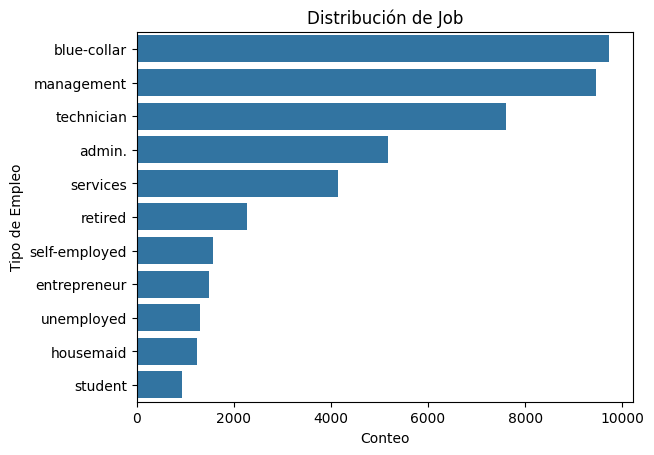

In [ ]:
#categorias variables missings
sns.countplot(data=df, y='job', order=df['job'].value_counts().index)
plt.title('Distribución de Job')
plt.xlabel('Conteo')
plt.ylabel('Tipo de Empleo')
plt.show()

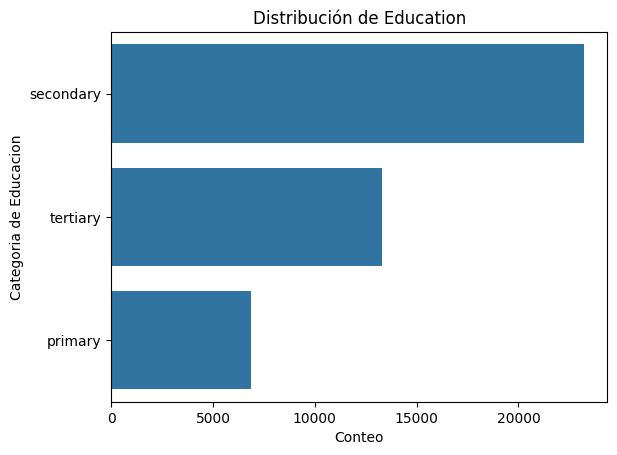

In [ ]:
sns.countplot(data=df, y='education', order=df['education'].value_counts().index)  # noqa: E501
plt.title('Distribución de Education')
plt.xlabel('Conteo')
plt.ylabel('Categoria de Educacion')
plt.show()

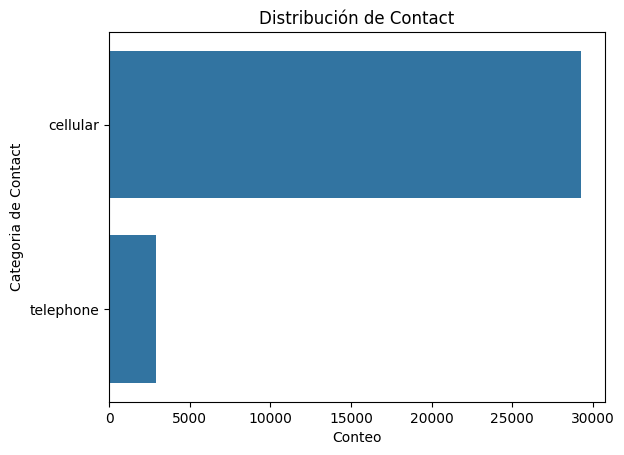

In [ ]:
sns.countplot(data=df, y='contact', order=df['contact'].value_counts().index)
plt.title('Distribución de Contact')
plt.xlabel('Conteo')
plt.ylabel('Categoria de Contact')
plt.show()

#los missings parece ser que no hubo contacto

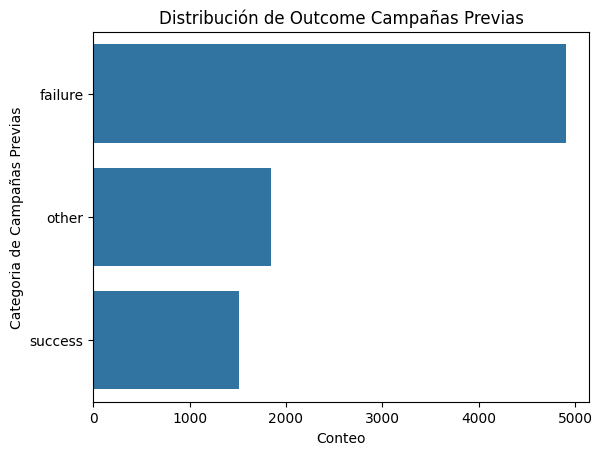

In [ ]:
sns.countplot(data=df, y='poutcome', order=df['poutcome'].value_counts().index)
plt.title('Distribución de Outcome Campañas Previas')
plt.xlabel('Conteo')
plt.ylabel('Categoria de Campañas Previas')
plt.show()

#los missings parece ser que no hay info del contacto

In [ ]:
## job: ver si es aleatorio la asignación de missings o no, para ver si se
# puede reemplazar con la moda

job_missing_df = df[df['job'].isnull()]
job_missing_df.head()

age  job   marital education default  balance housing loan contact  \
4      33  NaN    single       NaN      no        1      no   no     NaN   
216    47  NaN   married       NaN      no       28      no   no     NaN   
354    59  NaN  divorced       NaN      no       27      no   no     NaN   
876    37  NaN    single       NaN      no      414     yes   no     NaN   
1072   29  NaN    single   primary      no       50     yes   no     NaN   

      day_of_week month  duration  campaign  pdays  previous poutcome   y  
4               5   may       198         1     -1         0      NaN  no  
216             5   may       338         2     -1         0      NaN  no  
354             5   may       347         3     -1         0      NaN  no  
876             7   may       131         1     -1         0      NaN  no  
1072            7   may        50         2     -1         0      NaN  no

In [ ]:
job_missing_df.select_dtypes(include=['int64']).describe().T

count         mean          std    min     25%    50%      75%  \
age          288.0    47.593750    10.775095   25.0   41.00   47.0    55.00   
balance      288.0  1772.357639  2970.288559 -295.0  170.75  677.0  2165.50   
day_of_week  288.0    14.642361     8.630261    1.0    6.00   14.0    20.25   
duration     288.0   237.611111   226.115296    8.0   87.75  165.0   311.00   
campaign     288.0     3.309028     3.788621    1.0    1.00    2.0     4.00   
pdays        288.0    20.982639    75.652767   -1.0   -1.00   -1.0    -1.00   
previous     288.0     0.319444     1.089403    0.0    0.00    0.0     0.00   

                 max  
age             82.0  
balance      19706.0  
day_of_week     31.0  
duration      1487.0  
campaign        35.0  
pdays          683.0  
previous         7.0

In [ ]:
job_missing_df.select_dtypes(include=['object']).describe().T


count unique        top freq
job           0      0        NaN  NaN
marital     288      3    married  203
education   161      3  secondary   71
default     288      2         no  286
housing     288      2         no  262
loan        288      2         no  284
contact     177      2   cellular  131
month       288     12        jun   90
poutcome     33      3    failure   20
y           288      2         no  254

pareciera que job no es eteramente random, pues la edad y el balance en euros es mayor en este data set que en la original.

In [ ]:
moda_job = df['job'].mode()[0]
df['job'] = df['job'].fillna(moda_job)

In [ ]:
## education tiene solo 3 categorias y la mayoría es secundary (casi la mitad)
education_missing_df = df[df['education'].isnull()]
education_missing_df.head()

age          job  marital education default  balance housing loan contact  \
3    47  blue-collar  married       NaN      no     1506     yes   no     NaN   
4    33  blue-collar   single       NaN      no        1      no   no     NaN   
13   58   technician  married       NaN      no       71     yes   no     NaN   
16   45       admin.   single       NaN      no       13     yes   no     NaN   
42   60  blue-collar  married       NaN      no      104     yes   no     NaN   

    day_of_week month  duration  campaign  pdays  previous poutcome   y  
3             5   may        92         1     -1         0      NaN  no  
4             5   may       198         1     -1         0      NaN  no  
13            5   may        71         1     -1         0      NaN  no  
16            5   may        98         1     -1         0      NaN  no  
42            5   may        22         1     -1         0      NaN  no

In [ ]:
education_missing_df.select_dtypes(include=['int64']).describe().T

count         mean          std     min    25%    50%     75%  \
age          1857.0    44.510501    12.196400    18.0   36.0   45.0    53.0   
balance      1857.0  1526.754443  3152.228273 -1445.0  106.0  568.0  1699.0   
day_of_week  1857.0    15.810985     8.689590     1.0    8.0   16.0    22.0   
duration     1857.0   257.313947   245.622775     4.0   99.0  180.0   332.0   
campaign     1857.0     2.849219     3.778611     1.0    1.0    2.0     3.0   
pdays        1857.0    36.856220    95.226077    -1.0   -1.0   -1.0    -1.0   
previous     1857.0     0.488422     1.569167     0.0    0.0    0.0     0.0   

                 max  
age             93.0  
balance      64343.0  
day_of_week     31.0  
duration      2429.0  
campaign        63.0  
pdays          687.0  
previous        27.0

In [ ]:
education_missing_df.select_dtypes(include=['object']).describe().T

count unique          top  freq
job        1857     11  blue-collar   581
marital    1857      3      married  1160
education     0      0          NaN   NaN
default    1857      2           no  1825
housing    1857      2           no  1037
loan       1857      2           no  1724
contact    1180      2     cellular   990
month      1857     12          may   556
poutcome    323      3      failure   177
y          1857      2           no  1605

Al igual que job pareciera que no es eteramente random, pues la edad y el balance en euros es mayor en este data set que en la original. Se va a imputar con la moda por mientras

In [ ]:
moda_education = df['education'].mode()[0]
df['education'] = df['education'].fillna(moda_education)

In [ ]:
#contact tiene hartos missings (casi 30% del dataset). En el histograma se
#vio que tal vez es porque no hay info del contacto

contact_missing_df = df[df['contact'].isnull()]
contact_missing_df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married  secondary      no     1506     yes   no   
4   33   blue-collar   single  secondary      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome   y  
0     NaN            5   may       261         1     -1         0      NaN  no  
1     NaN            5   may       151         1     -1         0      NaN  no  
2     NaN            5   may        76         1     -1         0      NaN  no  
3     NaN            5   may        92         1     -1         0      NaN  no  
4     NaN            5   may       198         1     -1         0      NaN  no

In [ ]:
contact_missing_df.select_dtypes(include=['int64']).describe().T

#cambia demasiado pdays, se confirma hipotesis

count         mean          std     min    25%    50%      75%  \
age          13020.0    40.600077     9.439221    20.0   33.0   39.0    48.00   
balance      13020.0  1183.550384  2638.647690 -3372.0   50.0  389.0  1255.25   
day_of_week  13020.0    15.360138     8.454077     1.0    8.0   15.0    21.00   
duration     13020.0   252.340476   258.405545     0.0  101.0  178.0   311.00   
campaign     13020.0     2.787481     3.371954     1.0    1.0    2.0     3.00   
pdays        13020.0     1.299386    36.451647    -1.0   -1.0   -1.0    -1.00   
previous     13020.0     0.021966     0.502526     0.0    0.0    0.0     0.00   

                 max  
age             61.0  
balance      58544.0  
day_of_week     31.0  
duration      3881.0  
campaign        63.0  
pdays          850.0  
previous        41.0

In [ ]:
contact_missing_df.select_dtypes(include=['object']).describe().T

count unique          top   freq
job        13020     11  blue-collar   4076
marital    13020      3      married   8031
education  13020      3    secondary   7826
default    13020      2           no  12731
housing    13020      2          yes   9357
loan       13020      2           no  10988
contact        0      0          NaN    NaN
month      13020     12          may   7975
poutcome      70      3      failure     31
y          13020      2           no  12490

Se mantiene la idea que contact missing es que no se pudo contactar, bastante parecida el dataset en variables de edad y balance pero aparece mucho pdays -1 (no hubo contacto previo). Se va a imputar con "no contact info".

In [ ]:
df['contact'] = df['contact'].fillna('no_contact_info')

In [ ]:
#poutcome tiene hartos missings (casi 80% del dataset). En el histograma se
#vio que tal vez es porque no hubo campaña previa.

poutcome_missing_df = df[df['poutcome'].isnull()]
poutcome_missing_df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married  secondary      no     1506     yes   no   
4   33   blue-collar   single  secondary      no        1      no   no   

           contact  day_of_week month  duration  campaign  pdays  previous  \
0  no_contact_info            5   may       261         1     -1         0   
1  no_contact_info            5   may       151         1     -1         0   
2  no_contact_info            5   may        76         1     -1         0   
3  no_contact_info            5   may        92         1     -1         0   
4  no_contact_info            5   may       198         1     -1         0   

  poutcome   y  
0      NaN  no  
1      NaN  no  
2      NaN  no  
3      NaN  no  
4      NaN  no

In [ ]:
poutcome_missing_df.select_dtypes(include=['int64']).describe().T

#cambia demasiado pdays (cercano a 0)

count         mean          std     min    25%    50%     75%  \
age          36959.0    40.932114    10.430504    18.0   33.0   39.0    49.0   
balance      36959.0  1318.722043  3039.386767 -8019.0   55.0  414.0  1358.0   
day_of_week  36959.0    16.145621     8.372530     1.0    9.0   17.0    22.0   
duration     36959.0   257.738332   262.266179     0.0  101.0  177.0   318.0   
campaign     36959.0     2.921886     3.325601     1.0    1.0    2.0     3.0   
pdays        36959.0    -0.962039     3.778887    -1.0   -1.0   -1.0    -1.0   
previous     36959.0     0.000460     0.047388     0.0    0.0    0.0     0.0   

                  max  
age              95.0  
balance      102127.0  
day_of_week      31.0  
duration       4918.0  
campaign         63.0  
pdays           528.0  
previous          7.0

In [ ]:
poutcome_missing_df.select_dtypes(include=['object']).describe().T

count unique          top   freq
job        36959     11  blue-collar   8370
marital    36959      3      married  22472
education  36959      3    secondary  20485
default    36959      2           no  36201
housing    36959      2          yes  19990
loan       36959      2           no  30836
contact    36959      3     cellular  21734
month      36959     12          may  11252
poutcome       0      0          NaN    NaN
y          36959      2           no  33573

Se mantiene la idea que poutcome missing es que no se hubo campaña previa, bastante parecida el dataset en variables de edad y balance pero aparece mucho pdays -1 (no hubo contacto previo). Se va a imputar con "no previous campaign".

In [ ]:
df['poutcome'] = df['poutcome'].fillna('no_previous_campaign')




---


Se modificaron las variables missings job, education, contact y poutcome pertinentemente. Con job y education se imputó con la moda (ya que eran variables categoricas que aparecián con mucha frecuencia y no distorsionaba mucho el data set). Con contact y poutcome se intuyó que los valores missings significaban que no hay info de contacto (tal vez clientes no contestaron la llamada) y que no hubo campaña previa (no se contactaron con el cliente anteriormente). Eso se refleja porque pdays es en su mayoría -1 en ambas variables (no hubo contacto previo)


---

### Pregunta 1.2


Genere histogramas de las variables categóricas desagregando por la variable objetivo de interés. Interprete las relaciones que observa.

Responda: ¿Cuáles creen que son las variables categóricas más relevantes a la hora de determinar si el individuo hará un depósito?

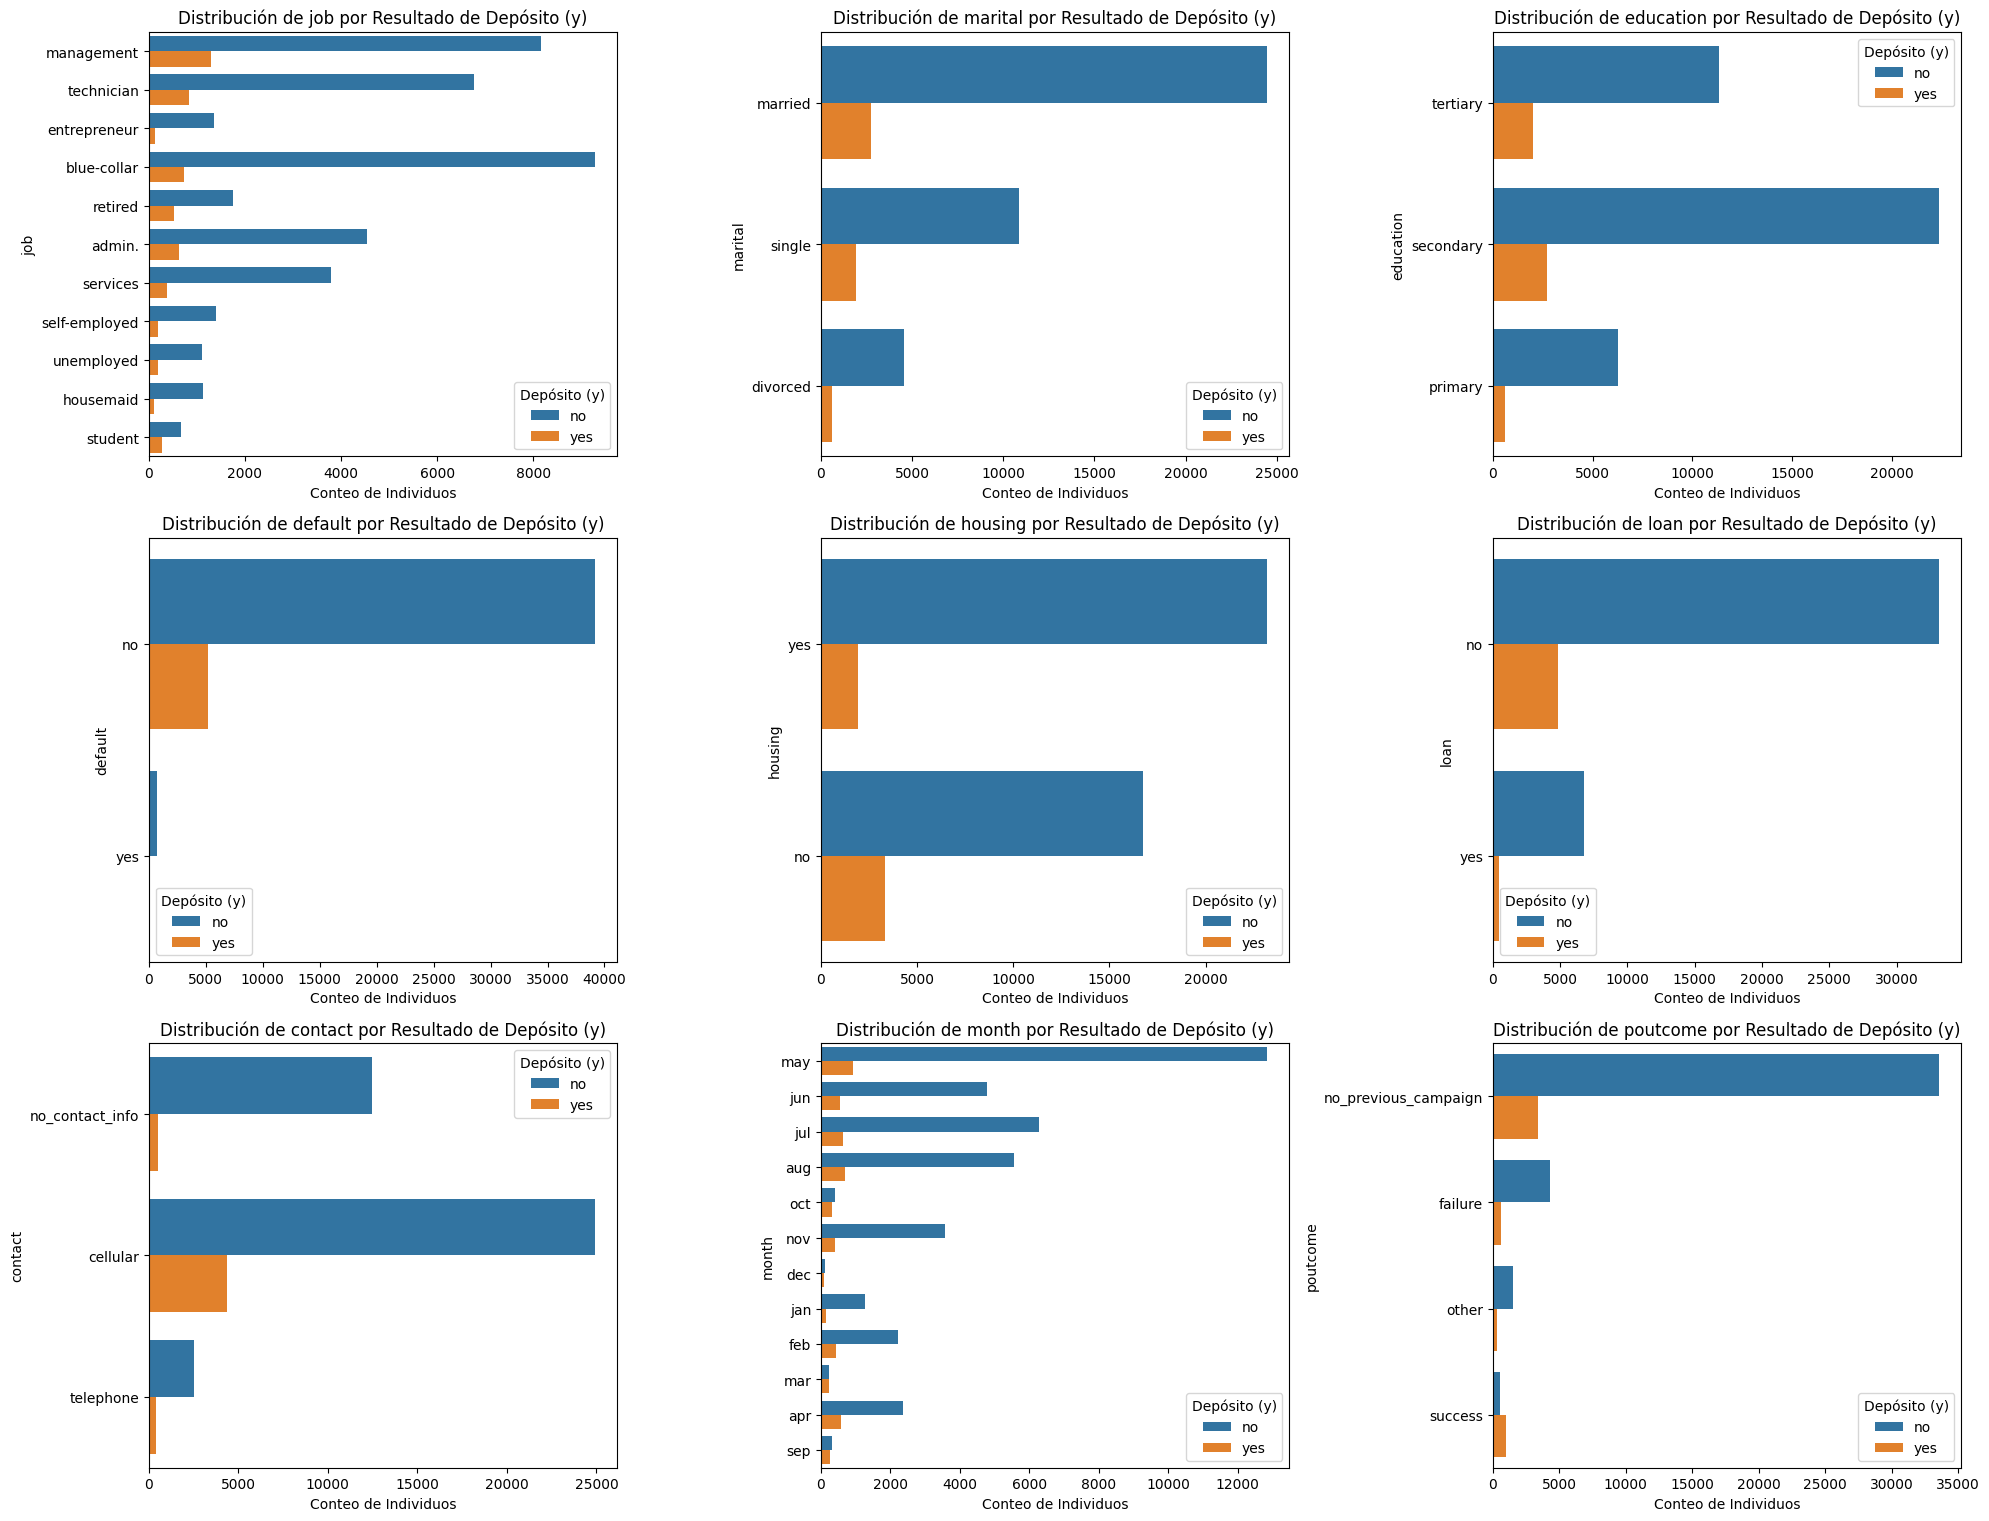

In [ ]:
columnas_categoricas = [
    'job', 'marital', 'education', 'default', 'housing', 'loan',
    'contact', 'month', 'poutcome'
]

plt.figure(figsize=(20, 25)) # Ajusta el tamaño total de la figura

for i, col in enumerate(columnas_categoricas):
    plt.subplot(5, 3, i + 1) # Organiza los subplots
    cross_tab_prop = pd.crosstab(df[col], df['y'], normalize='index')
    sns.countplot(
        data=df,
        y=col,            # Variable categórica en el eje Y
        hue='y',          # Desagregar por la variable objetivo 'y'
    )
    plt.title(f'Distribución de {col} por Resultado de Depósito (y)')
    plt.xlabel('Conteo de Individuos')
    plt.ylabel(col)
    plt.legend(title='Depósito (y)')

plt.tight_layout()
plt.show()



In [ ]:
for col in columnas_categoricas:
    cross_tab_prop_numeric = pd.crosstab(df[col], df['y'], normalize='index')
    print(f"\nProporción para '{col}' (%):")
    print((cross_tab_prop_numeric[['yes', 'no']].apply(lambda x: x * 100).round(2))) # noqa: E501


Proporción para 'job' (%):
y                yes     no
job                        
admin.         12.20  87.80
blue-collar     7.41  92.59
entrepreneur    8.27  91.73
housemaid       8.79  91.21
management     13.76  86.24
retired        22.79  77.21
self-employed  11.84  88.16
services        8.88  91.12
student        28.68  71.32
technician     11.06  88.94
unemployed     15.50  84.50

Proporción para 'marital' (%):
y           yes     no
marital               
divorced  11.95  88.05
married   10.12  89.88
single    14.95  85.05

Proporción para 'education' (%):
y            yes     no
education              
primary     8.63  91.37
secondary  10.78  89.22
tertiary   15.01  84.99

Proporción para 'default' (%):
y          yes     no
default              
no       11.80  88.20
yes       6.38  93.62

Proporción para 'housing' (%):
y         yes    no
housing            
no       16.7  83.3
yes       7.7  92.3

Proporción para 'loan' (%):
y       yes     no
loan              
no    12




---

1. Job: managmenent es el que tiene más individuos que se suscriben en cantidad (casi 2000 personas), pero en porcentaje student es el que más se suscribe (28%)

2. Marital: married es el que tiene más individuos que se suscriben en cantidad (casi 5000 personas), pero en porcentaje single es el que más se suscribe (15%)

3. Education: secondary es el que tiene más individuos que se suscriben en cantidad, seguido por muy cerca con tertiary(casi 5000 personas), y en porcentaje tertiary es el que más se suscribe (15%), de igual manera secondary tiene un porcentaje bien parecido (11%)

4. Default: cuando se experimenta default, casi todos NO se suscriben tanto en porcentaje (93%) como en cantidad de personas.

5. Housing: cuando hay credito hipotecario, casi todos NO se suscriben tanto en porcentaje (92%) como en cantidad de personas

6. Loan: cuando hay creditos personales, casi todos NO se suscriben tanto en porcentaje (93%) como en cantidad de personas

7. Contact: celular es el que tiene más individuos que se suscriben en cantidad (casi 5000 personas y en porcentaje (15%)

8. Month: mayo es el que tiene más individuos que se suscriben en cantidad (casi 2000 personas),  pero representa muy poco en porcentaje (7%) y en cambio marzo es el que más se suscribe (52%)

9. Poutcome: no_preview_campaign es el que tiene más individuos que se suscriben en cantidad (casi 5000 personas). Pero eso representa muy poco en porcentaje (10%) y en general si la campaña anterior fue exitosa, la personas volvera a realizar un deposito (65%)

---

---

Las variables categóricas más relevantes a la hora de determinar si el individuo hará un depósito son que no haya hecho default, que no tenga creditos (hipotecario o personal) y que se contacten via celular

---

### Pregunta 1.3

Identifique _outliers_ entre las variables numéricas del dataset. Además, impute estas observaciones si usted lo considera necesario. Justifique su decisión.

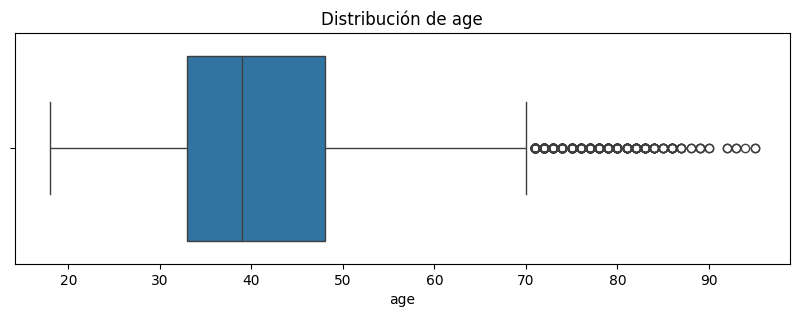

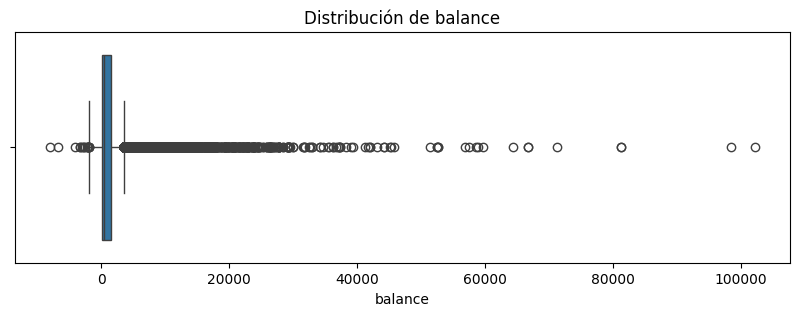

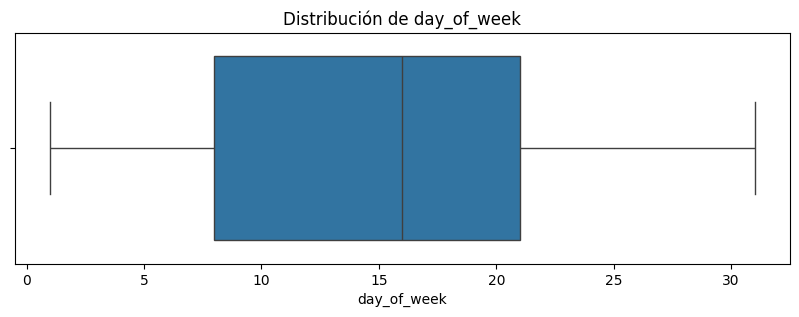

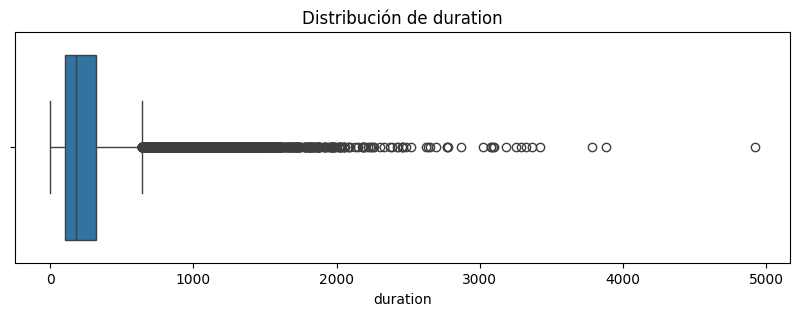

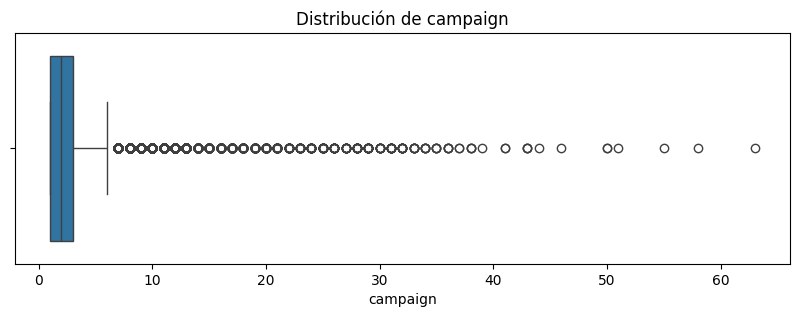

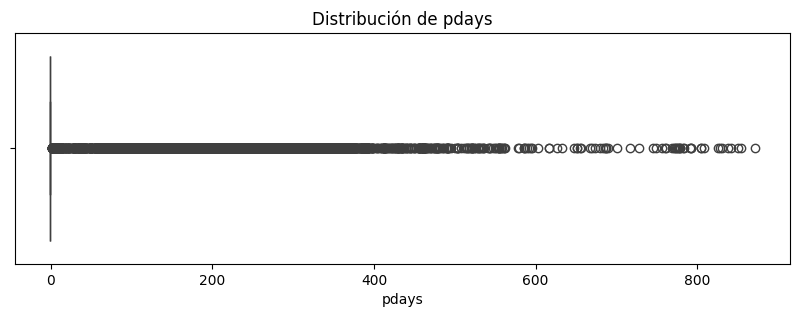

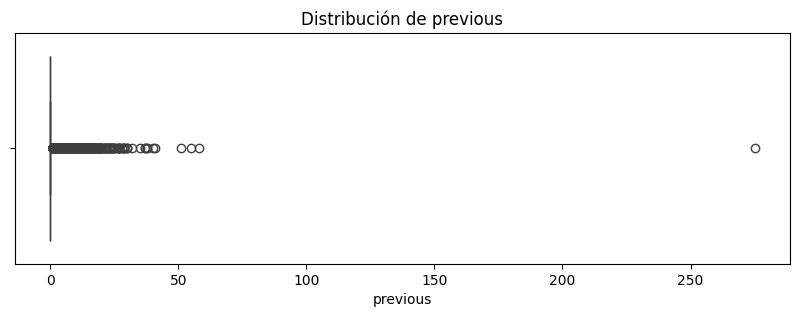

In [ ]:
columnas_numericas = ['age', 'balance', 'day_of_week', 'duration',
                      'campaign', 'pdays', 'previous']

for col in columnas_numericas:
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.show()

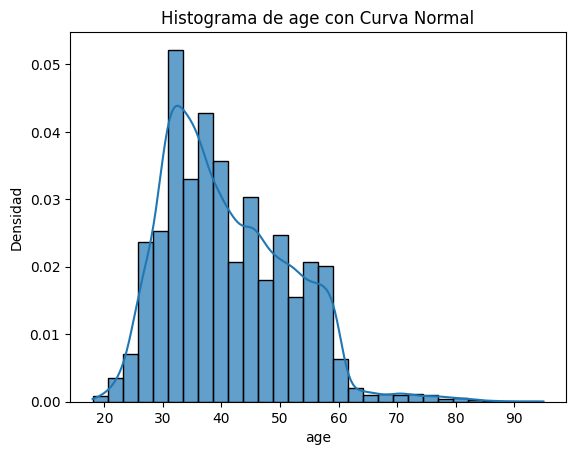

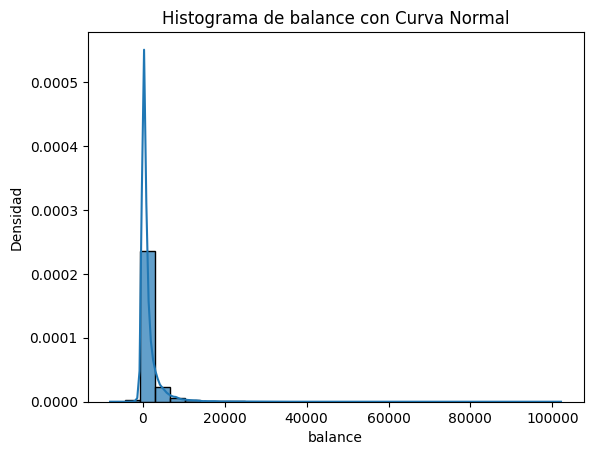

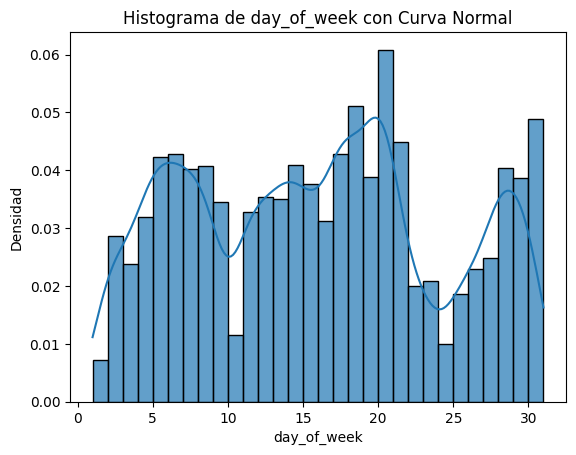

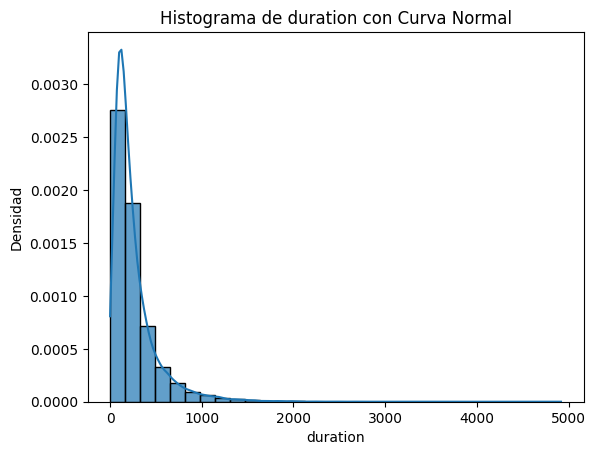

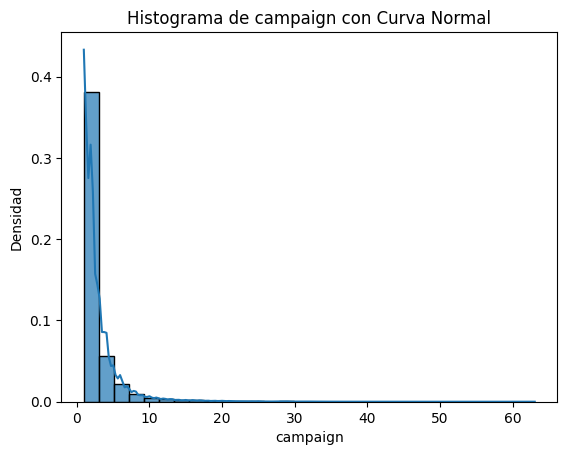

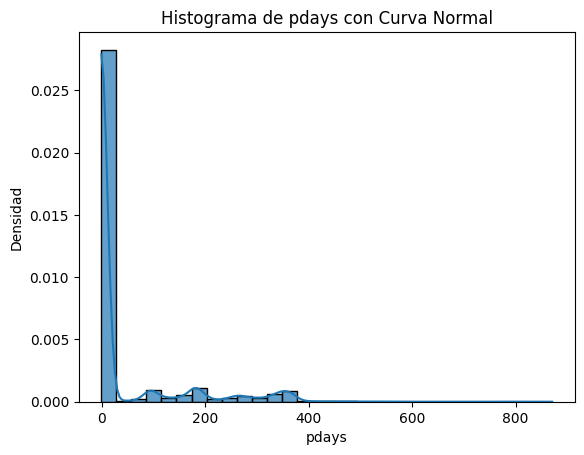

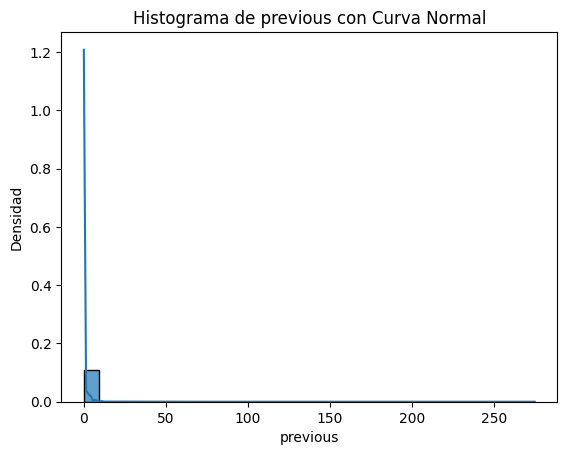

In [ ]:
for col_name in columnas_numericas:
    sns.histplot(df[col_name], bins=30, stat='density', alpha=0.7, kde= 'True')  # type: ignore # noqa: E501

    plt.title(f'Histograma de {col_name} con Curva Normal')
    plt.xlabel(col_name)
    plt.ylabel('Densidad')
    plt.show() # Muestra el gráfico actual

In [ ]:
#age

outlier = 70
mayores_70 = df[df['age'] > outlier]
mayores_70.info()

<class 'pandas.core.frame.DataFrame'>
Index: 487 entries, 29158 to 45208
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          487 non-null    int64 
 1   job          487 non-null    object
 2   marital      487 non-null    object
 3   education    487 non-null    object
 4   default      487 non-null    object
 5   balance      487 non-null    int64 
 6   housing      487 non-null    object
 7   loan         487 non-null    object
 8   contact      487 non-null    object
 9   day_of_week  487 non-null    int64 
 10  month        487 non-null    object
 11  duration     487 non-null    int64 
 12  campaign     487 non-null    int64 
 13  pdays        487 non-null    int64 
 14  previous     487 non-null    int64 
 15  poutcome     487 non-null    object
 16  y            487 non-null    object
dtypes: int64(7), object(10)
memory usage: 68.5+ KB


In [ ]:
proportion = (len(mayores_70) / len(df))*100
print(proportion) #representa 1% de los datos, pero es un segmento "real"
#de personas, se reemplezara con el 1.5IQR

1.0771714848156422


In [ ]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

upper_fence = Q3 + 1.5 * IQR

df['age'] = np.where(df['age'] > upper_fence, upper_fence, df['age'])

In [ ]:
#balance

Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

upper_fence = Q3 + 1.5 * IQR
lower_fence = Q1 - 1.5*IQR

outliers_balance = df[((df['balance'] < lower_fence) |
                       (df['balance'] > upper_fence))]
outliers_balance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4729 entries, 34 to 45208
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          4729 non-null   float64
 1   job          4729 non-null   object 
 2   marital      4729 non-null   object 
 3   education    4729 non-null   object 
 4   default      4729 non-null   object 
 5   balance      4729 non-null   int64  
 6   housing      4729 non-null   object 
 7   loan         4729 non-null   object 
 8   contact      4729 non-null   object 
 9   day_of_week  4729 non-null   int64  
 10  month        4729 non-null   object 
 11  duration     4729 non-null   int64  
 12  campaign     4729 non-null   int64  
 13  pdays        4729 non-null   int64  
 14  previous     4729 non-null   int64  
 15  poutcome     4729 non-null   object 
 16  y            4729 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 665.0+ KB


In [ ]:
proportion = (len(outliers_balance) / len(df))*100
print(proportion) #es un 10% de los datos, los datos outliers
#es que la persona en promedio tiene deuda. Sí importan esos datos, por lo
# que también se reemplazan por el 1.5IQR

10.459843843312468


In [ ]:
df['balance'] = np.where(df['balance'] > upper_fence, upper_fence, df['balance'])  # noqa: E501
df['balance'] = np.where( df['balance'] < lower_fence, lower_fence, df['balance']) # noqa: E501

In [ ]:
#duration

Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

upper_fence = Q3 + 1.5 * IQR

mayor_duration = df[df['duration'] > upper_fence]
mayor_duration.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3235 entries, 37 to 45208
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          3235 non-null   float64
 1   job          3235 non-null   object 
 2   marital      3235 non-null   object 
 3   education    3235 non-null   object 
 4   default      3235 non-null   object 
 5   balance      3235 non-null   float64
 6   housing      3235 non-null   object 
 7   loan         3235 non-null   object 
 8   contact      3235 non-null   object 
 9   day_of_week  3235 non-null   int64  
 10  month        3235 non-null   object 
 11  duration     3235 non-null   int64  
 12  campaign     3235 non-null   int64  
 13  pdays        3235 non-null   int64  
 14  previous     3235 non-null   int64  
 15  poutcome     3235 non-null   object 
 16  y            3235 non-null   object 
dtypes: float64(2), int64(5), object(10)
memory usage: 454.9+ KB


In [ ]:
proportion = (len(mayor_duration) / len(df))*100
print(proportion) #es un 7% de los datos, los datos outliers
#es que dura harto la llamada. Sí importan esos datos, por lo
# que también se reemplazan por el 1.5IQR

7.155338302625467


In [ ]:
df['duration'] = np.where(df['duration'] > upper_fence, upper_fence, df['duration'])  # noqa: E501

In [ ]:
#campaign

outlier = 8
mayor_8 = df[df['campaign'] > outlier]
mayor_8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1789 entries, 1483 to 44886
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1789 non-null   float64
 1   job          1789 non-null   object 
 2   marital      1789 non-null   object 
 3   education    1789 non-null   object 
 4   default      1789 non-null   object 
 5   balance      1789 non-null   float64
 6   housing      1789 non-null   object 
 7   loan         1789 non-null   object 
 8   contact      1789 non-null   object 
 9   day_of_week  1789 non-null   int64  
 10  month        1789 non-null   object 
 11  duration     1789 non-null   float64
 12  campaign     1789 non-null   int64  
 13  pdays        1789 non-null   int64  
 14  previous     1789 non-null   int64  
 15  poutcome     1789 non-null   object 
 16  y            1789 non-null   object 
dtypes: float64(3), int64(4), object(10)
memory usage: 251.6+ KB


In [ ]:
proportion = (len(mayor_8) / len(df))*100
print(proportion) #4% de los datos, los datos outliers
#es que la campaña se hace muchas veces al cliente. Sí importan esos datos,
# por lo que también se reemplazan por el 1.5IQR

3.957001614651302


In [ ]:
Q1 = df['campaign'].quantile(0.25)
Q3 = df['campaign'].quantile(0.75)
IQR = Q3 - Q1

upper_fence = Q3 + 1.5 * IQR
df['campaign'] = (np.where(df['campaign'] > upper_fence,
                           upper_fence, df['campaign']))

In [ ]:
#pdays

outlier = 90
mayor_90 = df[df['pdays'] > outlier]
mayor_90.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7539 entries, 24060 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          7539 non-null   float64
 1   job          7539 non-null   object 
 2   marital      7539 non-null   object 
 3   education    7539 non-null   object 
 4   default      7539 non-null   object 
 5   balance      7539 non-null   float64
 6   housing      7539 non-null   object 
 7   loan         7539 non-null   object 
 8   contact      7539 non-null   object 
 9   day_of_week  7539 non-null   int64  
 10  month        7539 non-null   object 
 11  duration     7539 non-null   float64
 12  campaign     7539 non-null   float64
 13  pdays        7539 non-null   int64  
 14  previous     7539 non-null   int64  
 15  poutcome     7539 non-null   object 
 16  y            7539 non-null   object 
dtypes: float64(4), int64(3), object(10)
memory usage: 1.0+ MB


In [ ]:
proportion = (len(mayor_90) / len(df))*100
print(proportion)

#muchos datos son outliers (mas 15%) y -1 representa que nunca lo
#contactaron antes. Se va a intentar resolver como logaritmo

16.675145429209707


In [ ]:
df['log(pdays)'] = np.where(df['pdays'] == -1, np.log(1), np.log(df['pdays']))

#se transforma a logaritmo y cuando "no lo llamamos" va a salir como 0

/Users/catamege/Desktop/Uni/9vo semestre/Machine learning/Tarea2-Mege-Lantadilla/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


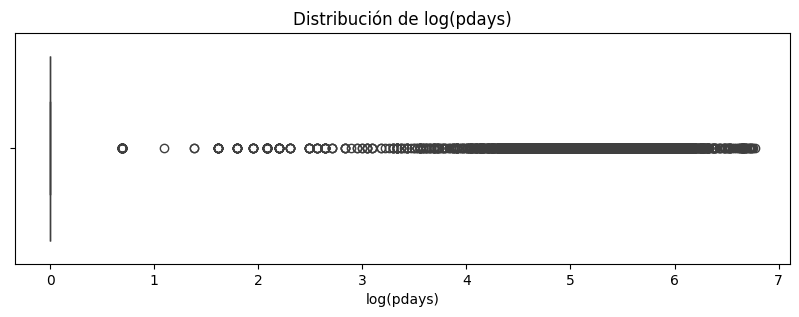

In [ ]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df['log(pdays)'])
plt.title('Distribución de log(pdays)')
plt.xlabel('log(pdays)')
plt.show()

#todo se concentra en un punto, mejor usar categorica

In [ ]:
tramo1=-1
tramo2=0
tramo3=180
tramo4=365
tramos = [
    (df['pdays'] == tramo1),
    (df['pdays'] > tramo2) & (df['pdays'] <= tramo3),
    (df['pdays'] > tramo3) & (df['pdays'] <= tramo4),
    (df['pdays'] > tramo4)
]

# Definir las etiquetas correspondientes a las condiciones
categorias = [
    'no lo llamamos',
    '6 meses',
    '1 año',
    '+1 año',
]


df['pdays_categorias'] = np.select(tramos, categorias, default='False')

In [ ]:
df['pdays_categorias'].value_counts() #la categoria que tiene menos es de 1 año
# y es del 1%

pdays_categorias
no lo llamamos    36954
1 año              4416
6 meses            3198
+1 año              643
Name: count, dtype: int64

In [ ]:
#previous

Q1 = df['previous'].quantile(0.25)
Q3 = df['previous'].quantile(0.75)
IQR = Q3 - Q1

upper_fence = Q3 + 1.5 * IQR

mayor_previous = df[df['previous'] > upper_fence]
mayor_previous.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8257 entries, 24060 to 45210
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8257 non-null   float64
 1   job               8257 non-null   object 
 2   marital           8257 non-null   object 
 3   education         8257 non-null   object 
 4   default           8257 non-null   object 
 5   balance           8257 non-null   float64
 6   housing           8257 non-null   object 
 7   loan              8257 non-null   object 
 8   contact           8257 non-null   object 
 9   day_of_week       8257 non-null   int64  
 10  month             8257 non-null   object 
 11  duration          8257 non-null   float64
 12  campaign          8257 non-null   float64
 13  pdays             8257 non-null   int64  
 14  previous          8257 non-null   int64  
 15  poutcome          8257 non-null   object 
 16  y                 8257 non-null   object 


In [ ]:
proportion = (len(mayor_previous) / len(df))*100
print(proportion) #misma idea, se intentará arreglarlo con log y
# sino con categorica

18.263254517705867


In [ ]:
df['log(previous)'] = np.where(df['previous'] == 0, 0, np.log(df['previous']))

/Users/catamege/Desktop/Uni/9vo semestre/Machine learning/Tarea2-Mege-Lantadilla/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


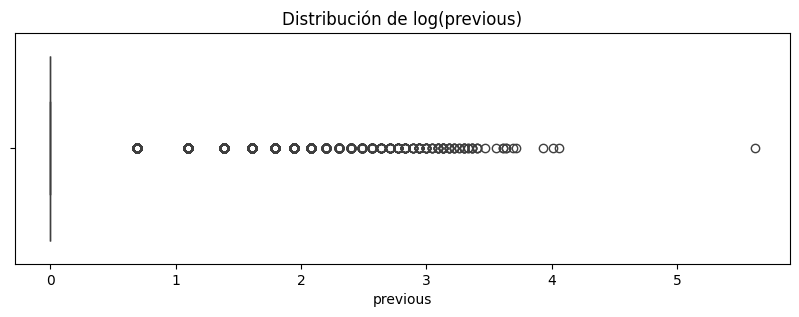

In [ ]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df['log(previous)'])
plt.title('Distribución de log(previous)')
plt.xlabel(col)
plt.show()

#todo se concentra en un punto, mejor usar categorica

In [ ]:
tramo1=0
tramo2=5
tramo3=10
tramo4=50

tramos = [
    (df['previous'] == tramo1),
    (df['previous'] > tramo1) & (df['previous'] <= tramo2),
    (df['previous'] > tramo2) & (df['previous'] <= tramo3),
    (df['previous'] > tramo3) & (df['previous'] <= tramo4),
    (df['previous'] > tramo4)
]

# Definir las etiquetas correspondientes a las condiciones
categorias = [
    'no han llamado antes',
    '5 veces',
    '10 veces',
    '50 veces',
    '+50 veces'
]

df['previous_categorias'] = np.select(tramos, categorias, default='False')

In [ ]:
df['previous_categorias'].value_counts()

previous_categorias
no han llamado antes    36954
5 veces                  7193
10 veces                  770
50 veces                  290
+50 veces                   4
Name: count, dtype: int64

In [ ]:
df = df[df['previous_categorias'] != '+50 veces']

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45207 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45207 non-null  float64
 1   job                  45207 non-null  object 
 2   marital              45207 non-null  object 
 3   education            45207 non-null  object 
 4   default              45207 non-null  object 
 5   balance              45207 non-null  float64
 6   housing              45207 non-null  object 
 7   loan                 45207 non-null  object 
 8   contact              45207 non-null  object 
 9   day_of_week          45207 non-null  int64  
 10  month                45207 non-null  object 
 11  duration             45207 non-null  float64
 12  campaign             45207 non-null  float64
 13  pdays                45207 non-null  int64  
 14  previous             45207 non-null  int64  
 15  poutcome             45207 non-null  obje




---

Se hicieron distintas maneras de tratar los valores outliers, para age, balance, duration, campaign se cambiaron los valores por un upper/lower fence para mantener la estructura de la data y no alterar a las caracteristicas de los individuos. Para pdays y previous se volvieron variables categoricas pues muchos valores se concentraban en un solo número y unos pocos estaban muy dispersos, por lo que al intentar arreglarlo todo se iba a un solo valor. Además, intuitivamente tenia mas sentido (si me llaman 1 vez o 2 veces no cambia mi preferencia de elegir o no el depósito). Notar que se borro los casos donde se han contactado más de 50 veces a la persona en campañas anteriores pues eran casos muy inusuales (4 en 45000+ individuos). Finalmente day of week no se tenía outliers asi que no se arregló


---

## Feature Engineering

### Pregunta 1.4

 Cree un _pipeline_ de preprocesamiento con las siguientes transformaciones a las columnas correspondientes:

*   **Columnas Numéricas** : Aplique un `StandardScaler` para estandarizar estas variables.
*   **Columnas Categóricas Binarias** : Aplique `OneHotEncoder` para crear variables dummy. Asegúrese de manejar posibles categorías desconocidas durante la transformación.
*   **Columnas a Eliminar** : Elimine columnas que dejan de ser relavantes luego de las trasformaciones.
*  **Columnas Dummies MultiNivel** : cree columnas dummies para las variables multi categoricas (tomando codificadas a 0s y 1s =, para su respctiva categoria)
*  **Columnas Label Encoding MultiNivel** : Dentro de las columnas multinivel hay 2 columnas que presentan un orden natural. e.g. en la columna 'month' tenemos que 'jan' < 'feb' < 'dec'. Aplique en la columna 'month' y otra columna que deberá determinar usted un label encoder que capture ese ordenamiento natural, luego normalice con un minmax scaler para que las columnas varien entre 0 y 1.


Una vez creado el pipeline, aplíquelo a su conjunto de features (`X`). Muestre la forma (_shape_) del dataset original y del dataset procesado para verificar los cambios. ¿Cuántas nuevas columnas hay?

Adicionalmente, elimine del análisis la variable `day_of_week`. Si considera necesario realizar transformaciones adicionales a las variables, realicelas en este punto.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45207 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45207 non-null  float64
 1   job                  45207 non-null  object 
 2   marital              45207 non-null  object 
 3   education            45207 non-null  object 
 4   default              45207 non-null  object 
 5   balance              45207 non-null  float64
 6   housing              45207 non-null  object 
 7   loan                 45207 non-null  object 
 8   contact              45207 non-null  object 
 9   day_of_week          45207 non-null  int64  
 10  month                45207 non-null  object 
 11  duration             45207 non-null  float64
 12  campaign             45207 non-null  float64
 13  pdays                45207 non-null  int64  
 14  previous             45207 non-null  int64  
 15  poutcome             45207 non-null  obje

In [ ]:
columnas_numericas = ['age', 'balance', 'campaign']
#se eliminó pdays y previous (ahora se tratan como categoricas)
# y day of week (enunciado) y duration (enunciado)
columnas_categoricas = ['job', 'marital', 'education', 'contact', 'month',
                    'poutcome', 'pdays_categorias', 'previous_categorias']
columnas_dummies = ['default', 'housing', 'loan']

In [ ]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
               'oct', 'nov', 'dec']
education_order = ['primary', 'secondary', 'tertiary']
pdays_order = ['no lo llamamos', '1 semana', '1 mes', '6 meses',
               '1 año', '+1 año']
previous_order = ['no han llamado antes', '5 veces', '10 veces', '50 veces',
                   '+50 veces']

In [ ]:
processor = ColumnTransformer(
    transformers=[
        ('standard_scaler', StandardScaler(), columnas_numericas),
        ('bin_encoder', OneHotEncoder(), columnas_dummies),
        ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), columnas_categoricas), # type: ignore  # noqa: E501

        ('ord_education', Pipeline([
            ('encoder', OrdinalEncoder(categories=[education_order])),
            ('scaler', MinMaxScaler())
        ]), ['education']),

        ('ord_month', Pipeline([
            ('encoder', OrdinalEncoder(categories=[month_order])),
            ('scaler', MinMaxScaler())
        ]), ['month']),

        ('ord_pdays_cat', Pipeline([
            ('encoder', OrdinalEncoder(categories=[pdays_order])),
            ('scaler', MinMaxScaler())
        ]), ['pdays_categorias']),

        ('ord_previous_cat', Pipeline([
            ('encoder', OrdinalEncoder(categories=[previous_order])),
            ('scaler', MinMaxScaler())
        ]), ['previous_categorias'])
    ],
    remainder='drop'
)

In [ ]:
X_pipeline = df.drop(columns=['y', 'pdays', 'log(pdays)', 'previous',
                              'log(previous)','day_of_week', 'duration'])

X_processed = processor.fit_transform(X_pipeline)

***SE BORRO DURATION, VER SI ES NECESARIO O NO***

In [ ]:
print(f"Forma del dataset de features ANTES del procesador: {X_pipeline.shape}")
print(f"Forma del dataset procesado: {X_processed.shape}")

#57 columnas

Forma del dataset de features ANTES del procesador: (45207, 14)
Forma del dataset procesado: (45207, 57)


In [ ]:
nombre_columnas = processor.get_feature_names_out()
print(f"Nombres de las columnas procesadas (ColumnTransformer): {nombre_columnas}")  # noqa: E501

Nombres de las columnas procesadas (ColumnTransformer): ['standard_scaler__age' 'standard_scaler__balance'
 'standard_scaler__campaign' 'bin_encoder__default_no'
 'bin_encoder__default_yes' 'bin_encoder__housing_no'
 'bin_encoder__housing_yes' 'bin_encoder__loan_no' 'bin_encoder__loan_yes'
 'one_hot_encoder__job_admin.' 'one_hot_encoder__job_blue-collar'
 'one_hot_encoder__job_entrepreneur' 'one_hot_encoder__job_housemaid'
 'one_hot_encoder__job_management' 'one_hot_encoder__job_retired'
 'one_hot_encoder__job_self-employed' 'one_hot_encoder__job_services'
 'one_hot_encoder__job_student' 'one_hot_encoder__job_technician'
 'one_hot_encoder__job_unemployed' 'one_hot_encoder__marital_divorced'
 'one_hot_encoder__marital_married' 'one_hot_encoder__marital_single'
 'one_hot_encoder__education_primary'
 'one_hot_encoder__education_secondary'
 'one_hot_encoder__education_tertiary' 'one_hot_encoder__contact_cellular'
 'one_hot_encoder__contact_no_contact_info'
 'one_hot_encoder__contact_teleph

In [ ]:
y_target = df['y']

## Modelos

En esta sección aplicaremos los algoritmos de clasificación vistos en el curso. Específicamente, compararemos el rendimiento de los siguientes modelos:

*   _Decision Tree Classifier_
*   _Random Forest Classifier_
*   _XGBoost Classifier_
*   _Naïve Bayes_



### Pregunta 1.5

Divida el conjunto de datos en conjuntos de entrenamiento y de prueba. Analice la distribución de la variable objetivo en ambos conjuntos para determinar si el conjunto de datos está balanceado o no.

En caso de que el conjunto de datos no esté balanceado, asegúrese de que la división de _train_-_test_ respete el balance de las clases target para evitar que se genere un sesgo. Para esto, se recomienda leer la documentación oficial de la función `train_test_split()`: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.

Use la semilla `random_state` = 123.


In [ ]:
balance = 0.5
is_balanced = y_target.value_counts(normalize=True).min() > balance
print(is_balanced)

False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_processed,
    y_target,
    test_size=0.25,
    random_state=123,
    stratify= y_target
)

print(f"Forma del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Forma del conjunto de prueba (X_test): {X_test.shape}")
print(f"Forma del objetivo de entrenamiento (y_train): {y_train.shape}")
print(f"Forma del objetivo de prueba (y_test): {y_test.shape}")


print(f"Proporción de clases en y_train: {y_train.value_counts(normalize=True)}")  # noqa: E501
print(f"Proporción de clases en y_test: {y_test.value_counts(normalize=True)}")

Forma del conjunto de entrenamiento (X_train): (33905, 57)
Forma del conjunto de prueba (X_test): (11302, 57)
Forma del objetivo de entrenamiento (y_train): (33905,)
Forma del objetivo de prueba (y_test): (11302,)
Proporción de clases en y_train: y
no     0.883056
yes    0.116944
Name: proportion, dtype: float64
Proporción de clases en y_test: y
no     0.88303
yes    0.11697
Name: proportion, dtype: float64


### Pregunta 1.6

Entrene un árbol clasificador sin definir profundad máxima del árbol. Llamaremos a este, "modelo no regularizado".

Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `DecisionTreeClassifier()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html.


Despliege el $F_1\ Score$ del modelo sobre la base de prueba. Luego, grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?

In [ ]:
modelo_no_regularizado = DecisionTreeClassifier(
    max_depth=None,
    class_weight='balanced',
    random_state=123
)

modelo_no_regularizado.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=123)

In [ ]:
y_test_pred = modelo_no_regularizado.predict(X_test) #predigo con test
f1_test_no_regularizado = f1_score(y_test, y_test_pred, pos_label='yes')

print(f1_test_no_regularizado) #28%

0.28267254038179146


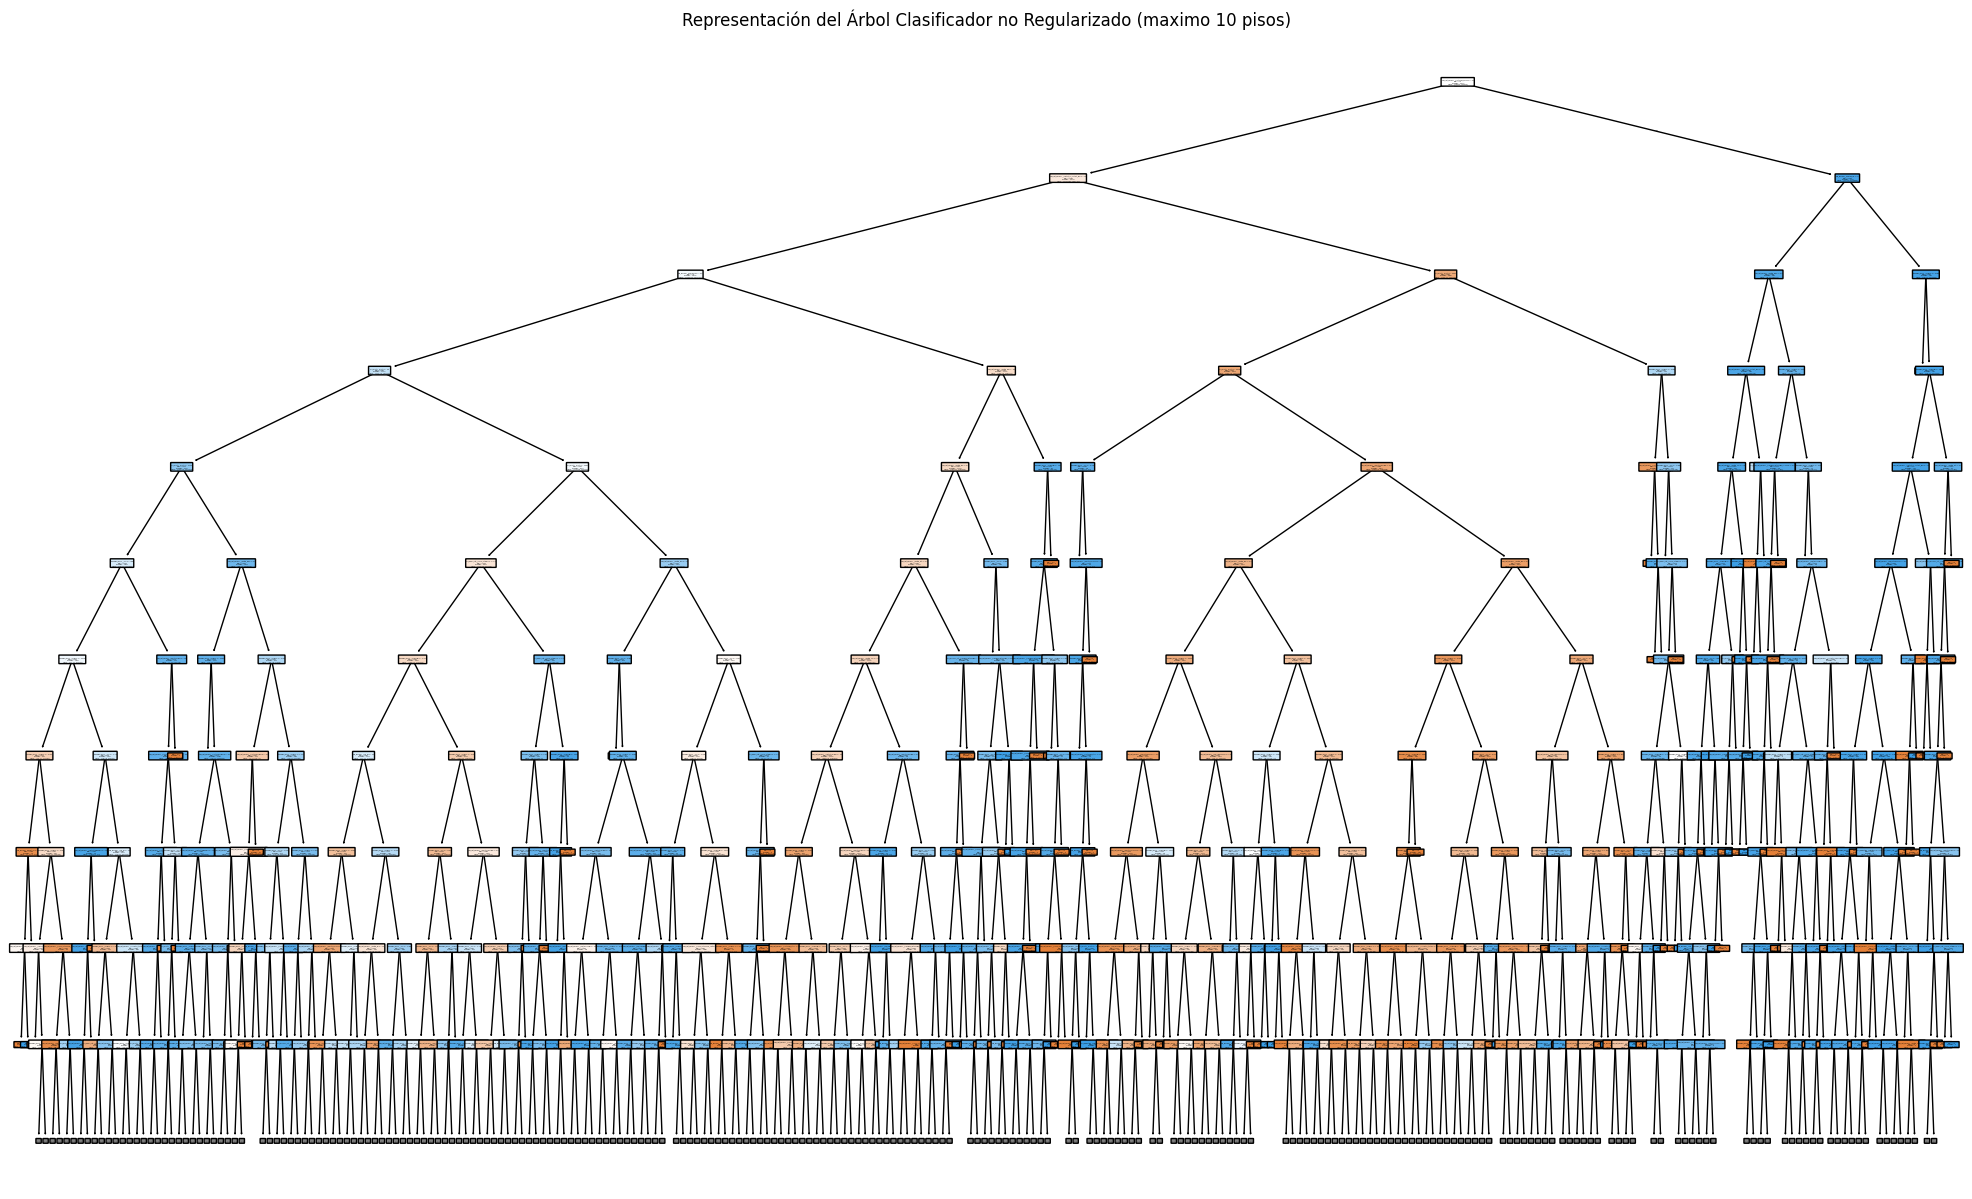

In [ ]:
feature_names_out = processor.get_feature_names_out()
nombres = modelo_no_regularizado.classes_.astype(str) # type: ignore

plt.figure(figsize=(25, 15))
plot_tree(
    modelo_no_regularizado,
    filled=True,
    rounded=True,
    feature_names=feature_names_out, # type: ignore
    class_names=nombres, # type: ignore
    max_depth= 10
)
plt.title('Representación del Árbol Clasificador no Regularizado (maximo 10 pisos)')  # noqa: E501
plt.show()

#demasiado extenso el arbol por eso F1 es grande




---


El modelo problamente este con overfitting, es decir no generaliza los datos y "se aprendió de memoria" la clasificación


---


### Pegunta 1.7

En el contexto particular de una campaña de marketing, donde probablemente la mayoría de clientes no harán depósitos, es importante identificar correctamente tanto los clientes que harán depósitos (clase minoritaria), como los clientes que no harán depósitos.

En el primer caso, falsos negativos implican un cliente peridido. En el segundo caso, falsos positivos implicarían un gasto de marketing innecesario en clientes que no son de interés. En este sentido, si clasificamos a todos los clientes como individuos que no harán depósitos, el _accuracy_ será muy alto, pero el costo económico será muy grande.

Para penalizar tanto falsos positivos, como falsos negativos, a la vez que se busca maximizar los verdaderos positivos, nos enfocaremos en la métrica de _performance_ $F_1\ Score$.

Calcule el $F_1\ Score$ de su árbol no regularizado con la muestra correcta. ¿Considera que es un buen valor? Comente.

In [ ]:
y_test_pred = modelo_no_regularizado.predict(X_test)
f1_test_no_regularizado = f1_score(y_test, y_test_pred, pos_label='yes')
print(f1_test_no_regularizado)

0.28267254038179146





---


El modelo tiene un F1 sobre el test de 0.44, es decir efectivamente hubo un overfitting. Si los falsos negativos y los falsos positivos son importantes entonces el modelo no es el correcto


---


### Pregunta 1.8

Entrene un árbol clasificador con profundad máxima del árbol igual a 16. Llamaremos a este, "modelo levemente regularizado". Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Luego, despliege el $F_1\ Score$ del modelo sobre la base de prueba.

Grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?

In [ ]:
modelo_poco_regularizado = DecisionTreeClassifier(
    max_depth=16,
    class_weight='balanced',
    random_state=123
)

modelo_poco_regularizado.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=16, random_state=123)

In [ ]:
y_test_pred = modelo_poco_regularizado.predict(X_test) #predigo con test
f1_test_poco_regularizado= f1_score(y_test, y_test_pred, pos_label='yes')

print(f1_test_poco_regularizado) #34%

0.3408408408408408


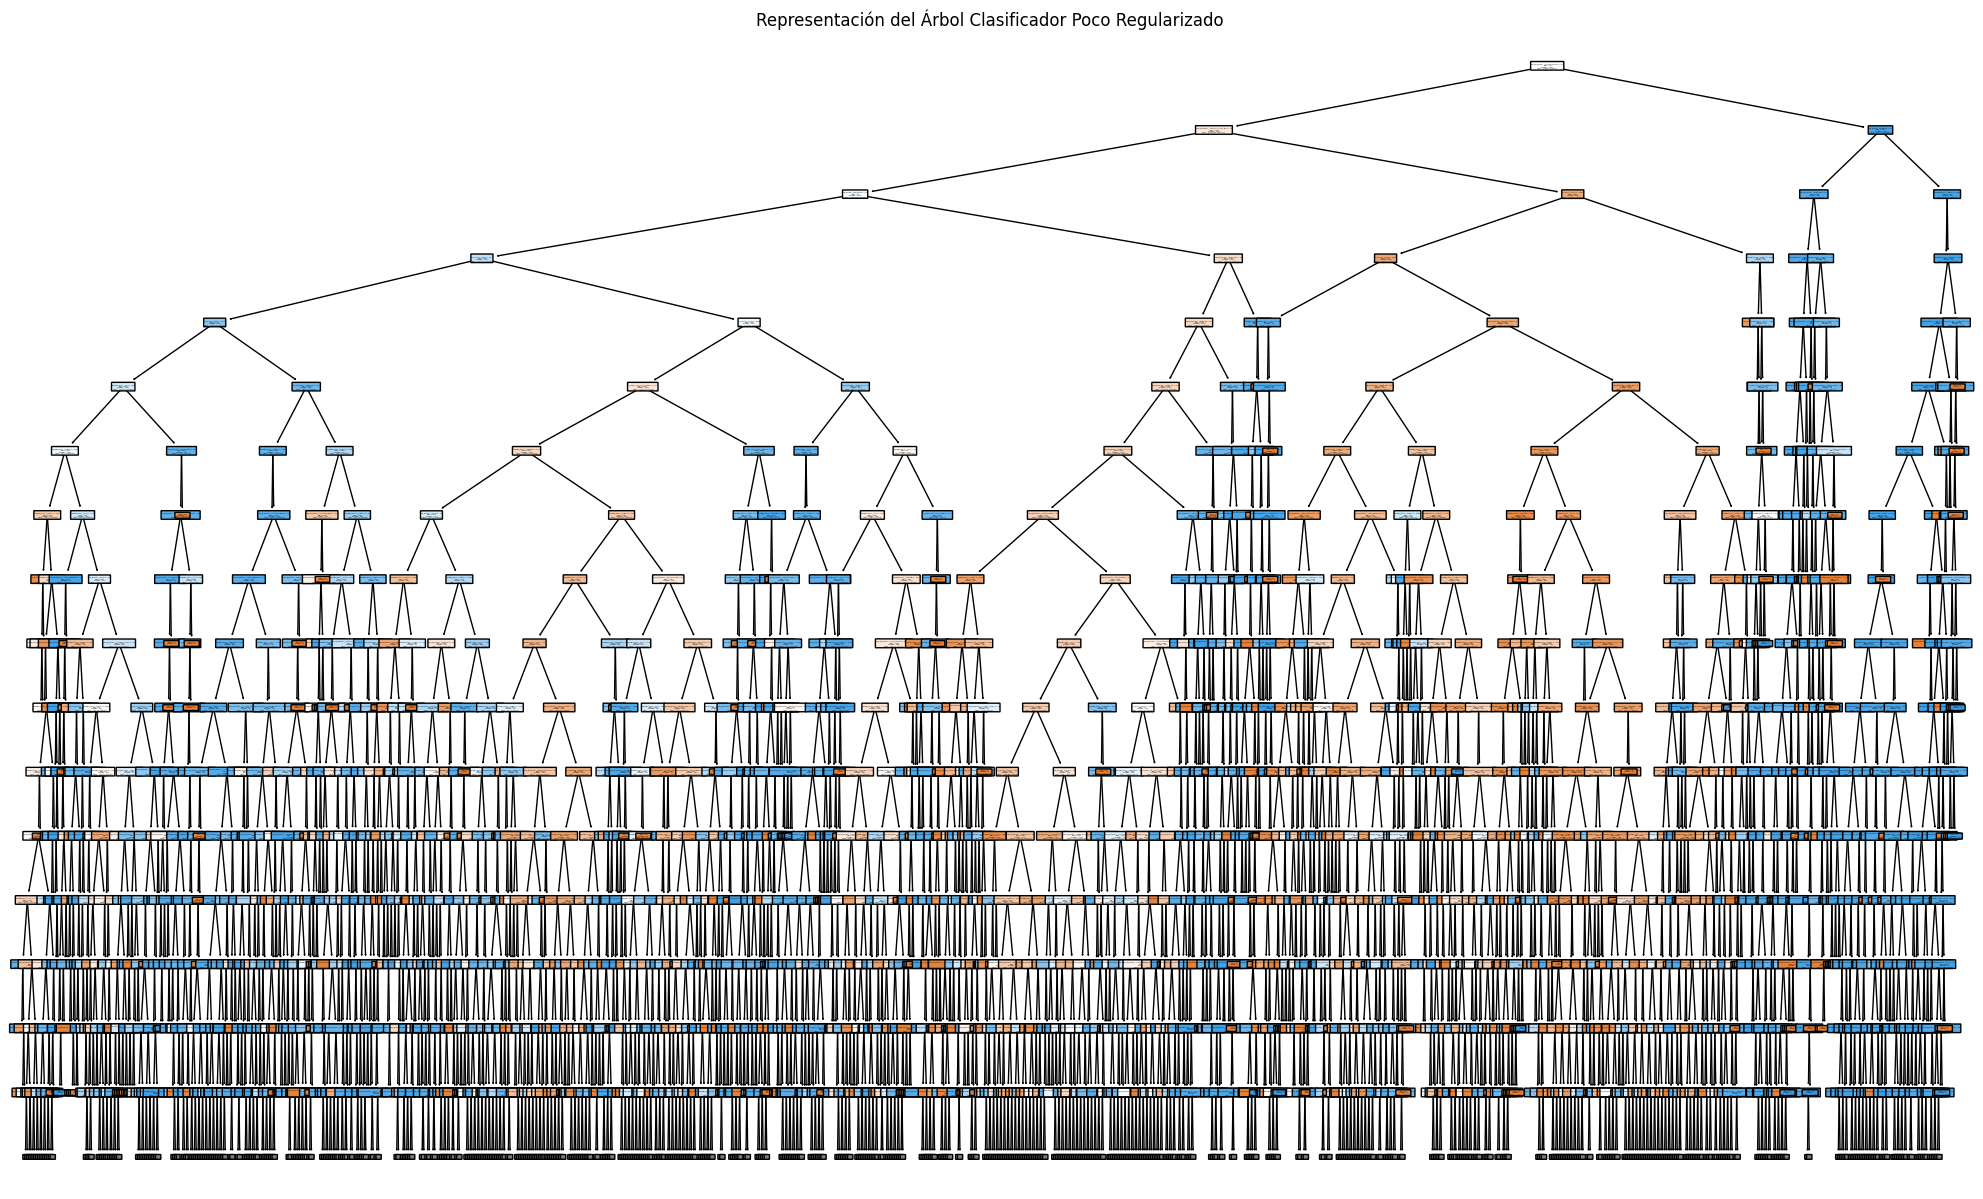

In [ ]:
feature_names_out = processor.get_feature_names_out()
nombres = modelo_poco_regularizado.classes_.astype(str) # type: ignore

plt.figure(figsize=(25, 15))
plot_tree(
    modelo_no_regularizado,
    filled=True,
    rounded=True,
    feature_names=feature_names_out, # type: ignore
    class_names=nombres, # type: ignore
    max_depth= 16
)
plt.title('Representación del Árbol Clasificador Poco Regularizado')
plt.show()




---


Todavia sigue siendo extenso el arbol de decisión (por eso es enredado el grafico) asi que peude haber presencia de sobreajuste pero de menor manera (F1 score en base prueba mejoró)


---


### Pregunta 1.9

Entrene un árbol clasificador con profundad máxima del árbol igual a 8. Llamaremos a este, "modelo regularizado". Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Luego, despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento.

Grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?


In [ ]:
modelo_regularizado = DecisionTreeClassifier(
    max_depth=8,
    class_weight='balanced',
    random_state=123
)

modelo_regularizado.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8, random_state=123)

In [ ]:
y_test_pred = modelo_regularizado.predict(X_test) #predigo con train
f1_test_regularizado = f1_score(y_test, y_test_pred, pos_label='yes')

print(f1_test_regularizado) #43%

0.4355317884729649


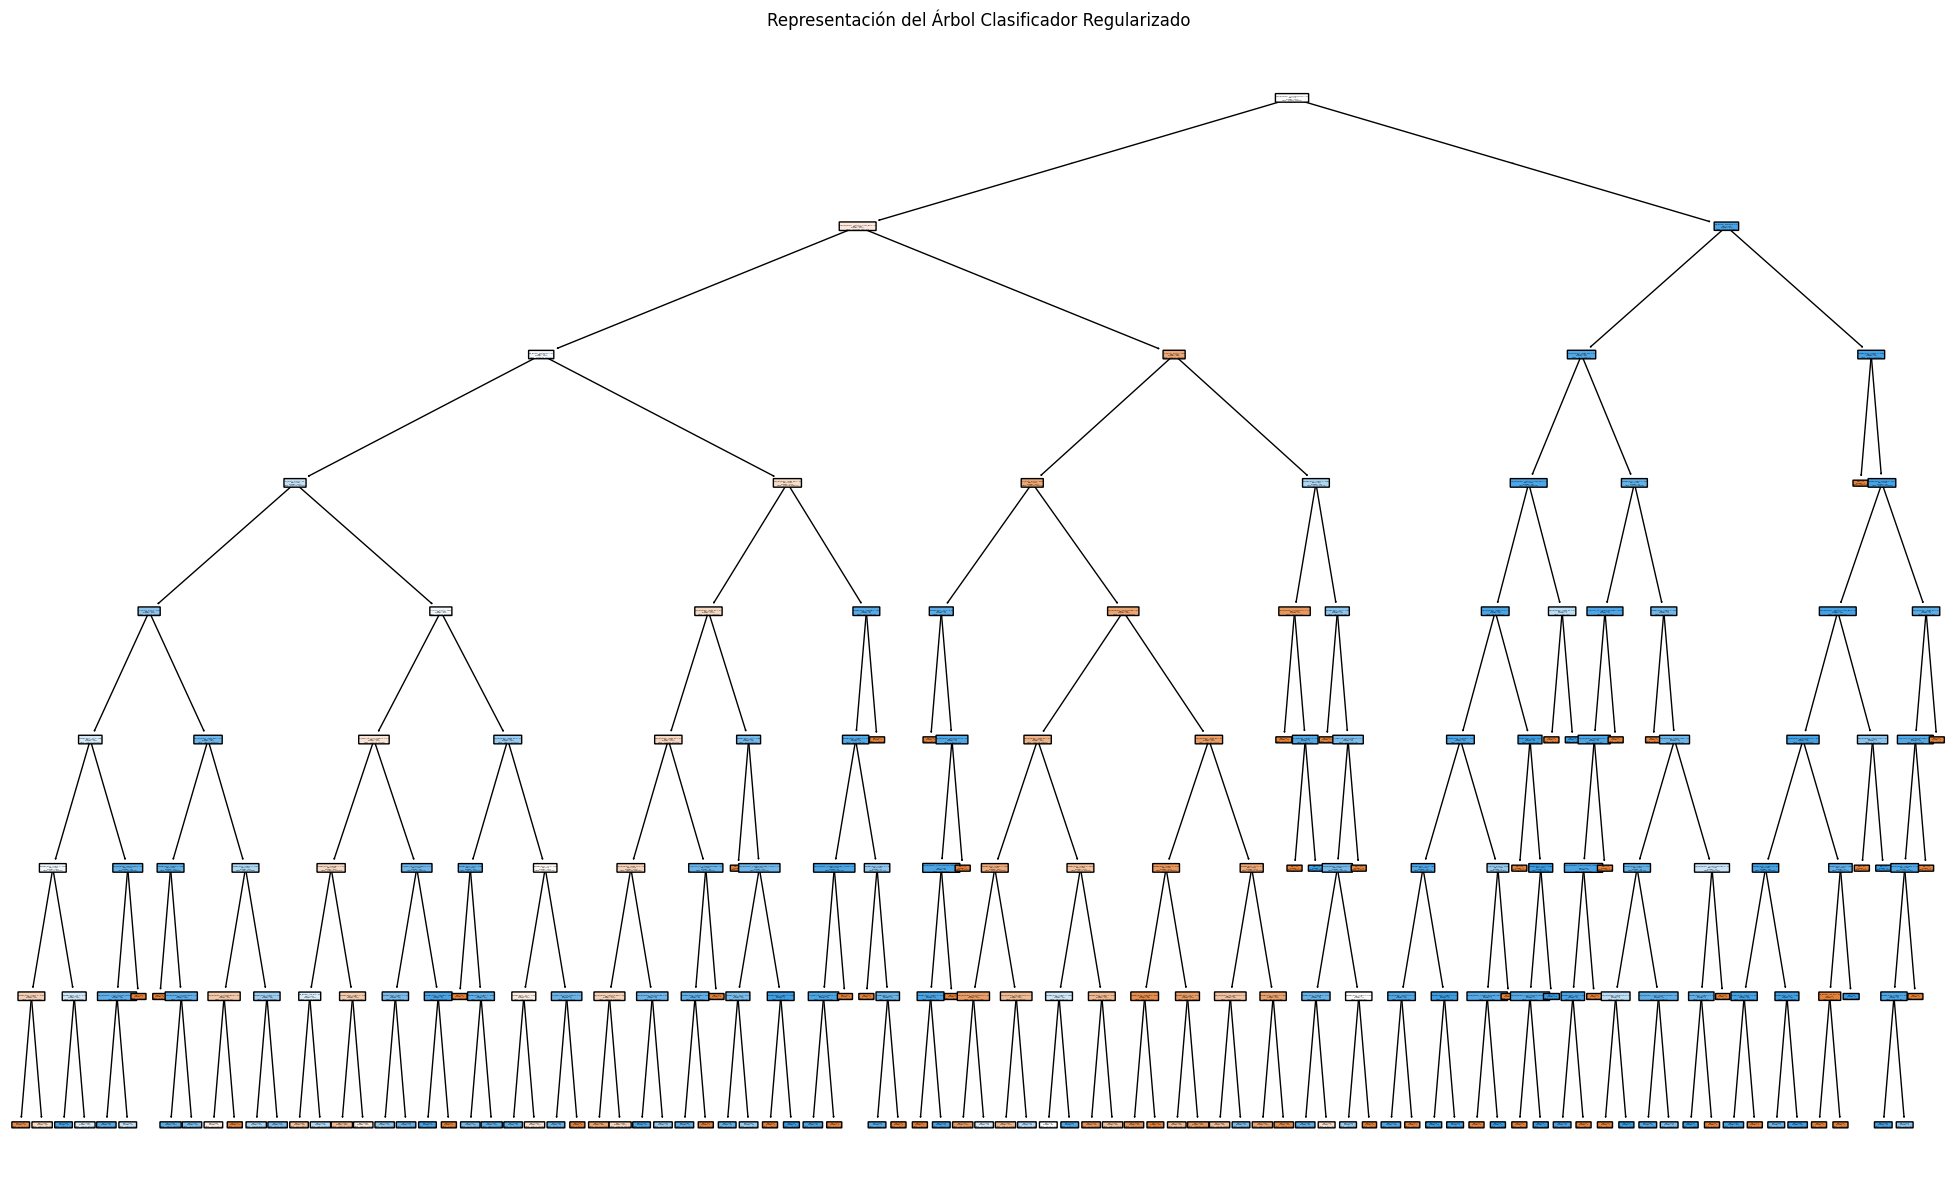

In [ ]:
feature_names_out = processor.get_feature_names_out()
nombres = modelo_regularizado.classes_.astype(str) # type: ignore

plt.figure(figsize=(25, 15))
plot_tree(
    modelo_regularizado,
    filled=True,
    rounded=True,
    feature_names=feature_names_out, # type: ignore
    class_names= nombres, # type: ignore
    max_depth= 8
)
plt.title('Representación del Árbol Clasificador Regularizado')
plt.show()




---


Tiene menor overfitting, y el F1 Score es más alto. Tradeoff entre capacidad de predicción y rendimiento.


---


### Pregunta 1.10

Entrene 20 árboles de clasificación. Cada uno de ellos debe estar entrenado fijando la profundidad máxima del árbol `max_depth` igual a $n \in [1,20]$. Obtenga el $F_1\ Score$ de cada árbol con la base de entrenamiento y la base de prueba.

Grafique en una misma figura $F_1\ Score$ de entrenamiento contra $n$ y $F_1\ Score$ de prueba contra $n$ (Eje X = $n$). ¿Cuál parece ser el parámetro óptimo $n^*$ para el árbol? ¿Qué puede decir sobre el parámetro sobre _overfitting_ y generalización?

In [ ]:
f1_scores_train = []
f1_scores_test = []
depths = range(1, 21)

for n in depths:
    model_n = DecisionTreeClassifier(
        max_depth=n,
        class_weight='balanced',
        random_state=123
    )

    model_n.fit(X_train, y_train)
    y_train_pred_n = model_n.predict(X_train)
    f1_train_n = f1_score(y_train, y_train_pred_n, pos_label='yes')

    y_test_pred_n = model_n.predict(X_test)
    f1_test_n = f1_score(y_test, y_test_pred_n, pos_label='yes')

    f1_scores_train.append(f1_train_n)
    f1_scores_test.append(f1_test_n)


print(f1_scores_train)
print(f1_scores_test)

[0.2857702861622893, 0.2536450388449395, 0.3086110115848561, 0.3133103366242417, 0.38786645704244893, 0.4191422488086789, 0.4256982175197789, 0.4379219254476079, 0.4490194165284418, 0.45035198221563544, 0.4456577375874424, 0.46380070928120404, 0.47657387580299787, 0.49231291939182875, 0.5150992234685073, 0.5242799037104673, 0.5447302904564315, 0.5764695756949824, 0.6075302001587162, 0.6429414434861552]
[0.2936320754716981, 0.25492094223943207, 0.3191754043006931, 0.32104890148830617, 0.4051992088160497, 0.4438322620140802, 0.42807625649913345, 0.4355317884729649, 0.42629716981132076, 0.4139275766016713, 0.39359504132231404, 0.3862571577303488, 0.3724633958386848, 0.36565239814337286, 0.35697583787996884, 0.3408408408408408, 0.33124843632724543, 0.3227979274611399, 0.314785373608903, 0.30268199233716475]


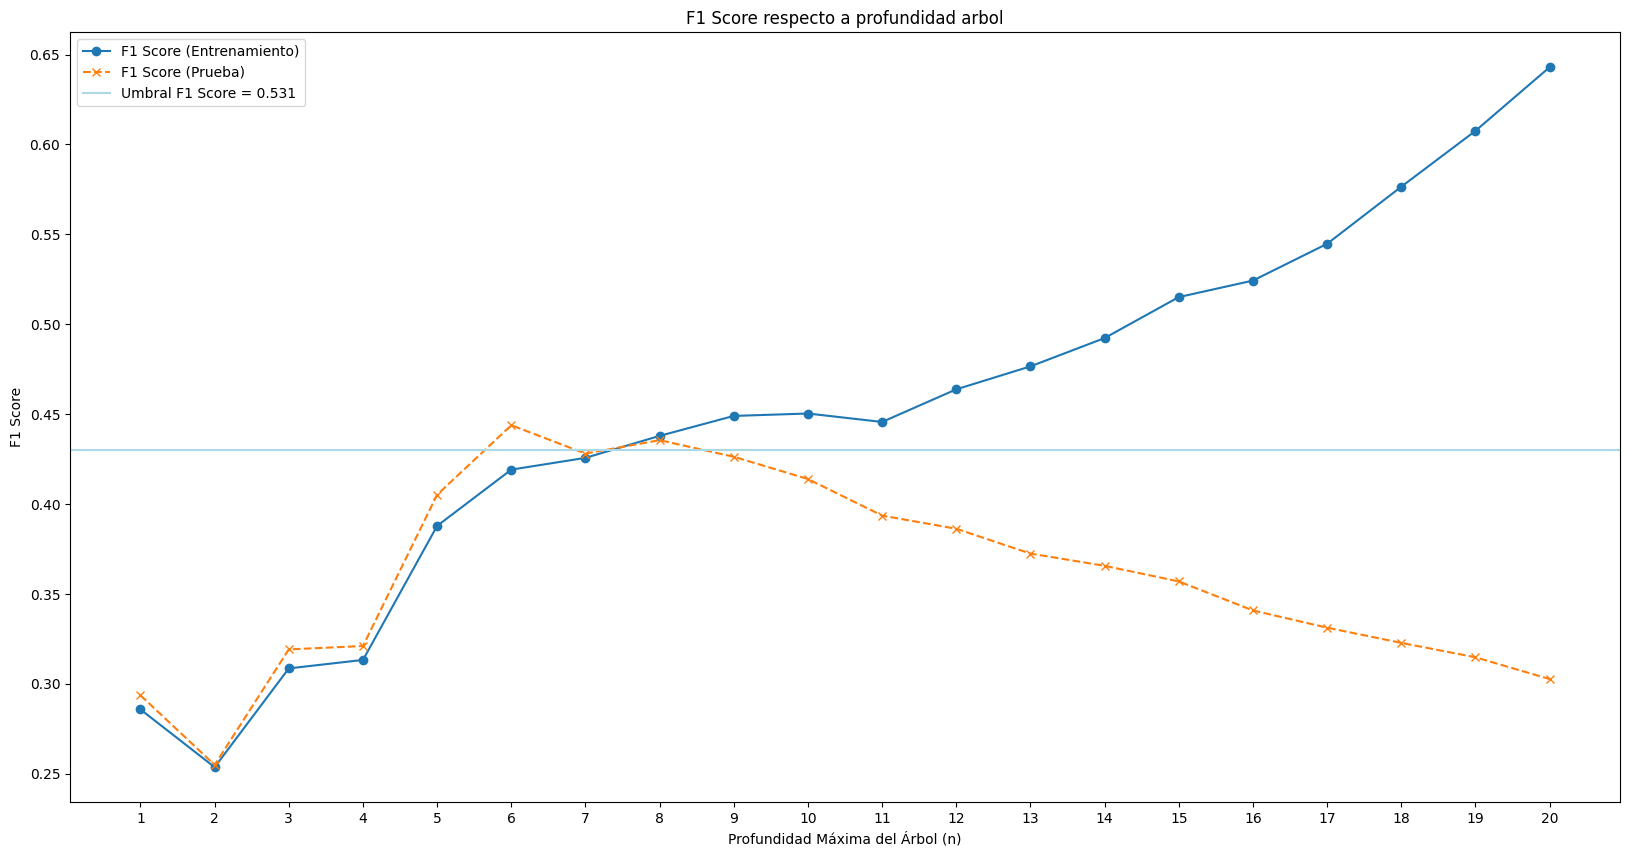

In [ ]:
plt.figure(figsize=(20, 10))

plt.plot(depths, f1_scores_train, marker='o', linestyle='-',
        label='F1 Score (Entrenamiento)')
plt.plot(depths, f1_scores_test, marker='x', linestyle='--',
         label='F1 Score (Prueba)')

plt.axhline(y=0.43, color= 'lightblue', label='Umbral F1 Score = 0.531')

plt.title('F1 Score respecto a profundidad arbol')
plt.xlabel('Profundidad Máxima del Árbol (n)')
plt.ylabel('F1 Score')
plt.xticks(depths) # Mostrar todos los valores enteros en el eje X
plt.legend() # Mostrar la leyenda para identificar las líneas
plt.show()

#n = 6 es la mejor opcion

In [ ]:
n_optimo=6
model_6 = DecisionTreeClassifier(
    max_depth=n_optimo,
    class_weight='balanced',
    random_state=123
    )

model_6.fit(X_train, y_train)
y_test_pred_n = model_6.predict(X_test)
f1_test_n = f1_score(y_test, y_test_pred_n, pos_label='yes')

print(f1_test_n)

0.4438322620140802


In [ ]:
# Calcular Precision
precision_n = precision_score(y_test, y_test_pred_n, pos_label='yes')
recall_n = recall_score(y_test, y_test_pred_n, pos_label='yes')

print(f"Precision del modelo en la base de prueba: {precision_n}")
print(f"Recall del modelo en la base de prueba: {recall_n}")

Precision del modelo en la base de prueba: 0.37275064267352187
Recall del modelo en la base de prueba: 0.5484114977307111





---

El mejor n es igual a 6 (alcanza un F1 Score de 44,4% aprox)

Cuando añado más profundidad a un árbol, al principio aumenta la generalización hacia el test pero luego el modelo "se aprende de memoria los datos de entrenamiento" y falla al ver uno nuevo. Es decir, luego de cierto punto es dificil "aprender" marginalmente más y el modelo se sobreajusta y termina siendo peor para generalizar


---


### Pregunta 1.11

En esta pregunta deberá entrenar _Random Forest Classifier_ realizando un ejercicio previo de _hyperparameter tuning_.

Realice _Cross Validation_ con un _folding_ con `K=5` y calcule $F_1\ Score$ de todas las posibles combinaciones de los siguientes parámetros:

- `n_estimators = {100, 1000}`
- `max_depth = {10, 50, 100}`
- `min_samples_leaf = {2, 4}`

Determine la mejor combinación de parámetros y vuelva a entrenar su bosque con esta. Finalmente, reporte el $F_1\ Score$ con la muestra de prueba.

Cuando realice _Cross Validation_ y cuando entrene el modelo final, asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `RandomForestClassifier()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.



In [ ]:
combinaciones = {
    'n_estimators': [100, 1000],
    'max_depth': [10, 50, 100],
    'min_samples_leaf': [2, 4]
}

rf_base = RandomForestClassifier(class_weight='balanced', random_state=123)

f1_scorer = make_scorer(f1_score, pos_label='yes')

In [ ]:
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=combinaciones,
    cv=5,
    scoring=f1_scorer,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time=   1.8s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time=   1.9s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time=   2.0s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time=   2.0s
[CV] END .max_depth=10, min_samples_leaf=2, n_estimators=100; total time=   2.0s
[CV] END .max_depth=10, min_samples_leaf=4, n_estimators=100; total time=   2.0s
[CV] END .max_depth=10, min_samples_leaf=4, n_estimators=100; total time=   2.1s
[CV] END .max_depth=10, min_samples_leaf=4, n_estimators=100; total time=   2.0s
[CV] END .max_depth=10, min_samples_leaf=4, n_estimators=100; total time=   2.0s
[CV] END .max_depth=10, min_samples_leaf=4, n_estimators=100; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=2, n_estimators=1000; total time=  17.8s
[CV] END max_depth=10, min_samples_leaf=2, n_est

/Users/catamege/Desktop/Uni/9vo semestre/Machine learning/Tarea2-Mege-Lantadilla/.venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=100, min_samples_leaf=2, n_estimators=1000; total time=  31.7s
[CV] END max_depth=100, min_samples_leaf=2, n_estimators=1000; total time=  32.5s
[CV] END max_depth=100, min_samples_leaf=2, n_estimators=1000; total time=  32.7s
[CV] END max_depth=100, min_samples_leaf=4, n_estimators=1000; total time=  27.7s
[CV] END max_depth=100, min_samples_leaf=4, n_estimators=1000; total time=  27.7s
[CV] END max_depth=100, min_samples_leaf=4, n_estimators=1000; total time=  28.0s
[CV] END max_depth=100, min_samples_leaf=4, n_estimators=1000; total time=  24.5s
[CV] END max_depth=100, min_samples_leaf=4, n_estimators=1000; total time=  22.4s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=123),
             n_jobs=-1,
             param_grid={'max_depth': [10, 50, 100], 'min_samples_leaf': [2, 4],
                         'n_estimators': [100, 1000]},
             scoring=make_scorer(f1_score, response_method='predict', pos_label=yes),
             verbose=2)

In [ ]:
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")
print(f"Mejor F1 Score promedio de CV: {grid_search.best_score_}")

Mejores parámetros encontrados: {'max_depth': 50, 'min_samples_leaf': 4, 'n_estimators': 1000}
Mejor F1 Score promedio de CV: 0.45220030413764495


In [ ]:
rf_optimo = grid_search.best_estimator_
rf_optimo.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=50,
                       min_samples_leaf=4, n_estimators=1000, random_state=123)

In [ ]:
y_test_pred_rf_optimo = rf_optimo.predict(X_test)
f1_test_rf_optimo = f1_score(y_test, y_test_pred_rf_optimo, pos_label='yes')

print(f1_test_rf_optimo)

0.47560975609756095


In [ ]:
precision_rf_optimo = precision_score(y_test, y_test_pred_rf_optimo, pos_label='yes')  # noqa: E501
recall_rf_optimo = recall_score(y_test, y_test_pred_rf_optimo, pos_label='yes')

print(f"Precision del modelo en la base de prueba: {precision_rf_optimo}")
print(f"Recall del modelo en la base de prueba: {recall_rf_optimo}")

Precision del modelo en la base de prueba: 0.4306748466257669
Recall del modelo en la base de prueba: 0.5310136157337367


### Pregunta 1.12

En esta pregunta deberá entrenar _XGBpost Classifier_ realizando un ejercicio previo de _hyperparameter tuning_.

Repita el ejercicio de _Cross Validation_ anterior, pero está vez evaluando:

- `n_estimators = {100, 1000}`
- `max_depth = {5, 50, 100}`
- `learning_rate = {0.05, 0.1, 0.5}`
- `max_leaves= {2, 4, 10}`

Determine la mejor combinación de parámetros y vuelva a entrenar su bosque con esta, reportando el $F_1\ Score$ con la muestra de prueba.

Asegúrese de que sus modelos sean capaces de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `XGBClassifier()` (parámetros de inicialización): https://xgboost.readthedocs.io/en/latest/python/python_api.html.


In [ ]:
le = LabelEncoder()
y_target_encoded = le.fit_transform(df['y'])

In [ ]:
balance = 0.5
is_balanced = y_target_encoded.min() > balance # type: ignore
print(is_balanced)

False


In [ ]:
X_pipeline = df.drop(columns=['y', 'pdays', 'log(pdays)', 'previous',
                              'log(previous)','day_of_week', 'duration'])

X_processed = processor.fit_transform(X_pipeline)

X_train, X_test, y_train, y_test = train_test_split(
    X_processed,
    y_target_encoded,
    test_size=0.25,
    random_state=123,
    stratify=y_target_encoded
)

In [ ]:
y_train

array([0, 0, 1, ..., 0, 0, 0], shape=(33905,))

In [ ]:
negativo = pd.Series(y_train).value_counts()[0]
positivo = pd.Series(y_train).value_counts()[1]
pesos = negativo / positivo

In [ ]:
combinaciones = {
    'n_estimators': [100, 1000],
    'max_depth': [5, 50, 100],
    'learning_rate': [0.05, 0.1, 0.5],
    'max_leaves': [2, 4, 10]
}

f1_scorer = make_scorer(f1_score, pos_label=1)

In [ ]:
xgb_model_base = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=pesos,
    random_state=123,
    n_jobs=-1
)

In [ ]:
grid_search = GridSearchCV(
    estimator=xgb_model_base,
    param_grid=combinaciones,
    cv=5,
    scoring=f1_scorer,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END learning_rate=0.05, max_depth=5, max_leaves=2, n_estimators=100; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, max_leaves=2, n_estimators=100; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, max_leaves=2, n_estimators=100; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, max_leaves=2, n_estimators=100; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, max_leaves=4, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, max_leaves=4, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, max_leaves=4, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, max_leaves=4, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, max_leaves=4, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, max_leaves=2, n_estimators=100; total time=   0.2s
[CV] END

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.5],
                         'max_depth': [5, 50, 100], 'max_leaves': [2, 4, 10],
                         'n_estimators': [100, 1000]},
             scoring=make_scorer(f1_score, response_method='predict', pos_label=1),
             verbose=2)

In [ ]:
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")
print(f"Mejor F1 Score promedio de CV: {grid_search.best_score_}")

Mejores parámetros encontrados: {'learning_rate': 0.1, 'max_depth': 5, 'max_leaves': 10, 'n_estimators': 100}
Mejor F1 Score promedio de CV: 0.41732633287592347


In [ ]:
xgb_optimo = grid_search.best_estimator_
xgb_optimo.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=10,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, ...)

In [ ]:
y_test_pred_xgb_optimo = xgb_optimo.predict(X_test)
f1_test_xgb_optimo = f1_score(y_test, y_test_pred_xgb_optimo, pos_label=1)

print(f1_test_xgb_optimo)

0.4341286307053942


In [ ]:
precision_xgb_optimo = precision_score(y_test, y_test_pred_xgb_optimo, pos_label=1)  # noqa: E501
recall_xgb_optimo = recall_score(y_test, y_test_pred_xgb_optimo, pos_label=1)

print(f"Precision del modelo en la base de prueba: {precision_xgb_optimo}")
print(f"Recall del modelo en la base de prueba: {recall_xgb_optimo}")

Precision del modelo en la base de prueba: 0.3303078137332281
Recall del modelo en la base de prueba: 0.6331316187594553


### Pregunta 1.13

Entrene un modelo _Naïve Bayes_. Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `GaussianNB()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html.


Despliege el $F_1\ Score$ del modelo sobre la base de prueba.

In [ ]:
smote = SMOTE(random_state=123)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train) # type: ignore

In [ ]:
gnb_model = GaussianNB()
gnb_model.fit(X_train_balanced, y_train_balanced) # type: ignore

GaussianNB()

In [ ]:
y_test_pred_gnb = gnb_model.predict(X_test)
f1_test_gnb = f1_score(y_test, y_test_pred_gnb, pos_label=1)

print(f1_test_gnb)

0.3651211801896733


In [ ]:
precision_gnb = precision_score(y_test, y_test_pred_gnb, pos_label=1)
recall_gnb = recall_score(y_test, y_test_pred_gnb, pos_label=1)

print(f"Precision del modelo en la base de prueba: {precision_gnb}")
print(f"Recall del modelo en la base de prueba: {recall_gnb}")

Precision del modelo en la base de prueba: 0.2801131770412288
Recall del modelo en la base de prueba: 0.5242057488653555




---



## Análisis Comparativo de Modelos de Clasificación


### Pregunta 1.14

Evalúe y compare el desempeño de los modelos teniendo en cuenta la naturaleza del conjunto de datos. ¿Cómo afectó el desbalance a cada modelo? ¿Qué modelo manejó mejor el balance o desbalance de clases y cuáles son sus conclusiones generales sobre su rendimiento comparado?

Para que la comparación sea clara, es útil indicar qué métricas de evaluación utilizo para comparar los modelos (por ejemplo, F1-score, precisión, recall, AUC, etc.).

In [ ]:
model_performance = {
    "Modelo": [
        "Decision Tree (Profundidad Óptima)",
        "Random Forest (Óptimo)",
        "XGBoost (Óptimo)",
        "Naïve Bayes"
    ],
    "F1 Score (Test)": [
        f1_test_n,
        f1_test_rf_optimo,
        f1_test_xgb_optimo,
        f1_test_gnb
    ],
    "Precision": [
        precision_n,
        precision_rf_optimo,
        precision_xgb_optimo,
        precision_gnb
    ],
    'Recall': [
        recall_n,
        recall_rf_optimo,
        recall_xgb_optimo,
        recall_gnb
    ]
}

df_total = pd.DataFrame(model_performance)
print(df_total)

                               Modelo  F1 Score (Test)  Precision    Recall
0  Decision Tree (Profundidad Óptima)         0.443832   0.372751  0.548411
1              Random Forest (Óptimo)         0.475610   0.430675  0.531014
2                    XGBoost (Óptimo)         0.434129   0.330308  0.633132
3                         Naïve Bayes         0.365121   0.280113  0.524206





---

El modelo con el F1 Score más alto fue el random forest y sería el más adecuado para la campaña pues optimiza los falsos negativos y falsos positivos. Esto se da porque promedia las predicciones de muchos árboles y así reduce la varianza del modelo. Esto le permite generalizar mucho mejor a datos no vistos que un solo árbol.

**Impacto del Desbalance y Manejo:** Todos los modelos se entrenaron con datos divididos usando `stratify=y_target_encoded`, asegurando que la proporción de clases se mantuviera en entrenamiento y prueba.
- Para Decision Tree y Random Forest, se usó `class_weight='balanced'` para que el modelo asignara un mayor peso a los errores de clasificación de la clase minoritaria.
- Para XGBoost, se usó `scale_pos_weight` calculado como la proporción de clases negativa/positiva en el entrenamiento, logrando un balanceo de pesos.
- Para Naïve Bayes, se aplicó SMOTE al conjunto de entrenamiento para balancear físicamente las clases antes de entrenar el modelo.

**Conclusiones Generales:** La comparación de los Decision Trees demuestra claramente la importancia de la regularización para combatir el sobreajuste y mejorar la capacidad de generalización a datos no vistos. Los modelos de ensamble (Random Forest, XGBoost) suelen superar a los modelos individuales (Decision Tree simple) porque combinan las predicciones de múltiples modelos para reducir errores y mejorar la robustez. 

---


# KMeans & PCA

La guerra comercial desatada levanta un montón de preguntas de interés en economía. Una de estas es: ¿Qué países sufrirán de forma similar las consecuencias de esta? ¿Quiénes serían ganadores? ¿Quienes serían perdedores?

En esta parte exploraremos el aporte que los métodos de Clustering de Machine Learning pueden hacer a la respuesta de esta cuestión. Nos enfocaremos en variables relacionadas al comercio exterior para determinar similitud entre grupos de países. Más específicamente, en variables relacionadas a las exportaciones.

Para esto, considere las siguientes variables que describen el perfil exportador de cada país:

- GDP growth (annual %)
- Agricultural raw materials exports (% of merchandise exports)
- Computer, communications and other services (% of commercial service exports)
- Exports of goods and services (% of GDP)
- Food exports (% of merchandise exports)
- Fuel exports (% of merchandise exports)
- High-technology exports (% of manufactured exports)
- ICT service exports (% of service exports, BoP)
- Insurance and financial services (% of service exports, BoP)
- International tourism, receipts (% of total exports)
- Manufactures exports (% of merchandise exports)
- Merchandise exports to high-income economies (% of total merchandise exports)
- Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)
- Ores and metals exports (% of merchandise exports)
- Taxes on exports (% of tax revenue)
- Transport services (% of commercial service exports)


La idea será determinar similitud entre países y las variables qué son más relevantes a la hora de determinarla.

Debido a que 2023 es el año reciente con una mayor riqueza de datos, y debido a que nos interesan cambios respecto al _status quo_ en el contexto actual, trabajaremos con datos sólo de aquel año.

Database Source: World bank & Trade Analysis Information System.



### Pregunta 2.0

Cargue la base de datos disponible en el siguiente link: https://raw.githubusercontent.com/olherreragz/EAE3709-2025-1/refs/heads/main/T2_data/Data.cs.

En el siguiente link podrá encontrar información adicional sobre el _dataset_ por si lo llega a necesitar: https://github.com/olherreragz/EAE3709-2025-1/blob/main/T2_data/Series_Metadata.csv.

Elimine las columnas `"Series Code"` y `"Country Code"`. Luego, transforme su _dataframe_ de formato _Long_ a _Wide_. Su _dataframe_ final deberá contener una columna que indique el nombre del país y columnas que indiquen la medida de exportación correspondiente:

`<Country>, <SeriesName1>, <SeriesName2> ....`



![Long to Wide Format](https://tavareshugo.github.io/r-intro-tidyverse-gapminder/fig/07-data_shapes.png)




In [1256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D

In [1257]:
df= pd.read_csv('https://raw.githubusercontent.com/olherreragz/EAE3709-2025-1/refs/heads/main/T2_data/Data.csv')
df.head()

Series Name        Series Code    Country Name Country Code  \
0  GDP growth (annual %)  NY.GDP.MKTP.KD.ZG     Afghanistan          AFG   
1  GDP growth (annual %)  NY.GDP.MKTP.KD.ZG         Albania          ALB   
2  GDP growth (annual %)  NY.GDP.MKTP.KD.ZG         Algeria          DZA   
3  GDP growth (annual %)  NY.GDP.MKTP.KD.ZG  American Samoa          ASM   
4  GDP growth (annual %)  NY.GDP.MKTP.KD.ZG         Andorra          AND   

      2023 [YR2023]  
0  2.71088679128353  
1  3.93662525742167  
2  4.10000000000004  
3                ..  
4  2.58355480961319

In [1258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    4256 non-null   object
 1   Series Code    4256 non-null   object
 2   Country Name   4256 non-null   object
 3   Country Code   4256 non-null   object
 4   2023 [YR2023]  4256 non-null   object
dtypes: object(5)
memory usage: 166.4+ KB


In [1259]:
df = df.drop(columns=['Series Code', 'Country Code'])

In [1260]:
df = df.pivot(index='Country Name', columns='Series Name', values='2023 [YR2023]').reset_index()
df.head()

Series Name                 Country Name  \
0                            Afghanistan   
1            Africa Eastern and Southern   
2             Africa Western and Central   
3                                Albania   
4                                Algeria   

Series Name Agricultural raw materials exports (% of merchandise exports)  \
0                                                           ..              
1                                             1.93287526195653              
2                                             3.80482687815641              
3                                            0.406032063201426              
4                                                           ..              

Series Name Computer; communications and other services (% of commercial service exports)  \
0                                                           ..                              
1                                             35.9298385263195                              
2                                             23.7057568350145                              
3                                             24.4301090197124                              
4                                             59.1626427564765                              

Series Name Exports of goods and services (% of GDP)  \
0                                   16.7751362822863   
1                                   24.3483372544611   
2                                                 ..   
3                                   38.6650817896799   
4                                   23.6195363708424   

Series Name Food exports (% of merchandise exports)  \
0                                                ..   
1                                   14.285851632509   
2                                  12.9874441377748   
3                                  11.9640780632637   
4                                                ..   

Series Name Fuel exports (% of merchandise exports) GDP growth (annual %)  \
0                                                ..      2.71088679128353   
1                                  25.4254224001233      2.32013780158925   
2                                  61.3705691120184       3.3547328190002   
3                                  6.34538423879421      3.93662525742167   
4                                                ..      4.10000000000004   

Series Name High-technology exports (% of manufactured exports)  \
0                                                           ..    
1                                             5.80516538196113    
2                                                           ..    
3                                            0.682326849473647    
4                                                           ..    

Series Name ICT service exports (% of service exports; BoP)  \
0                                                        ..   
1                                          6.10657347896149   
2                                          5.69176863421842   
3                                          3.01397608748124   
4                                          2.21311390791552   

Series Name Insurance and financial services (% of service exports; BoP)  \
0                                                           ..             
1                                             6.08028700896879             
2                                             14.9934752391386             
3                                            0.662505307988438             
4                                             10.2830758414755             

Series Name International tourism; receipts (% of total exports)  \
0                                                           ..     
1                                                           ..     
2                                                           ..     
3                                                           ..     
4  

In [1261]:
df.info()

#según info no hay missings pero en head se ven como ".."

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 17 columns):
 #   Column                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                             --------------  ----- 
 0   Country Name                                                                                                       266 non-null    object
 1   Agricultural raw materials exports (% of merchandise exports)                                                      266 non-null    object
 2   Computer; communications and other services (% of commercial service exports)                                      266 non-null    object
 3   Exports of goods and services (% of GDP)                                                                           266 non-null    object
 4   Food exports (% of merchandise e

### Pregunta 2.1

Debido a que la pregunta de interés es sobre identificación de grupos de países, elime filas donde `Country Name` sea igual a cualquiera de los siguientes valores:

- "Africa Eastern and Southern"  
- "Africa Western and Central"  
- "Arab World"  
- "Caribbean small states"  
- "Central Europe and the Baltics"  
- "Early-demographic dividend"  
- "East Asia & Pacific"  
- "East Asia & Pacific (IDA & IBRD countries)"  
- "East Asia & Pacific (excluding high income)"  
- "Euro area"  
- "Europe & Central Asia"  
- "Europe & Central Asia (IDA & IBRD countries)"  
- "Europe & Central Asia (excluding high income)"  
- "European Union"  
- "Fragile and conflict affected situations"  
- "Heavily indebted poor countries (HIPC)"  
- "High income"  
- "IBRD only"  
- "IDA & IBRD total"  
- "IDA blend"  
- "IDA only"  
- "IDA total"  
- "Late-demographic dividend"  
- "Latin America & Caribbean"  
- "Latin America & Caribbean (excluding high income)"  
- "Latin America & the Caribbean (IDA & IBRD countries)"  
- "Least developed countries: UN classification"  
- "Low & middle income"  
- "Low income"  
- "Lower middle income"  
- "Middle East & North Africa"  
- "Middle East & North Africa (IDA & IBRD countries)"  
- "Middle East & North Africa (excluding high income)"  
- "Middle income"  
- "North America"  
- "Not classified"  
- "OECD members"  
- "Other small states"  
- "Pacific island small states"  
- "Post-demographic dividend"  
- "Pre-demographic dividend"  
- "Small states"  
- "South Asia"  
- "South Asia (IDA & IBRD)"  
- "Sub-Saharan Africa"  
- "Sub-Saharan Africa (IDA & IBRD countries)"  
- "Sub-Saharan Africa (excluding high income)"  
- "Upper middle income"  
- "World"




In [1262]:
countries_to_remove = [
    "Africa Eastern and Southern",
    "Africa Western and Central",
    "Arab World",
    "Caribbean small states",
    "Central Europe and the Baltics",
    "Early-demographic dividend",
    "East Asia & Pacific",
    "East Asia & Pacific (IDA & IBRD countries)",
    "East Asia & Pacific (excluding high income)",
    "Euro area",
    "Europe & Central Asia",
    "Europe & Central Asia (IDA & IBRD countries)",
    "Europe & Central Asia (excluding high income)",
    "European Union",
    "Fragile and conflict affected situations",
    "Heavily indebted poor countries (HIPC)",
    "High income",
    "IBRD only",
    "IDA & IBRD total",
    "IDA blend",
    "IDA only",
    "IDA total",
    "Late-demographic dividend",
    "Latin America & Caribbean",
    "Latin America & Caribbean (excluding high income)",
    "Latin America & the Caribbean (IDA & IBRD countries)",
    "Least developed countries: UN classification",
    "Low & middle income",
    "Low income",
    "Lower middle income",
    "Middle East & North Africa",
    "Middle East & North Africa (IDA & IBRD countries)",
    "Middle East & North Africa (excluding high income)",
    "Middle income",
    "North America",
    "Not classified",
    "OECD members",
    "Other small states",
    "Pacific island small states",
    "Post-demographic dividend",
    "Pre-demographic dividend",
    "Small states",
    "South Asia",
    "South Asia (IDA & IBRD)",
    "Sub-Saharan Africa",
    "Sub-Saharan Africa (IDA & IBRD countries)",
    "Sub-Saharan Africa (excluding high income)",
    "Upper middle income",
    "World"
]

df = df[~df['Country Name'].isin(countries_to_remove)].reset_index(drop=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 17 columns):
 #   Column                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                             --------------  ----- 
 0   Country Name                                                                                                       217 non-null    object
 1   Agricultural raw materials exports (% of merchandise exports)                                                      217 non-null    object
 2   Computer; communications and other services (% of commercial service exports)                                      217 non-null    object
 3   Exports of goods and services (% of GDP)                                                                           217 non-null    object
 4   Food exports (% of merchandise e

### Pregunta 2.2

Reemplace todos los valores `".."` por `NA`. Luego, transforme las columnas a variables numéricas y despliegue estadísticas descriptivas.


In [1263]:
df = df.replace('..', np.nan)
df.info() #ahora sí se ven los missings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 17 columns):
 #   Column                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                             --------------  -----  
 0   Country Name                                                                                                       217 non-null    object 
 1   Agricultural raw materials exports (% of merchandise exports)                                                      149 non-null    object 
 2   Computer; communications and other services (% of commercial service exports)                                      161 non-null    object 
 3   Exports of goods and services (% of GDP)                                                                           158 non-null    object 
 4   Food exports (% of merchan

/var/folders/5s/03hymdfn4zd7n8t6c0myx93w0000gn/T/ipykernel_45280/1924316363.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('..', np.nan)


In [1264]:
df = df.apply(pd.to_numeric, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 17 columns):
 #   Column                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                             --------------  -----  
 0   Country Name                                                                                                       217 non-null    object 
 1   Agricultural raw materials exports (% of merchandise exports)                                                      149 non-null    float64
 2   Computer; communications and other services (% of commercial service exports)                                      161 non-null    float64
 3   Exports of goods and services (% of GDP)                                                                           158 non-null    float64
 4   Food exports (% of merchan

/var/folders/5s/03hymdfn4zd7n8t6c0myx93w0000gn/T/ipykernel_45280/2930620201.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [1265]:
df.describe().T

count       mean  \
Series Name                                                            
Agricultural raw materials exports (% of mercha...  149.0   2.726255   
Computer; communications and other services (% ...  161.0  35.005284   
Exports of goods and services (% of GDP)            158.0  45.398868   
Food exports (% of merchandise exports)             149.0  24.136526   
Fuel exports (% of merchandise exports)             145.0  14.275881   
GDP growth (annual %)                               195.0   3.241160   
High-technology exports (% of manufactured expo...  147.0  11.352849   
ICT service exports (% of service exports; BoP)     157.0  10.234009   
Insurance and financial services (% of service ...  152.0   5.732781   
International tourism; receipts (% of total exp...    0.0        NaN   
Manufactures exports (% of merchandise exports)     149.0  42.098438   
Merchandise exports to high-income economies (%...  205.0  60.914241   
Merchandise exports to low- and middle-income e...  192.0   5.096570   
Ores and metals exports (% of merchandise exports)  149.0   9.476862   
Taxes on exports (% of tax revenue)                  22.0   2.624425   
Transport services (% of commercial service exp...  161.0  20.583359   

                                                          std        min  \
Series Name                                                                
Agricultural raw materials exports (% of mercha...   7.416283   0.000000   
Computer; communications and other services (% ...  23.550764   0.935706   
Exports of goods and services (% of GDP)            33.331007   1.108109   
Food exports (% of merchandise exports)             23.862474   0.079874   
Fuel exports (% of merchandise exports)             23.215387   0.000000   
GDP growth (annual %)                                6.641153 -20.111576   
High-technology exports (% of manufactured expo...  13.507894   0.000000   
ICT service exports (% of service exports; BoP)     11.534976   0.043145   
Insurance and financial services (% of service ...   7.703914   0.008135   
International tourism; receipts (% of total exp...        NaN        NaN   
Manufactures exports (% of merchandise exports)     29.236666   0.210353   
Merchandise exports to high-income economies (%...  24.978469   0.121224   
Merchandise exports to low- and middle-income e...  11.628976   0.000034   
Ores and metals exports (% of merchandise exports)  15.470820   0.000000   
Taxes on exports (% of tax revenue)                  4.899022   0.000002   
Transport services (% of commercial service exp...  16.870115   0.663447   

                                                          25%        50%  \
Series Name                                                                
Agricultural raw materials exports (% of mercha...   0.343928   0.794963   
Computer; communications and other services (% ...  13.309551  32.273353   
Exports of goods and services (% of GDP)            23.637110  38.790357   
Food exports (% of merchandise exports)              8.338115  15.056512   
Fuel exports (% of merchandise exports)              0.498740   4.097826   
GDP growth (annual %)                                1.168088   2.960181   
High-technology exports (% of manufactured expo...   2.226174   6.030929   
ICT service exports (% of service exports; BoP)      2.681207   7.285006   
Insurance and financial services (% of service ...   1.319000   3.203366   
International tourism; receipts (% of total exp...        NaN        NaN   
Manufactures exports (% of merchandise exports)     15.347126  37.251121   
Merchandise exports to high-income economies (%...  43.902677  65.682415   
Merchandise exports to low- and middle-income e...   0.244645   0.942470   
Ores and metals exports (% of merchandise exports)   1.353868   3.138350   
Taxes on exports (% of tax revenue)                  0.046153   0.232860   
Transport services (% of commercial service exp...   7.784412  15.739129   

                 

### Pregunta 2.3

Grafique la distribución empírica de todas las variables numéricas del dataset. Comente sobre cada una de ellas.

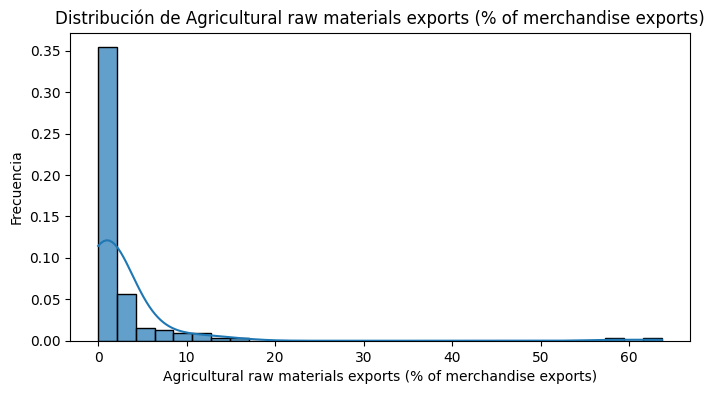

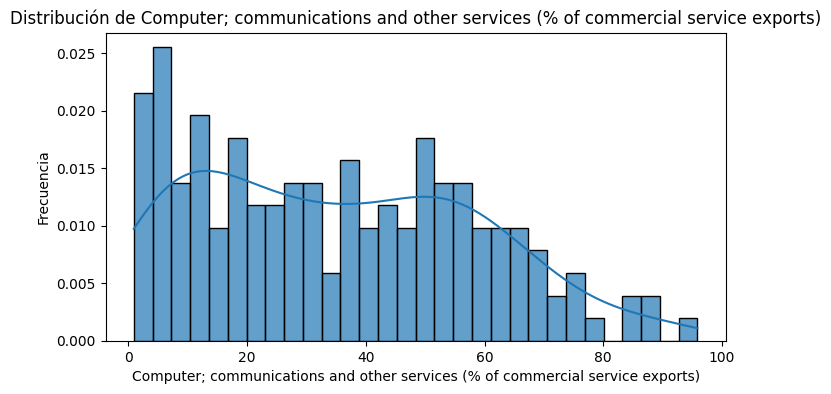

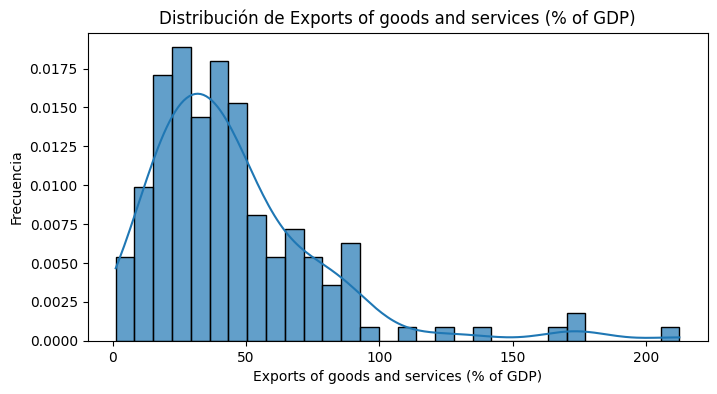

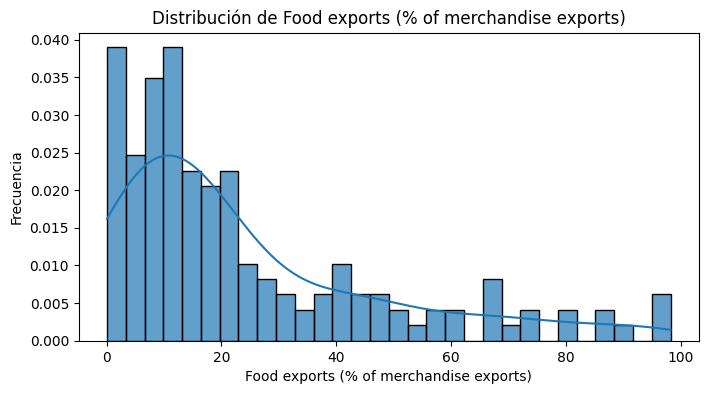

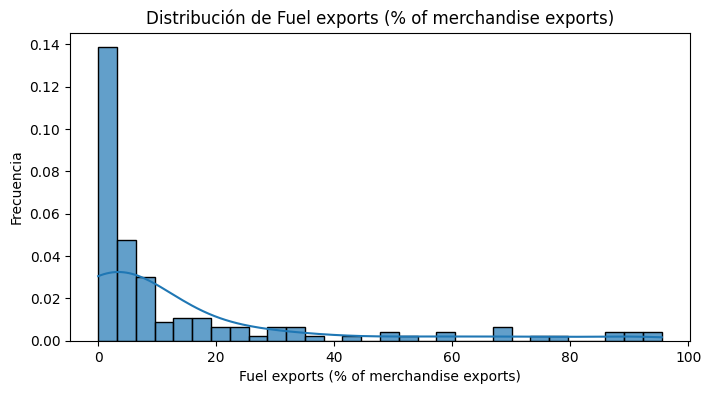

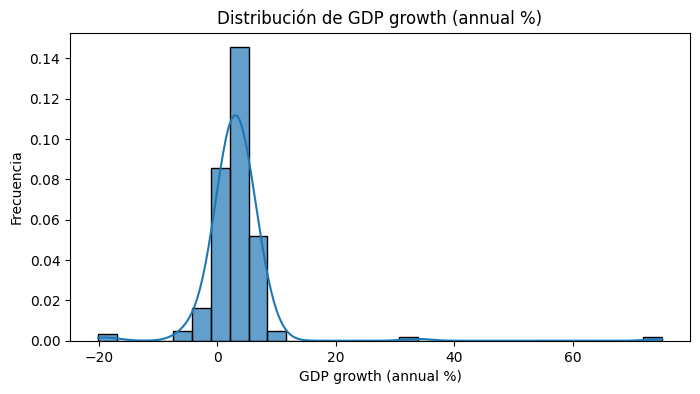

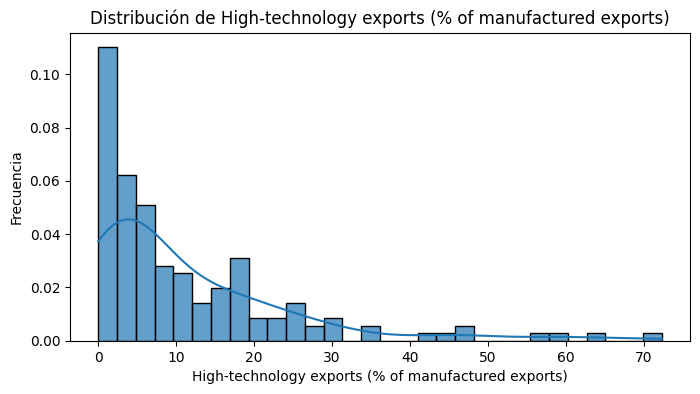

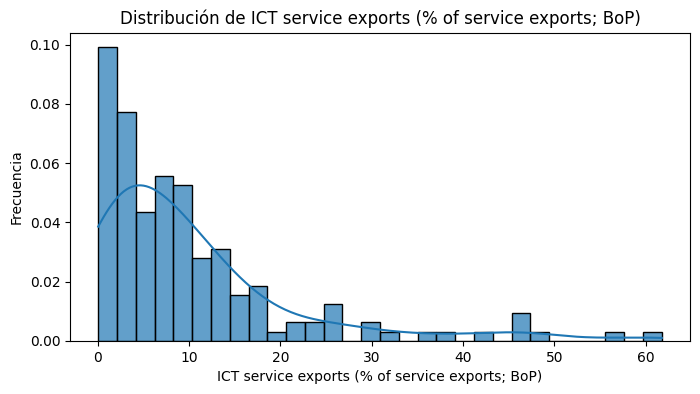

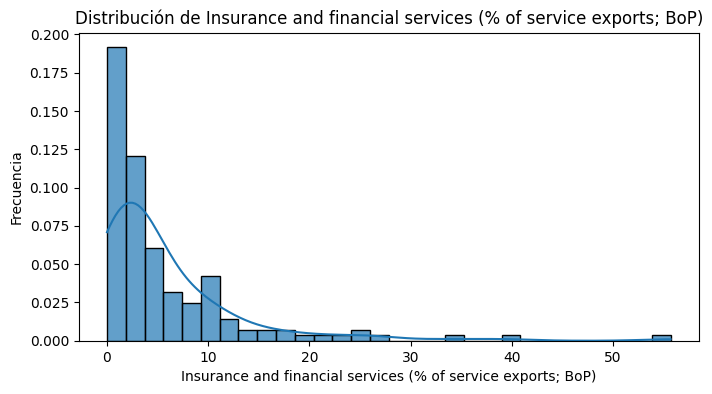

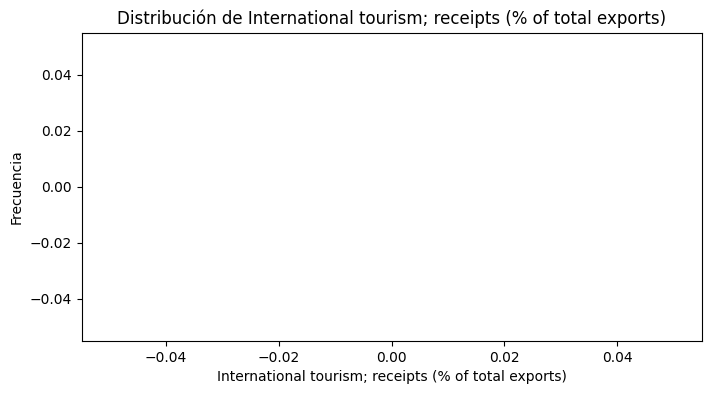

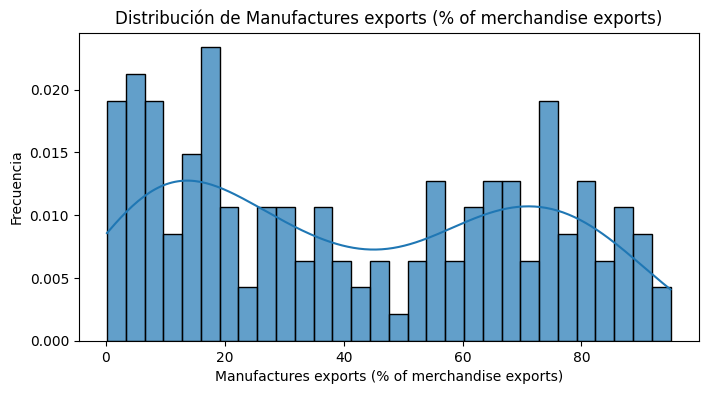

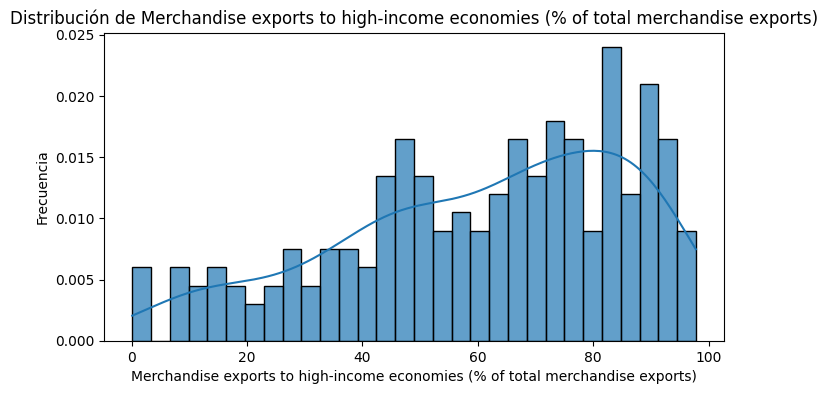

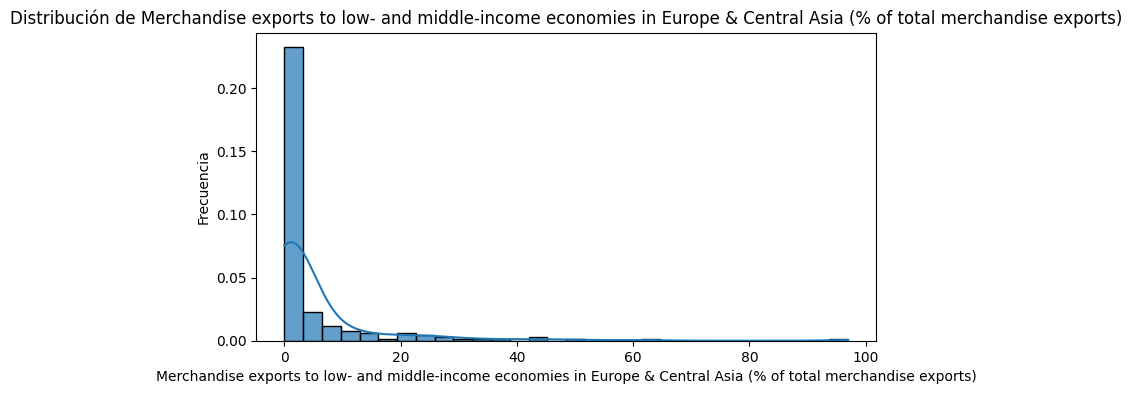

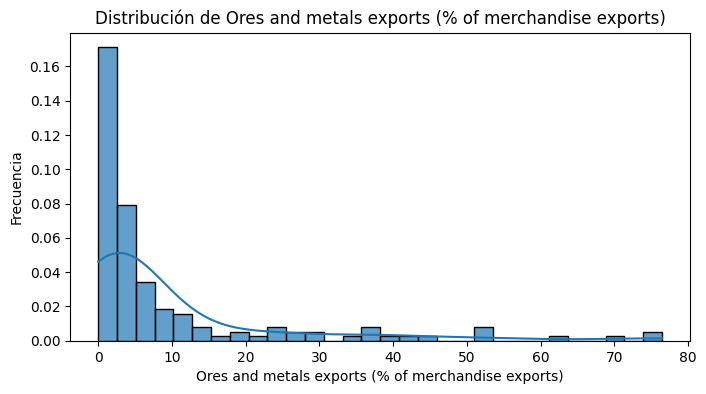

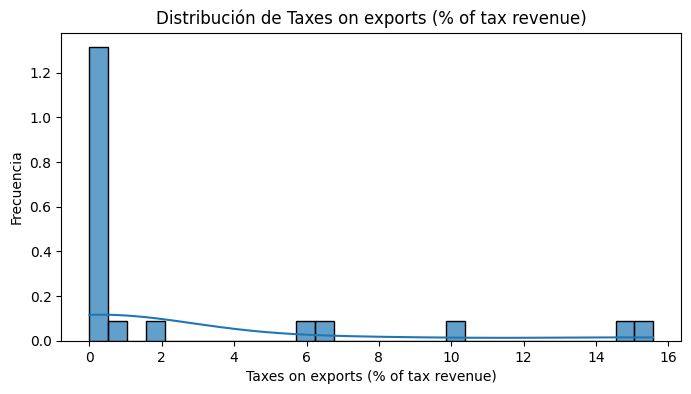

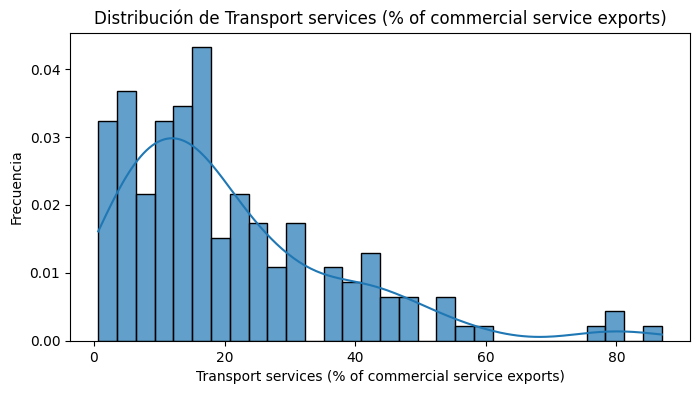

In [1266]:
df_numeric = df.select_dtypes(include=np.number)
for col in df_numeric.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_numeric[col].dropna(), bins=30, stat='density', alpha=0.7, kde= 'True') 
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

A partir de las distribuciones y boxplots, notamos que todas las variables presentan outliers, excepto "Merchandise exports to high-income economies" y "Manufactures exports".

"GDP growth" y "Computer: comunication and services" tienen pocos outliers, mientrás que las demás tienen bastantes, concentrandose principalmente en valores extremos altos y dispersos entre si.

Decidimos mantener estos valores ya que eliminarlos o reemplazarlos distorsiona la verdadera estructura económica de los países, haciendo que países muy distintos parezcan similares y que al hacer clusterización puedan quedar agrupados en el mismo cluster incorrectamente.




---


*   **Agricultural raw materials exports (% of merchandise exports)**: se observa que la mayoría de los países se concentra entre 0% y 5%, lo que indica que la mayoría de países exporta poco de materias primas agrícolas. También se observan algunos países outliers entre 55% - 65% , esto indica la presencia de países donde la exportación de materias primas agrícolas representa parte importante de sus exportaciones.

*   C**omputer; communications and other services (% of commercial service exports)** : se observa una leve concentración hacia valores bajos de la distribución, pero la distribución es relativamente estable/uniforme lo que implica que los países difieren bastante entre si en cuanto a su particiáción en servicios tecnológicos dentro de sus exportaciones.
eset
* Exports of goods and services (% of GDP)

* Food exports (% of merchandise exports)     

* Fuel exports (% of merchandise exports)

* GDP growth (annual %)                     

* High-technology exports (% of manufactured exports)  

* ICT service exports (% of service exports; BoP)         

* Insurance and financial services (% of service exports; BoP) La mayoría de observaciones se concntran al

* International tourism; receipts (% of total exports) : podemos observar que este gráfico no muestra ninguna distribución, lo que ocurre porque esta variable posee unicamente missings. Esto se tratará en el siguiente inciso.

* Manufactures exports (% of merchandise exports)

* Merchandise exports to high-income economies (% of total merchandise exports)

* Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)

* Ores and metals exports (% of merchandise exports)

* Taxes on exports (% of tax revenue)

* Transport services (% of commercial service exports)  


---


## Missing Values

### Pregunta 2.4

Realice análisis de valores vacíos y tratamiento de estos. Se premiará mantener el mayor número de observaciones posibles bajo criterios razonables. Luego de esta pregunta no deben quedar nulos en el _dataframe_ a utilizar.


In [1267]:
df.isna().sum()

Series Name
Country Name                                                                                                           0
Agricultural raw materials exports (% of merchandise exports)                                                         68
Computer; communications and other services (% of commercial service exports)                                         56
Exports of goods and services (% of GDP)                                                                              59
Food exports (% of merchandise exports)                                                                               68
Fuel exports (% of merchandise exports)                                                                               72
GDP growth (annual %)                                                                                                 22
High-technology exports (% of manufactured exports)                                                                   70
ICT service exports 

la variable "International tourism: receipts (% of total exports) tiene todas sus observaciones missings, y la variable "Taxes on exports (% of tax revenues) tiene 195 valores faltantes, es decir casi un 90% de los datos. Se decidió eliminar estas variables ya que imputarles un valor podría sesgar mucho los resultados.

In [1268]:
df = df.drop(columns=[
    'International tourism; receipts (% of total exports)',
    'Taxes on exports (% of tax revenue)'
]).reset_index(drop=True)

Además, buscamos países que tengan todas (o la mayoria) variables missings para eliminarlos también.

In [1269]:
numeric_cols = df.select_dtypes(include=np.number).columns
proportion = (df[numeric_cols].isna().sum(axis=1) / len(df))*100
df['NaN_Proportion'] = proportion

In [1270]:
missing_threshold = 90
df = df[df['NaN_Proportion'] < missing_threshold]
df = df.drop(columns=['NaN_Proportion'])

Para las demás variables observamos su media y mediana para decidir qué método de imputación usar.

In [1271]:
df.describe().T

count       mean  \
Series Name                                                            
Agricultural raw materials exports (% of mercha...  149.0   2.726255   
Computer; communications and other services (% ...  161.0  35.005284   
Exports of goods and services (% of GDP)            158.0  45.398868   
Food exports (% of merchandise exports)             149.0  24.136526   
Fuel exports (% of merchandise exports)             145.0  14.275881   
GDP growth (annual %)                               195.0   3.241160   
High-technology exports (% of manufactured expo...  147.0  11.352849   
ICT service exports (% of service exports; BoP)     157.0  10.234009   
Insurance and financial services (% of service ...  152.0   5.732781   
Manufactures exports (% of merchandise exports)     149.0  42.098438   
Merchandise exports to high-income economies (%...  205.0  60.914241   
Merchandise exports to low- and middle-income e...  192.0   5.096570   
Ores and metals exports (% of merchandise exports)  149.0   9.476862   
Transport services (% of commercial service exp...  161.0  20.583359   

                                                          std        min  \
Series Name                                                                
Agricultural raw materials exports (% of mercha...   7.416283   0.000000   
Computer; communications and other services (% ...  23.550764   0.935706   
Exports of goods and services (% of GDP)            33.331007   1.108109   
Food exports (% of merchandise exports)             23.862474   0.079874   
Fuel exports (% of merchandise exports)             23.215387   0.000000   
GDP growth (annual %)                                6.641153 -20.111576   
High-technology exports (% of manufactured expo...  13.507894   0.000000   
ICT service exports (% of service exports; BoP)     11.534976   0.043145   
Insurance and financial services (% of service ...   7.703914   0.008135   
Manufactures exports (% of merchandise exports)     29.236666   0.210353   
Merchandise exports to high-income economies (%...  24.978469   0.121224   
Merchandise exports to low- and middle-income e...  11.628976   0.000034   
Ores and metals exports (% of merchandise exports)  15.470820   0.000000   
Transport services (% of commercial service exp...  16.870115   0.663447   

                                                          25%        50%  \
Series Name                                                                
Agricultural raw materials exports (% of mercha...   0.343928   0.794963   
Computer; communications and other services (% ...  13.309551  32.273353   
Exports of goods and services (% of GDP)            23.637110  38.790357   
Food exports (% of merchandise exports)              8.338115  15.056512   
Fuel exports (% of merchandise exports)              0.498740   4.097826   
GDP growth (annual %)                                1.168088   2.960181   
High-technology exports (% of manufactured expo...   2.226174   6.030929   
ICT service exports (% of service exports; BoP)      2.681207   7.285006   
Insurance and financial services (% of service ...   1.319000   3.203366   
Manufactures exports (% of merchandise exports)     15.347126  37.251121   
Merchandise exports to high-income economies (%...  43.902677  65.682415   
Merchandise exports to low- and middle-income e...   0.244645   0.942470   
Ores and metals exports (% of merchandise exports)   1.353868   3.138350   
Transport services (% of commercial service exp...   7.784412  15.739129   

                                                          75%         max  
Series Name                                                                
Agricultural raw materials exports (% of mercha...   2.120083   63.703068  
Computer; communications and other services (% ...  53.862266   95.860793  
Exports of goods and services (% of GDP)            56.494967  212.530618  
Food exports (% of merchandise exports)             32.790842   98.210416  
Fuel expo

Notamos que la media y mediana difieren bastante en la mayoría de las variables, esto también lo pudimos ver en los gráficos de sus distribuciones, donde se ve que son sesgadas. En este contexto, es preferible imputar los valores faltantes por la mediana de cada una, ya que esta no se ve afectada por valores extremos, a diferencia de la media, y además la mediana permite mantener la forma de la distribución. Sin embargo, dado a la cantidad de missings, la mediana podria perjudicar al kmeans.

In [1272]:
for col in df.columns:
    if col != "Country Name":
        df[col] = df[col].fillna(df[col].median())

In [1273]:
df.isna().sum() #no hay missings

Series Name
Country Name                                                                                                         0
Agricultural raw materials exports (% of merchandise exports)                                                        0
Computer; communications and other services (% of commercial service exports)                                        0
Exports of goods and services (% of GDP)                                                                             0
Food exports (% of merchandise exports)                                                                              0
Fuel exports (% of merchandise exports)                                                                              0
GDP growth (annual %)                                                                                                0
High-technology exports (% of manufactured exports)                                                                  0
ICT service exports (% of service ex

In [1274]:
df.head()

Series Name    Country Name  \
0               Afghanistan   
1                   Albania   
2                   Algeria   
3            American Samoa   
4                   Andorra   

Series Name  Agricultural raw materials exports (% of merchandise exports)  \
0                                                     0.794963               
1                                                     0.406032               
2                                                     0.794963               
3                                                     0.794963               
4                                                     0.415383               

Series Name  Computer; communications and other services (% of commercial service exports)  \
0                                                    32.273353                               
1                                                    24.430109                               
2                                                    59.162643                               
3                                                    32.273353                               
4                                                    12.881184                               

Series Name  Exports of goods and services (% of GDP)  \
0                                           16.775136   
1                                           38.665082   
2                                           23.619536   
3                                           38.790357   
4                                           38.790357   

Series Name  Food exports (% of merchandise exports)  \
0                                          15.056512   
1                                          11.964078   
2                                          15.056512   
3                                          15.056512   
4                                           1.089864   

Series Name  Fuel exports (% of merchandise exports)  GDP growth (annual %)  \
0                                           4.097826               2.710887   
1                                           6.345384               3.936625   
2                                           4.097826               4.100000   
3                                           4.097826               2.960181   
4                                           0.010148               2.583555   

Series Name  High-technology exports (% of manufactured exports)  \
0                                                     6.030929     
1                                                     0.682327     
2                                                     6.030929     
3                                                     6.030929     
4                                                    21.434632     

Series Name  ICT service exports (% of service exports; BoP)  \
0                                                   7.285006   
1                                                   3.013976   
2                                                   2.213114   
3                                                   7.285006   
4                                                   4.348926   

Series Name  Insurance and financial services (% of service exports; BoP)  \
0                                                     3.203366              
1                                                     0.662505              
2                                                    10.283076              
3                                                     3.203366              
4                                                     3.728244              

Series Name  Manufactures exports (% of merchandise exports)  \
0                                                  37.251121   
1                                                  56.613966   
2                                                  37.251121   
3                                                  37.251121   
4                                              

## Outliers

### Pregunta 2.5

Realice análisis de datos _outliers_. De ser necesario aplique un procesamiento de outliers, de no ser necesario justifique.

Se premiará el buen criterio fundamentado.

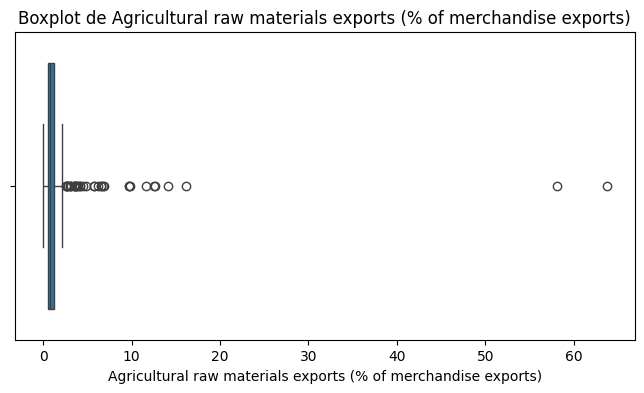

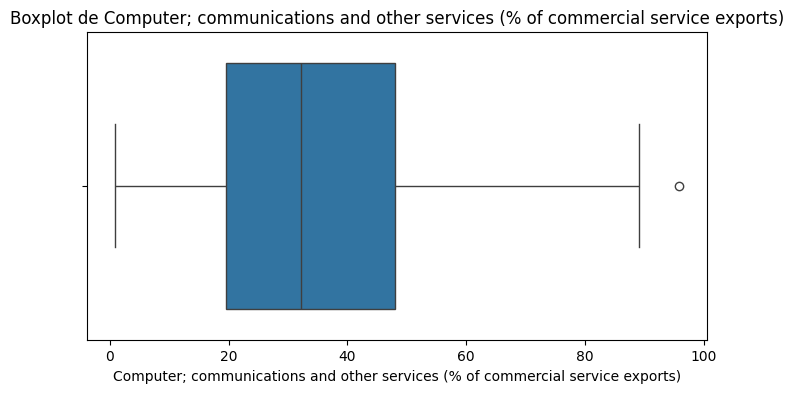

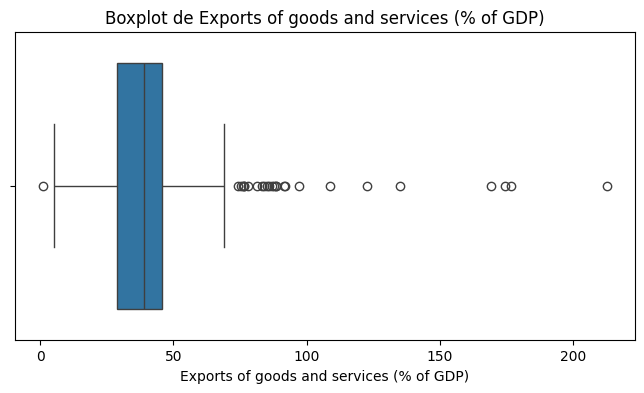

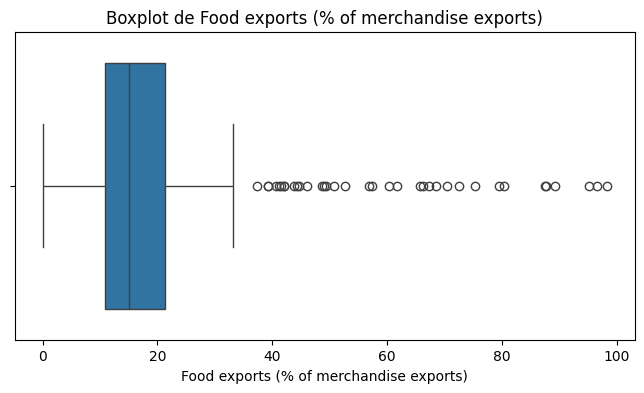

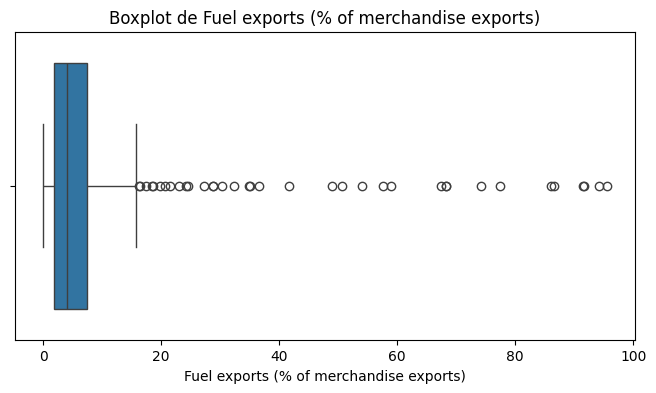

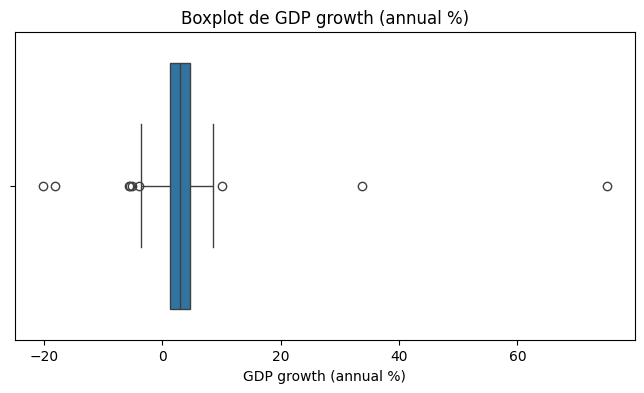

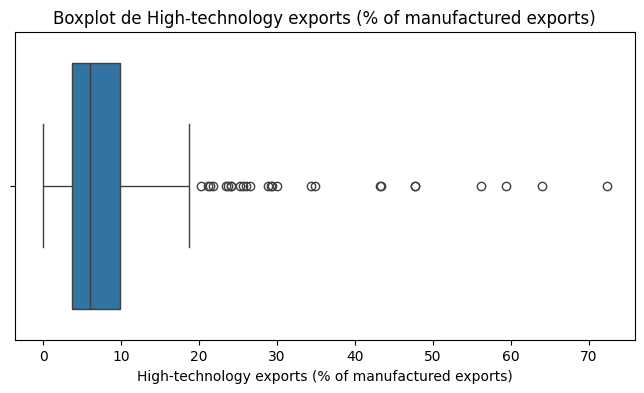

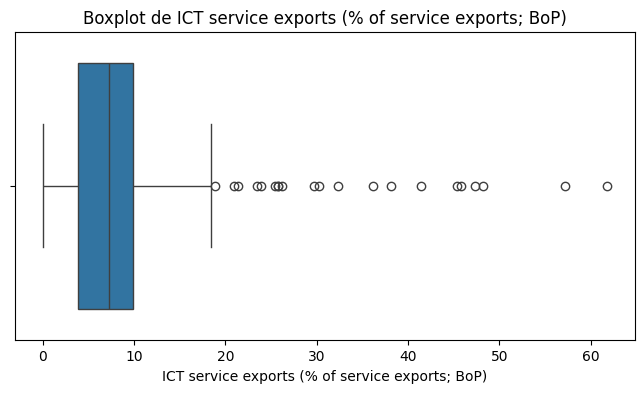

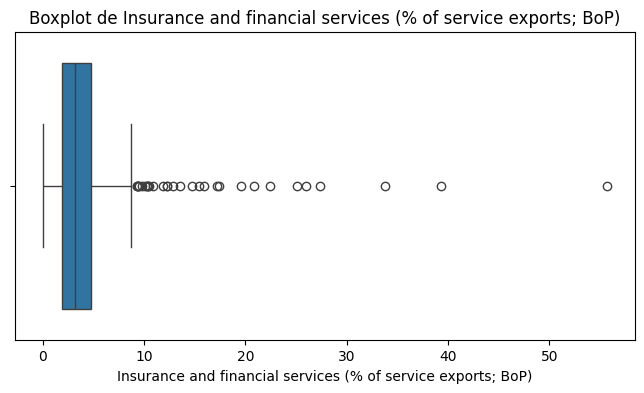

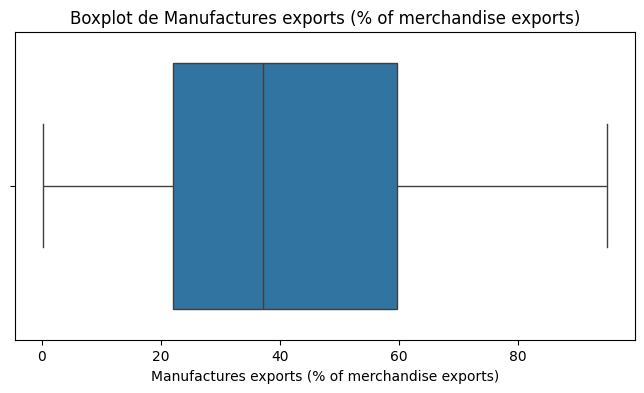

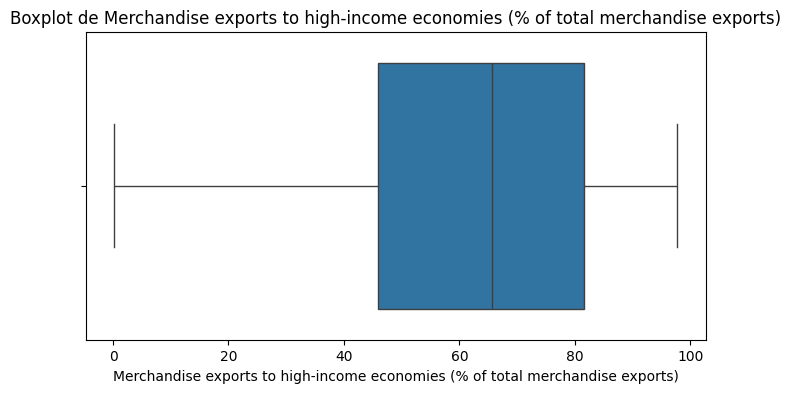

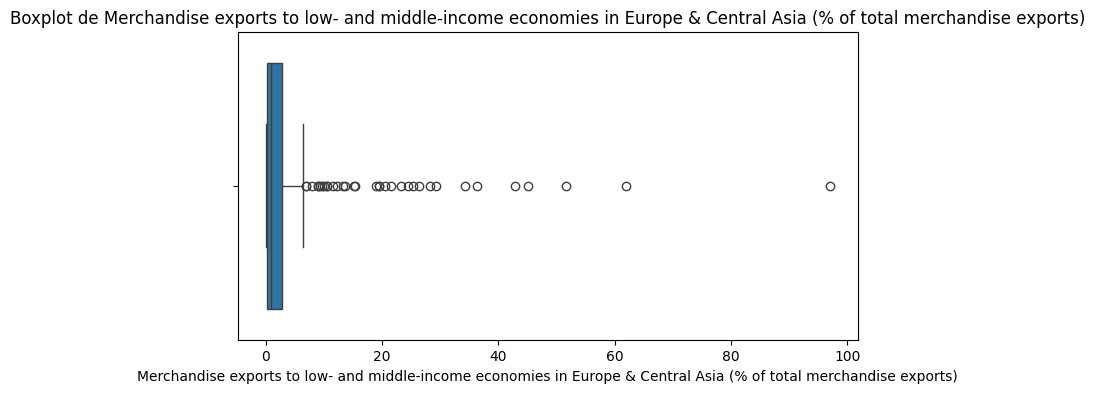

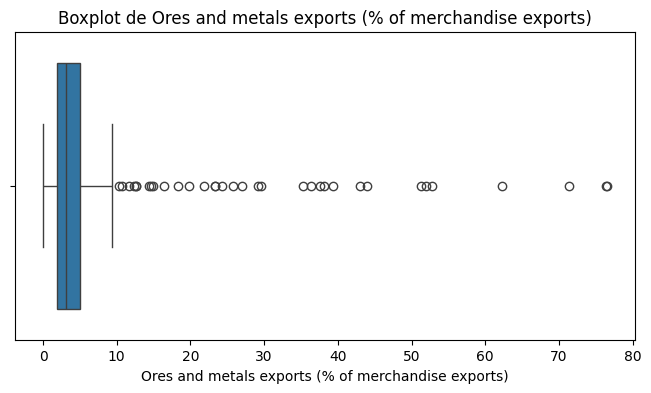

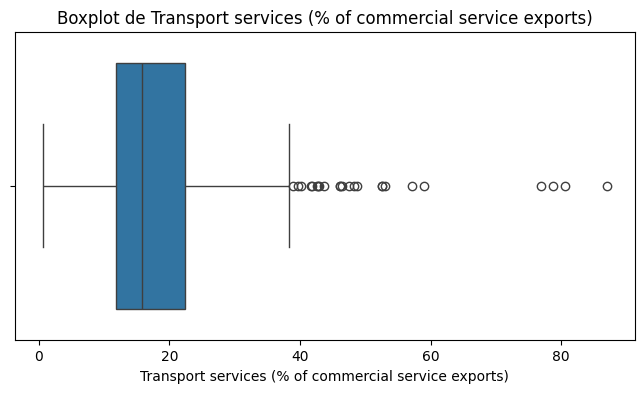

In [1275]:
df_numeric = df.select_dtypes(include=np.number)
for col in df_numeric.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_numeric[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.show()

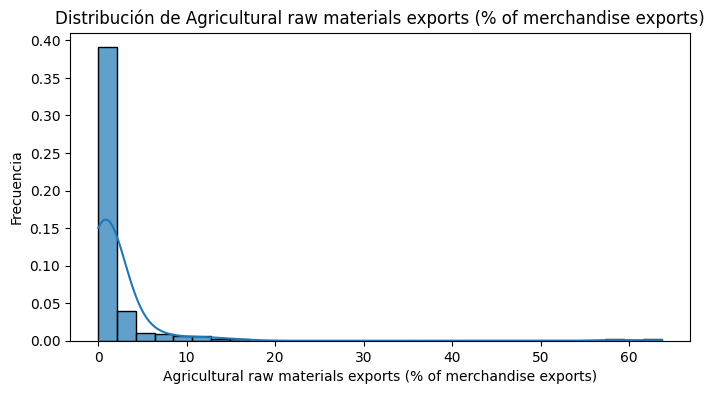

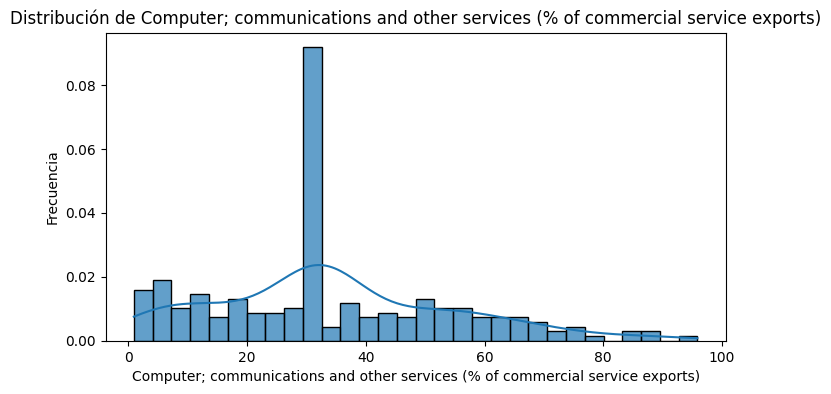

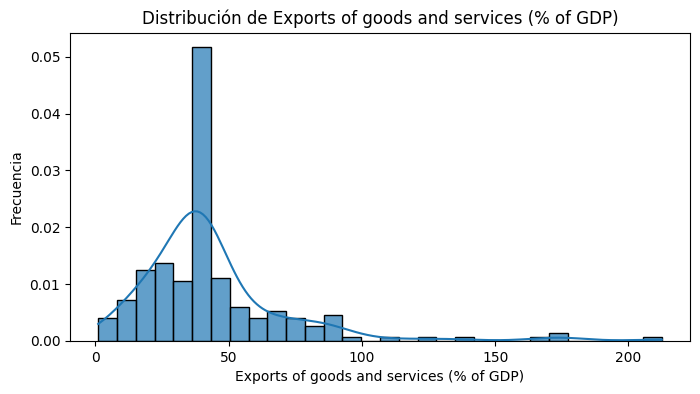

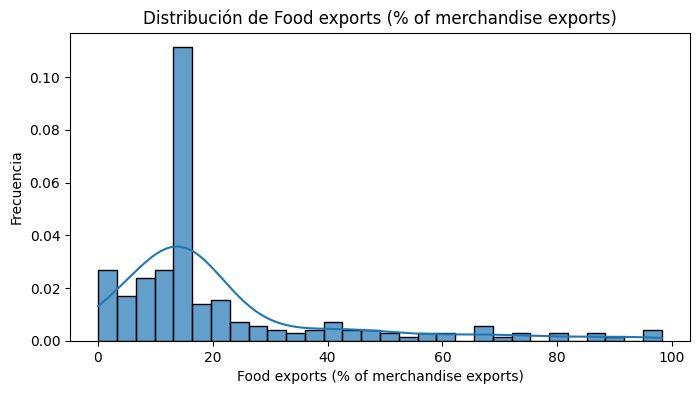

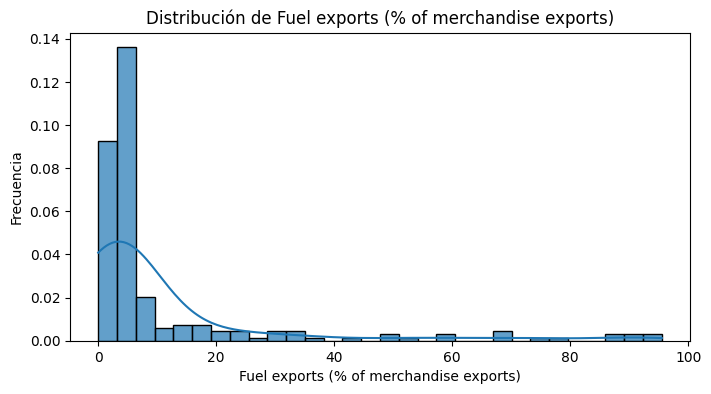

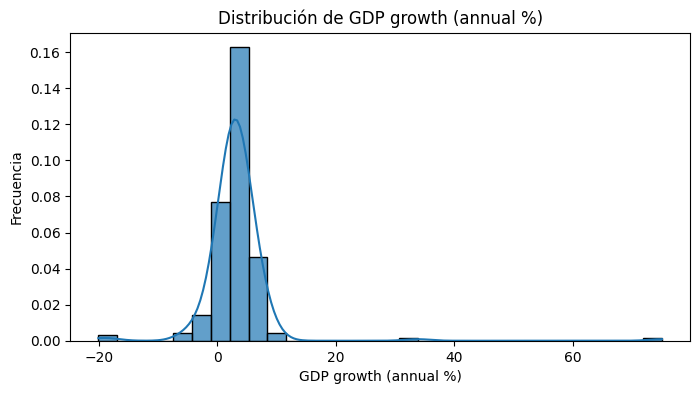

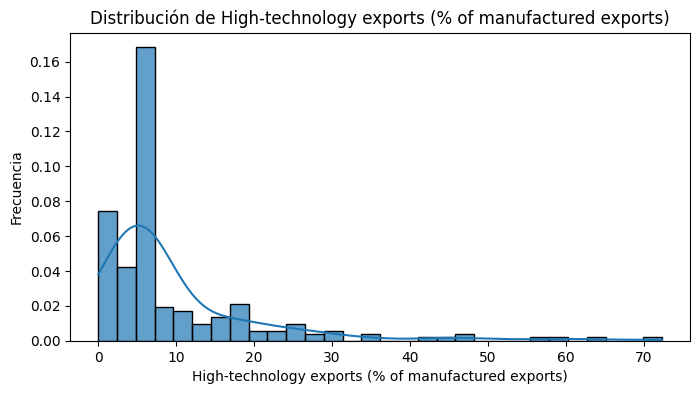

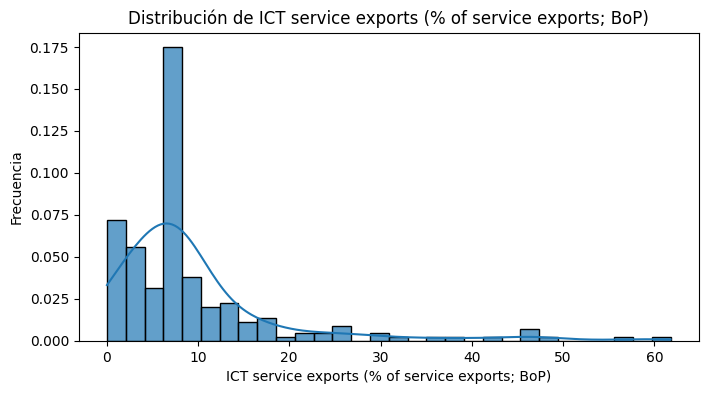

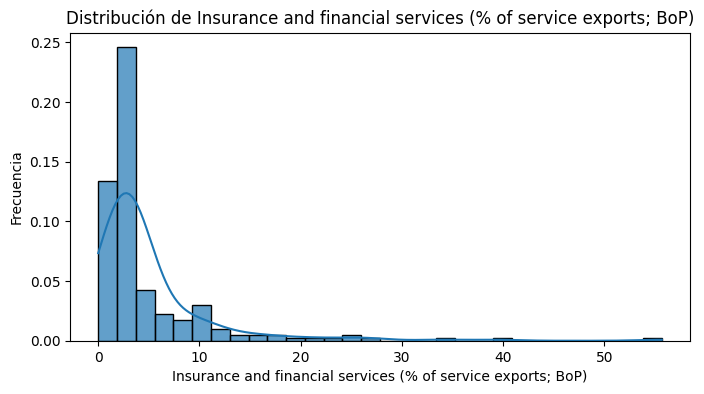

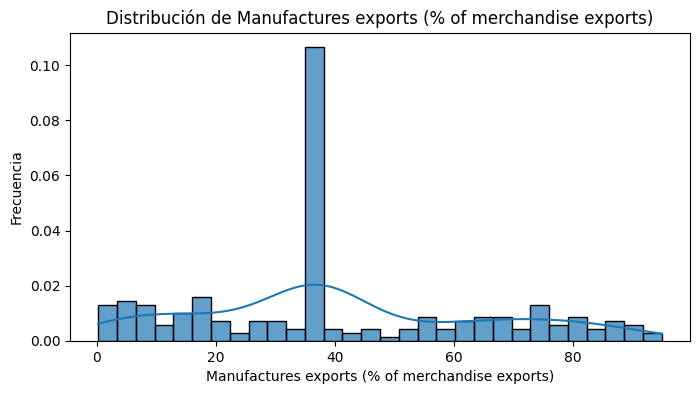

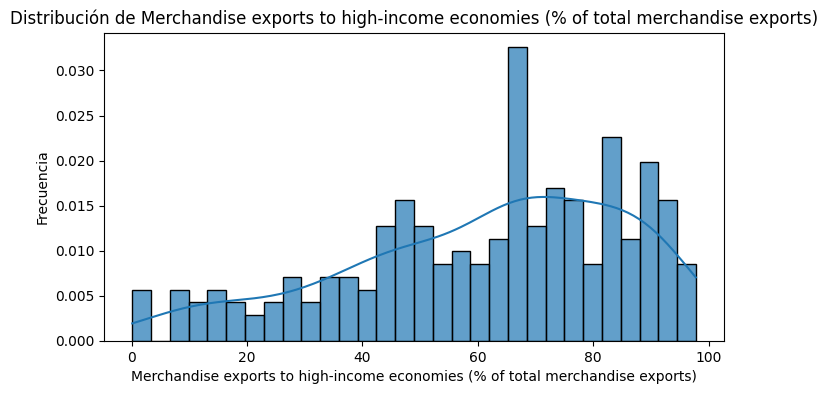

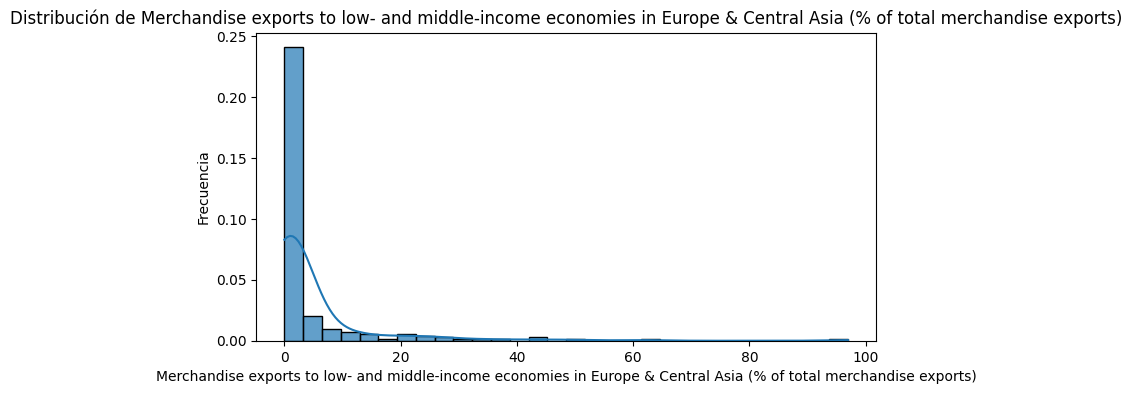

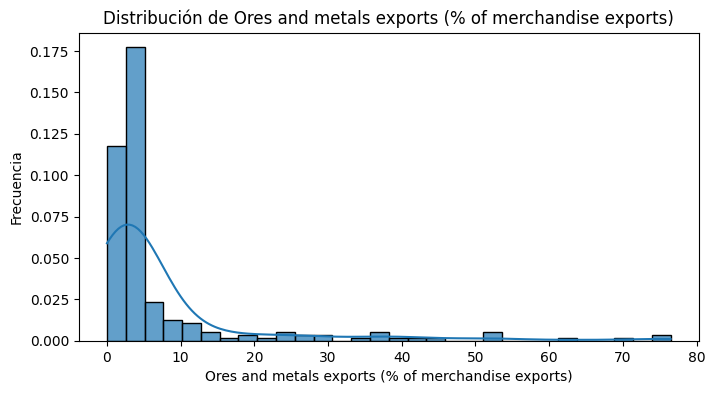

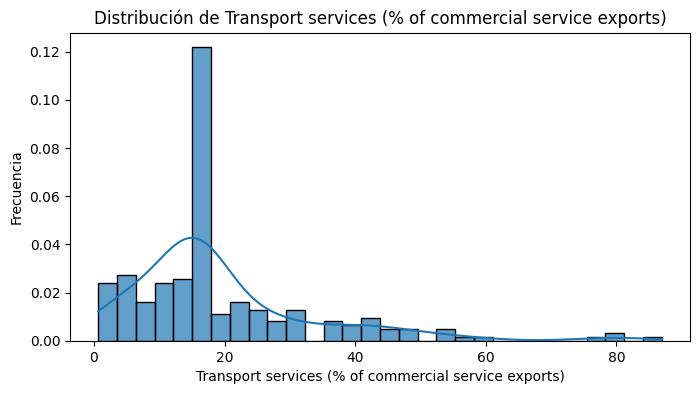

In [1276]:
for col in df_numeric.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_numeric[col].dropna(), bins=30, stat='density', alpha=0.7,
                 kde= 'True')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

In [1277]:
for col in df.columns:
    if col != 'Country Name':
        x = df[col]
        df[f'log {col}'] = np.where(x > 0, np.log(x), 0)

df = df.loc[:, (df.columns == 'Country Name') | df.columns.str.startswith('log ')]

/Users/catamege/Desktop/Uni/9vo semestre/Machine learning/Tarea2-Mege-Lantadilla/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/catamege/Desktop/Uni/9vo semestre/Machine learning/Tarea2-Mege-Lantadilla/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/catamege/Desktop/Uni/9vo semestre/Machine learning/Tarea2-Mege-Lantadilla/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/catamege/Desktop/Uni/9vo semestre/Machine learning/Tarea2-Mege-Lantadilla/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/User

In [1278]:
df.head()

Series Name    Country Name  \
0               Afghanistan   
1                   Albania   
2                   Algeria   
3            American Samoa   
4                   Andorra   

Series Name  log Agricultural raw materials exports (% of merchandise exports)  \
0                                                    -0.229459                   
1                                                    -0.901323                   
2                                                    -0.229459                   
3                                                    -0.229459                   
4                                                    -0.878554                   

Series Name  log Computer; communications and other services (% of commercial service exports)  \
0                                                     3.474242                                   
1                                                     3.195816                                   
2                                                     4.080290                                   
3                                                     3.474242                                   
4                                                     2.555768                                   

Series Name  log Exports of goods and services (% of GDP)  \
0                                                2.819898   
1                                                3.654937   
2                                                3.162074   
3                                                3.658172   
4                                                3.658172   

Series Name  log Food exports (% of merchandise exports)  \
0                                               2.711811   
1                                               2.481909   
2                                               2.711811   
3                                               2.711811   
4                                               0.086053   

Series Name  log Fuel exports (% of merchandise exports)  \
0                                               1.410457   
1                                               1.847728   
2                                               1.410457   
3                                               1.410457   
4                                              -4.590518   

Series Name  log GDP growth (annual %)  \
0                             0.997276   
1                             1.370324   
2                             1.410987   
3                             1.085251   
4                             0.949166   

Series Name  log High-technology exports (% of manufactured exports)  \
0                                                     1.796901         
1                                                    -0.382246         
2                                                     1.796901         
3                                                     1.796901         
4                                                     3.065008         

Series Name  log ICT service exports (% of service exports; BoP)  \
0                                                     1.985818     
1                                                     1.103260     
2                                                     0.794401     
3                                                     1.985818     
4                                                     1.469929     

Series Name  log Insurance and financial services (% of service exports; BoP)  \
0                                                     1.164202                  
1                                                    -0.411727                  
2                                                     2.330499                  
3                                                     1.164202                  
4                                                     1.315937                  

Series Name  log Manufactures exports (% of merchandise expo

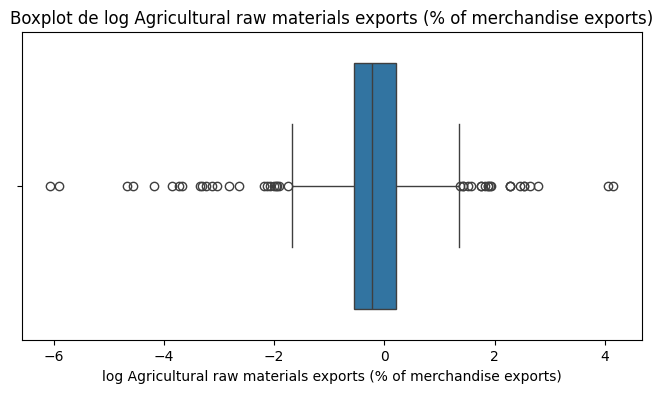

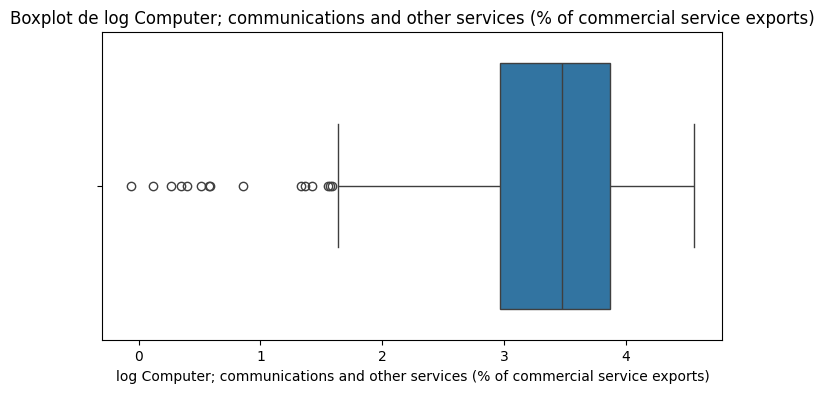

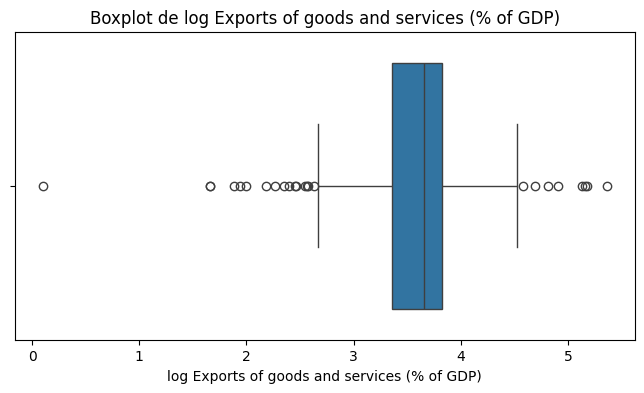

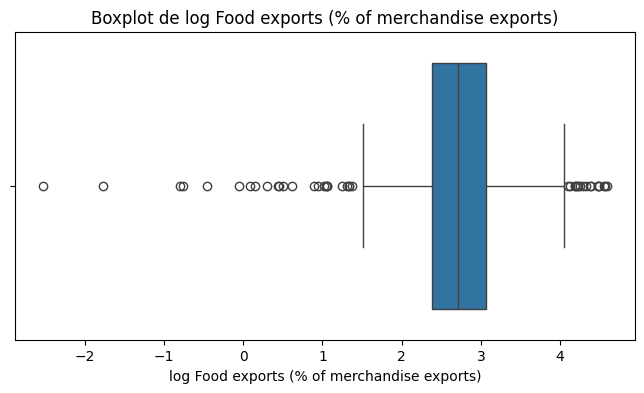

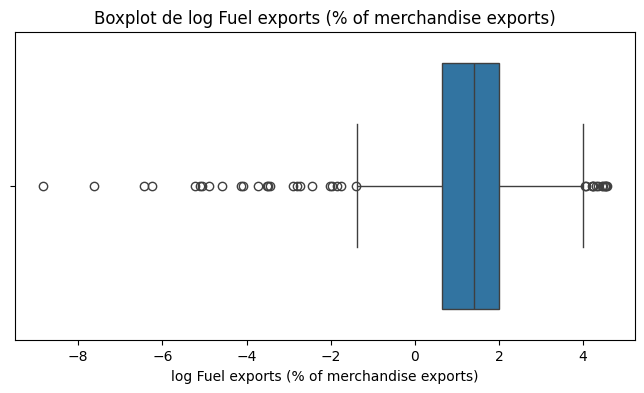

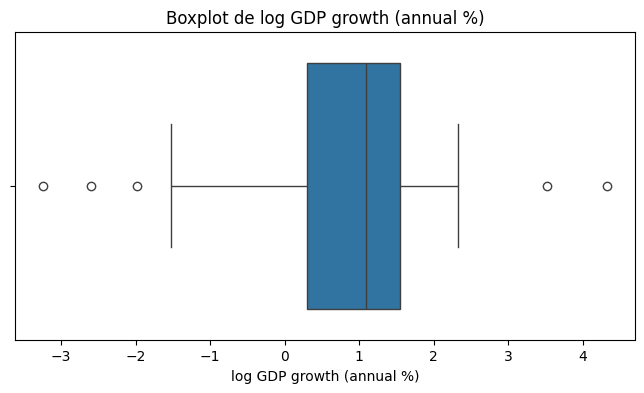

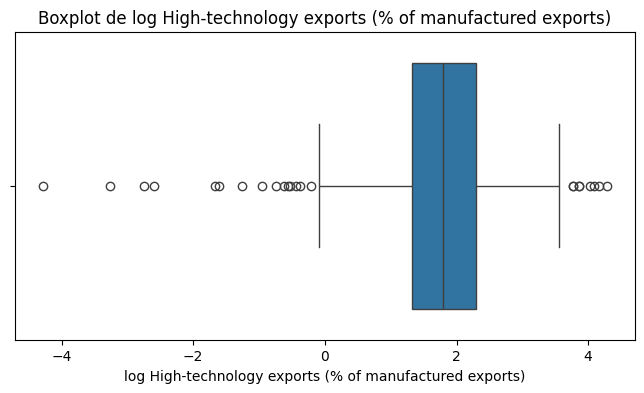

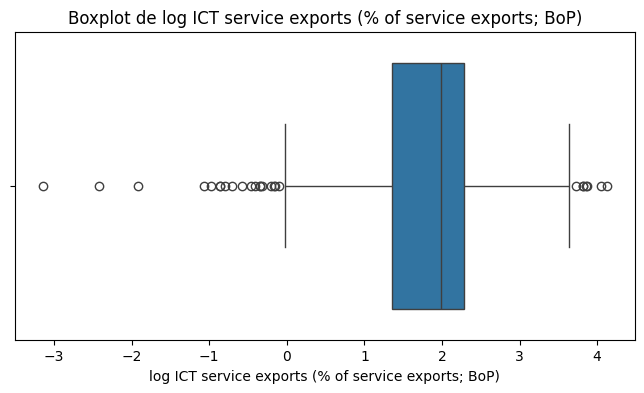

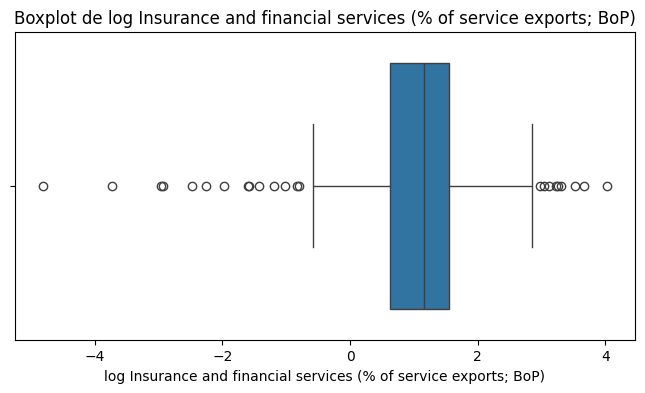

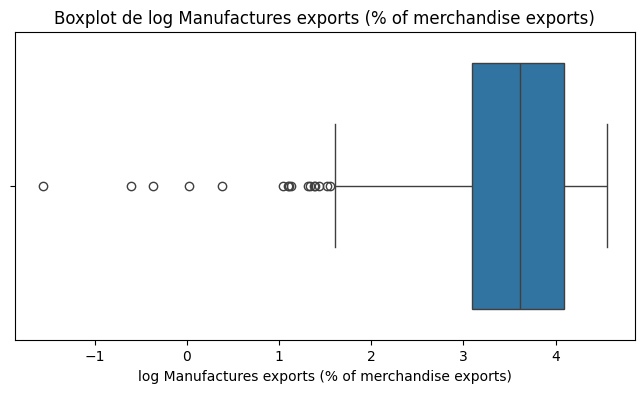

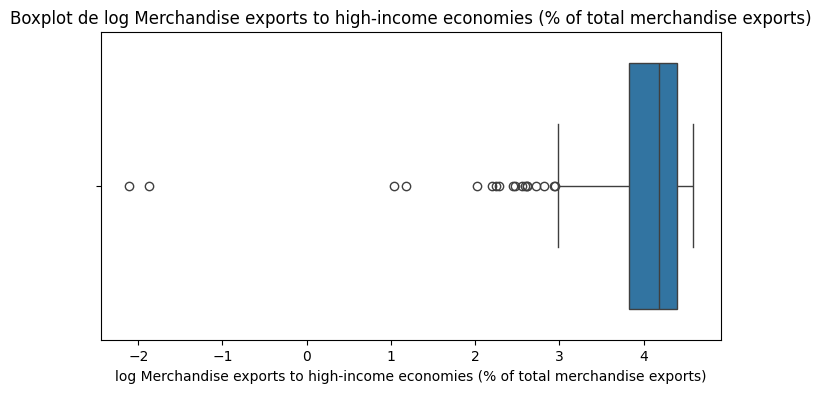

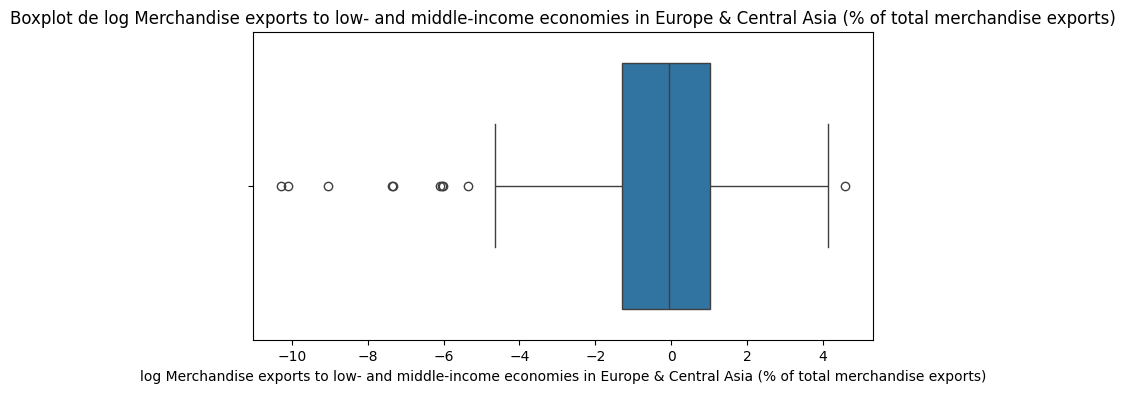

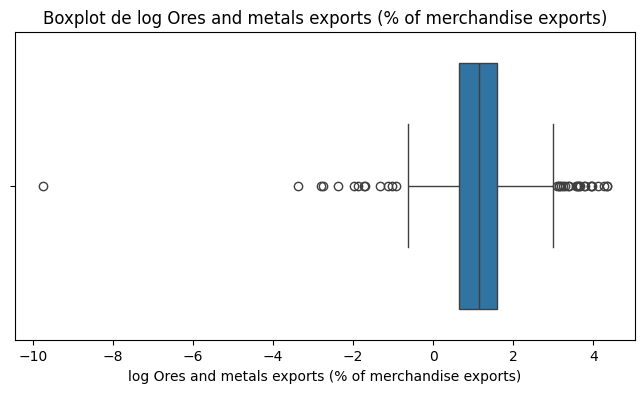

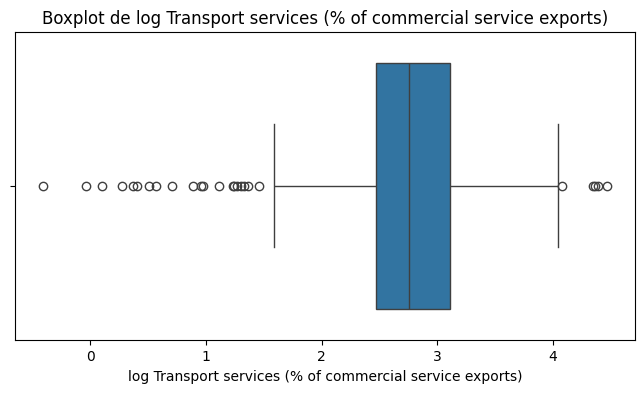

In [1279]:
df_numeric = df.select_dtypes(include=np.number)
for col in df_numeric.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_numeric[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.show()

In [1280]:
for col in df_numeric.columns:
    Q1 = df_numeric[col].quantile(0.25)
    Q3 = df_numeric[col].quantile(0.75)
    IQR = Q3 - Q1

    upper_fence = Q3 + 1.5 * IQR
    lower_fence = Q1 - 1.5*IQR

    df_numeric[col] = np.where(df_numeric[col] > upper_fence, upper_fence, df_numeric[col])  # noqa: E501
    df_numeric[col] = np.where( df_numeric[col] < lower_fence, lower_fence, df_numeric[col]) # noqa: E501

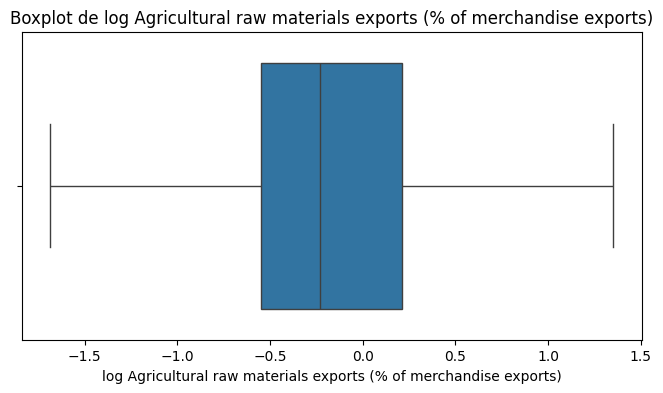

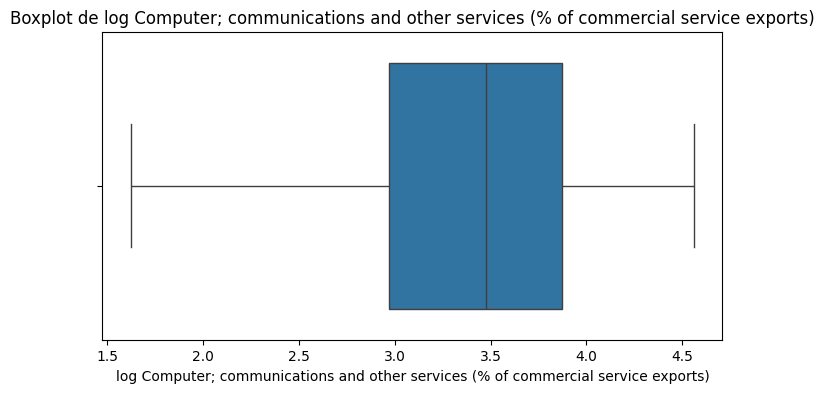

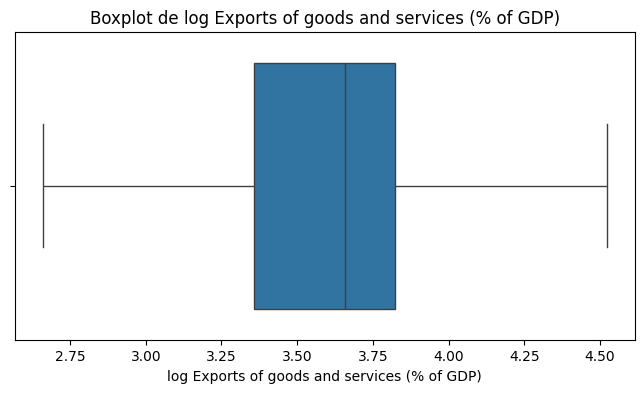

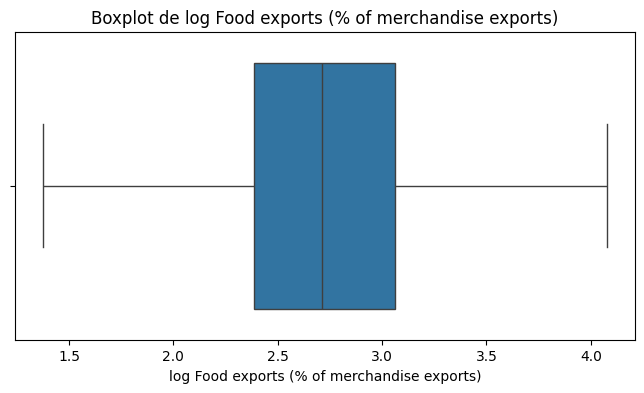

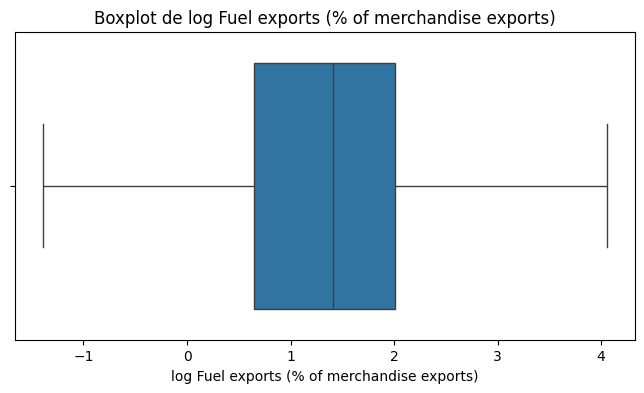

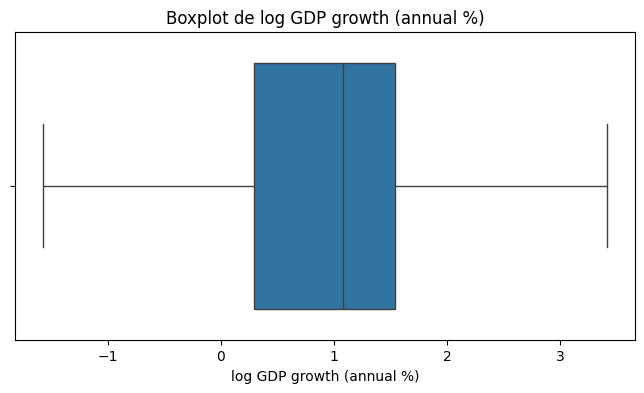

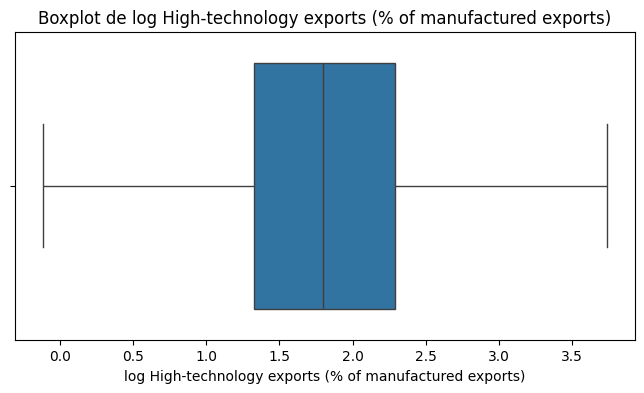

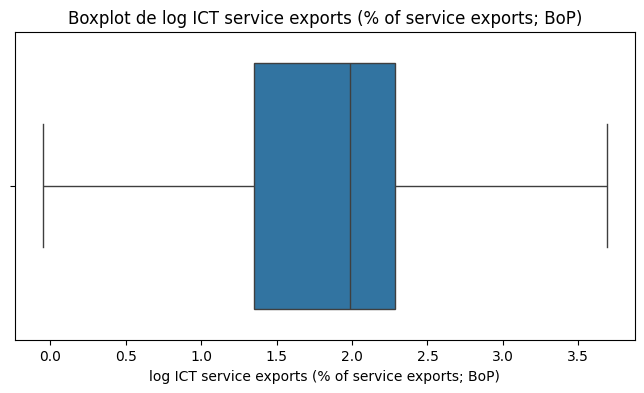

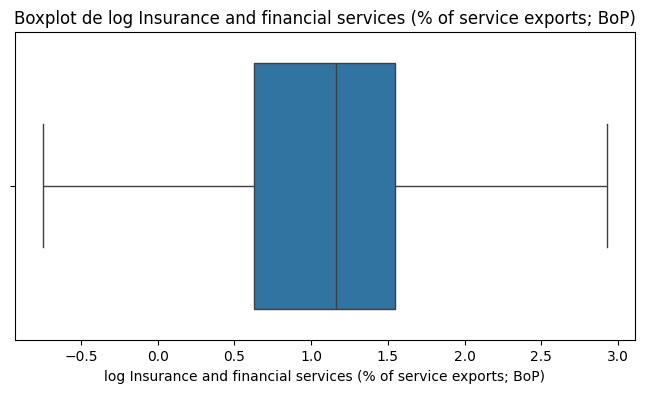

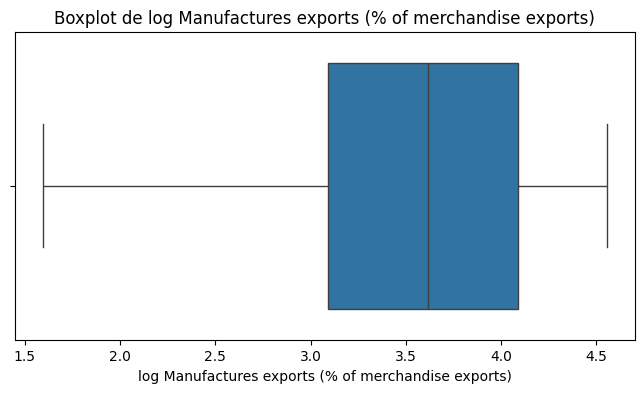

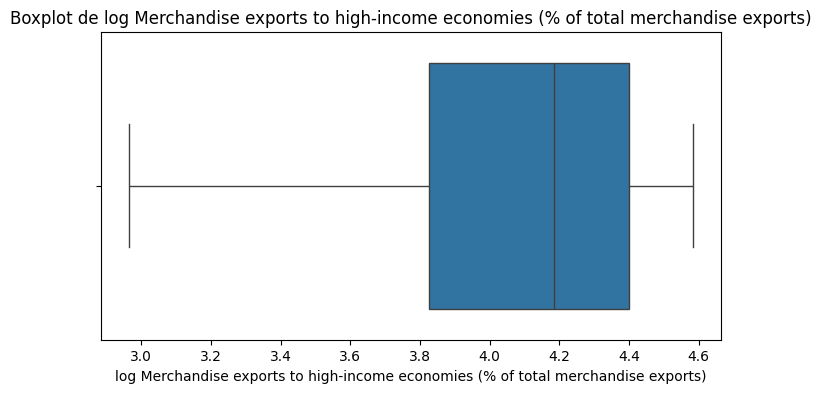

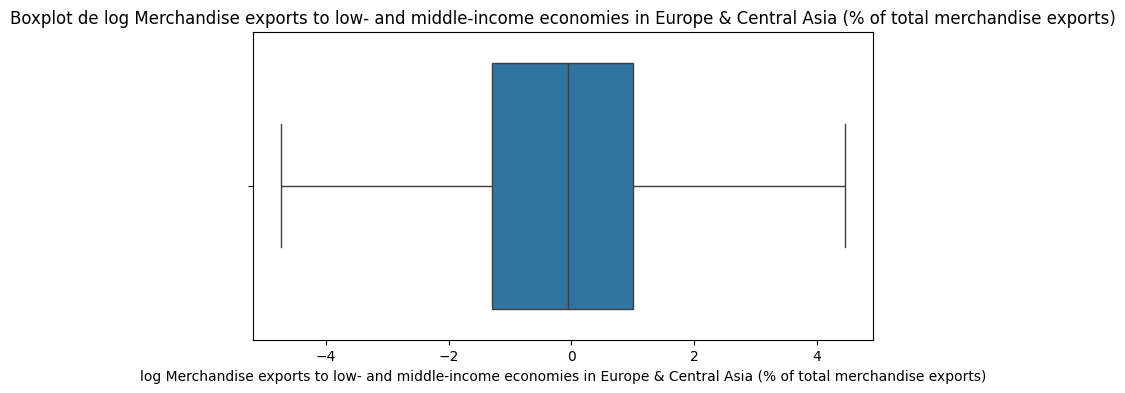

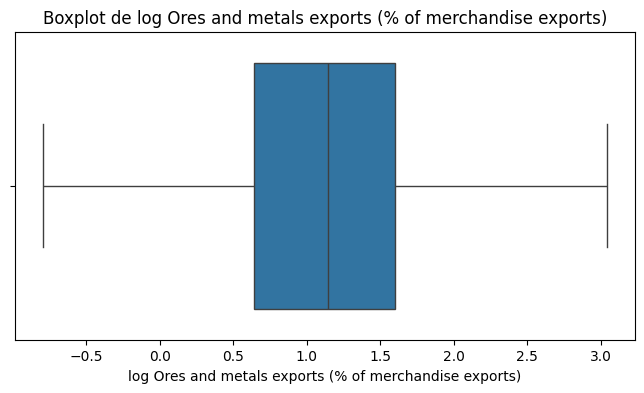

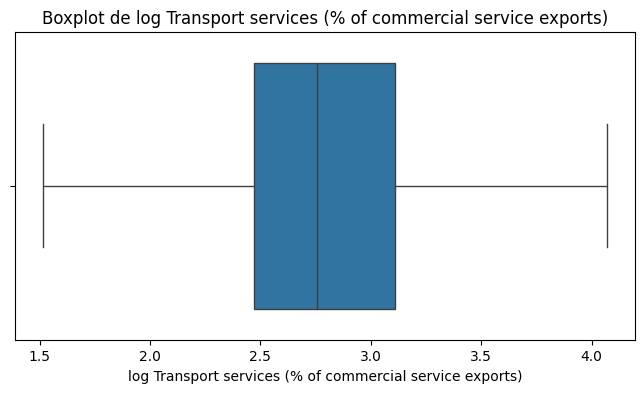

In [1281]:
for col in df_numeric.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_numeric[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.show()




---


A partir de las distribuciones y boxplots, notamos que todas las variables presentan outliers, excepto "Merchandise exports to high-income economies" y "Manufactures exports".

"GDP growth" y "Computer: comunication and services" tienen pocos outliers, mientrás que las demás tienen bastantes, concentrandose principalmente en valores extremos altos y dispersos entre si.

Decidimos mantener estos valores ya que eliminarlos o reemplazarlos distorsiona la verdadera estructura económica de los países, haciendo que países muy distintos parezcan similares y que al hacer clusterización puedan quedar agrupados en el mismo cluster incorrectamente. Para que no haya problemas con el clustering dado a los outliers se transforma con logaritmos. Asi la distorsion se relaja, luego se aplica Winsorización de 1.5IQR para mantener dispersion de datos pero sin valores atipicos

---


## Feature Engineering


### Pregunta 2.6

Realice _feature engineering_ de las variables numéricas (para luego entrenar un modelo _K-Means_ con estas). Realice los ajustes que estime conveniente, pero su tratamiento debe incluir por lo menos estandarización de las variables.

Más adelante se le pedirá comentar sobre los resultados de sus modelos, por lo que considere que sus decisiones podrían condicionar futuras preguntas.



In [1282]:
numeric_cols = df.select_dtypes(include=np.number).columns
X = df[numeric_cols]

In [1283]:
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(X)
df_scaled = df_scaled.select_dtypes(include=np.number)

df_scaled.head()

Series Name  log Agricultural raw materials exports (% of merchandise exports)  \
0                                                     0.018532                   
1                                                    -0.450524                   
2                                                     0.018532                   
3                                                     0.018532                   
4                                                    -0.434628                   

Series Name  log Computer; communications and other services (% of commercial service exports)  \
0                                                     0.238645                                   
1                                                    -0.068356                                   
2                                                     0.906894                                   
3                                                     0.238645                                   
4                                                    -0.774094                                   

Series Name  log Exports of goods and services (% of GDP)  \
0                                               -1.224924   
1                                                0.092096   
2                                               -0.685245   
3                                                0.097198   
4                                                0.097198   

Series Name  log Food exports (% of merchandise exports)  \
0                                               0.072145   
1                                              -0.144008   
2                                               0.072145   
3                                               0.072145   
4                                              -2.396585   

Series Name  log Fuel exports (% of merchandise exports)  \
0                                               0.159200   
1                                               0.357046   
2                                               0.159200   
3                                               0.159200   
4                                              -2.555984   

Series Name  log GDP growth (annual %)  \
0                             0.079841   
1                             0.492454   
2                             0.537429   
3                             0.177146   
4                             0.026629   

Series Name  log High-technology exports (% of manufactured exports)  \
0                                                     0.082898         
1                                                    -1.661904         
2                                                     0.082898         
3                                                     0.082898         
4                                                     1.098246         

Series Name  log ICT service exports (% of service exports; BoP)  \
0                                                     0.194095     
1                                                    -0.596823     
2                                                    -0.873612     
3                                                     0.194095     
4                                                    -0.268227     

Series Name  log Insurance and financial services (% of service exports; BoP)  \
0                                                     0.097120                  
1                                                    -1.224710                  
2                                                     1.075368                  
3                                                     0.097120                  
4                                                     0.224390                  

Series Name  log Manufactures exports (% of merchandise exports)  \
0                                                     0.222813     
1                                                     0.644118     
2                                          

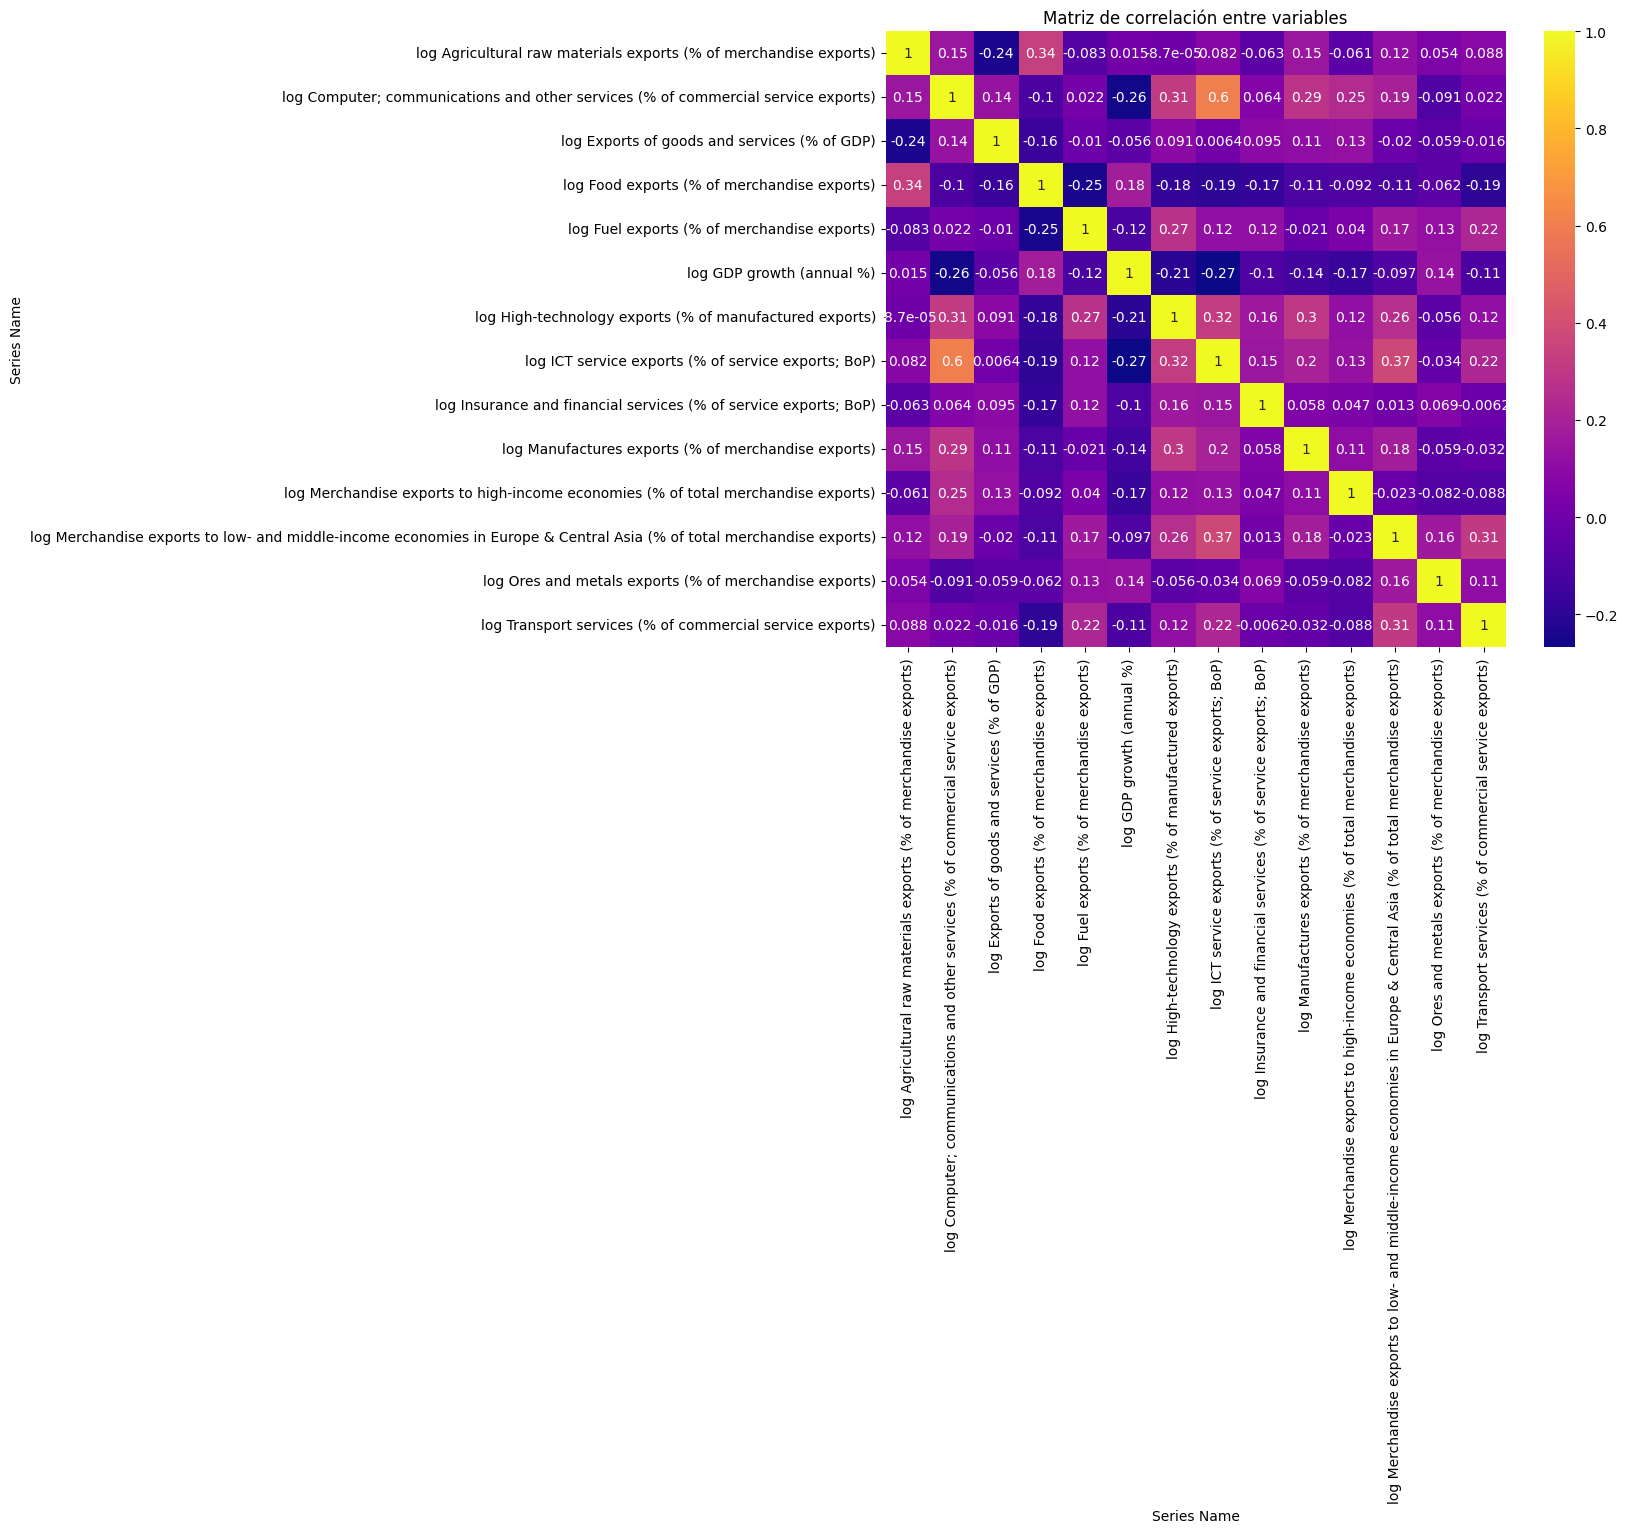

In [1284]:
# observamos si hay variables que correlacionan entre si
corr = df_scaled.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='plasma')
plt.title('Matriz de correlación entre variables')
plt.show()

Puede haber multicolinealidad por la correlacion de 0.6

## K-Means

### Pregunta 2.7

Considerando el dataframe completo (todas sus columnas atributos), determine el número óptimo de clusters mediante el "Elbow method". Considere un rango $k \in [1, 30]$. Describa el comportamiento observado de la curva.



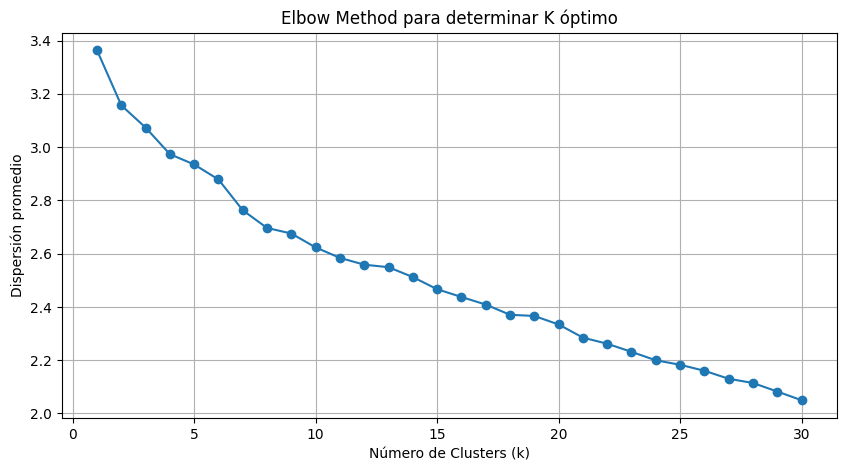

In [1285]:
dispersion = []
K_range = range(1, 31)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=123)
    model.fit(df_scaled)
    dist_ecl = cdist(df_scaled, model.cluster_centers_, 'euclidean')
    min_dist = np.min(dist_ecl, axis=1)
    average_dis = sum(min_dist) / len(df_scaled)
    dispersion.append(average_dis)

plt.figure(figsize=(10, 5))
plt.plot(K_range, dispersion, marker='o')
plt.title('Elbow Method para determinar K óptimo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Dispersión promedio')
plt.grid(True)
plt.show()




---


Desde k=7 la pendiente es menos dramática, es decir el cluster adicional no añade mucha dispersión nueva


---


### Pregunta 2.8

Un problema habitual del modelo _K-Means_ es que pierde desempeño a mayor dimensionalidad.

En esta pregunta defina **por lo menos 5 combinaciones de columnas** (mínimo 2 columnas y máximo 4). Para cada combinación determine el número óptimo de clusters mediante el "Elbow method" considerando $k \in [1, 30]$.

Un posible enfoque para lo anterior es tomar un _approach_ estadístico y escoger variables que empíricamente muestran mayores indicios de poder diferenciador entre las observaciones. De todas formas, recuerde que la pregunta de interés es "¿qué países se verán expuestos de forma similar a la guerra comercial?". En este sentido, es altamente recomendable escoger variables con una mayor relación al fenómeno de la guerra comercial, ya que puede ser útil para discernir de qué forma podría verse expuesto cada grupo.


In [1286]:
combinations = {
    "Comb_1_Trade_Dependency": [
        "log Exports of goods and services (% of GDP)",
        "log Merchandise exports to high-income economies (% of total merchandise exports)", # noqa: E501
        "log Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)"  # noqa: E501
    ],
    "Comb_2_Tarifs_on_Commodities": [
        "log Agricultural raw materials exports (% of merchandise exports)",
        "log Fuel exports (% of merchandise exports)",
        "log Food exports (% of merchandise exports)",
        "log Ores and metals exports (% of merchandise exports)"
    ],
    "Comb_3_Tarifs_on_Technology": [
        "log High-technology exports (% of manufactured exports)",
        "log ICT service exports (% of service exports; BoP)",
        "log Computer; communications and other services (% of commercial service exports)"
    ],
    "Comb_4_General_Trade_Composition": [
        "log Transport services (% of commercial service exports)",
        "log Insurance and financial services (% of service exports; BoP)"
    ],
    "Comb_5_Country_Vulnerability": [
        "log Exports of goods and services (% of GDP)",
        "log GDP growth (annual %)"
    ]
}

1. Comb_1_Trade_Dependency: dependencia general de un país del comercio exterior. Evalúa qué tan grande es la proporción de las exportaciones en su economía y hacia qué tipo de economías van sus productos
2. Comb_2_Tariffs_on_Commodities: tarifas a productos básicos y materias primas de un país, frecuentemente los commodities son los primeros y más directos objetivos de los aranceles en una guerra comercial.
3. Comb_3_Tariffs_on_Technology: tarifas a bienes de alta tecnología y servicios digitales, generalmente sus aranceles son de gran valor..
4. Comb_4_General_Trade_Composition: servicios clave que facilitan el comercio internacional. Si una guerra comercial lleva a interrupciones en las cadenas de suministro, aumento de costos de envío o seguros, o restricciones en los servicios financieros, los países que dependen de la exportación/importación de estos servicios se verán afectados.
5. Comb_5_Country_Vulnerability: Vulnerabilidad macroeconómica de un país ante shocks externos. 


--- Analizando la combinación: Comb_1_Trade_Dependency ---
Columnas: ['log Exports of goods and services (% of GDP)', 'log Merchandise exports to high-income economies (% of total merchandise exports)', 'log Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)']


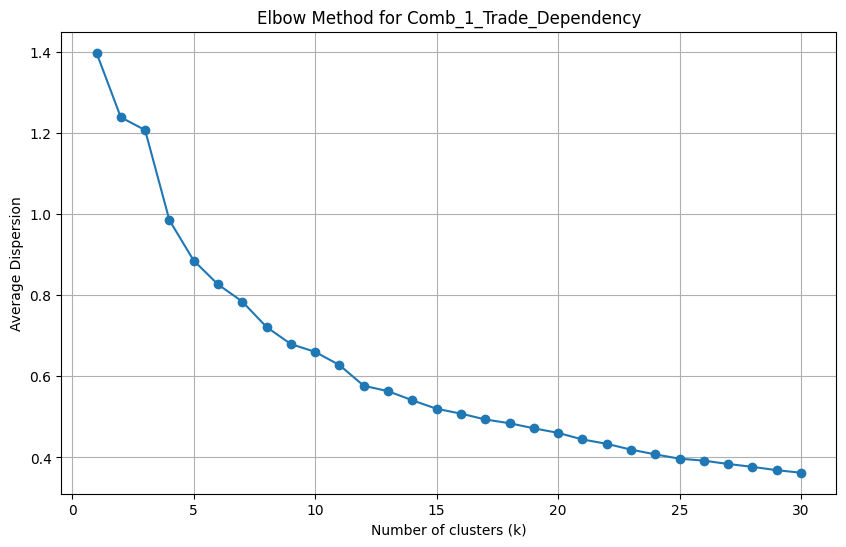


--- Analizando la combinación: Comb_2_Tarifs_on_Commodities ---
Columnas: ['log Agricultural raw materials exports (% of merchandise exports)', 'log Fuel exports (% of merchandise exports)', 'log Food exports (% of merchandise exports)', 'log Ores and metals exports (% of merchandise exports)']


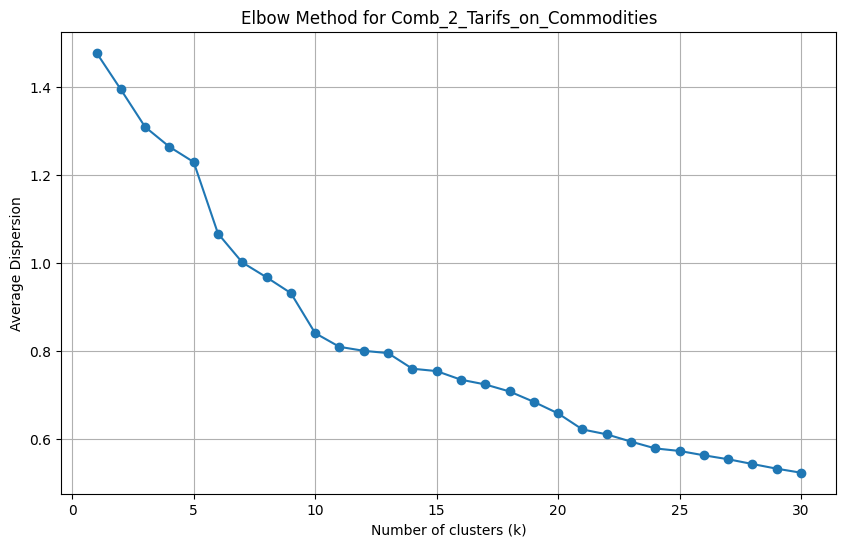


--- Analizando la combinación: Comb_3_Tarifs_on_Technology ---
Columnas: ['log High-technology exports (% of manufactured exports)', 'log ICT service exports (% of service exports; BoP)', 'log Computer; communications and other services (% of commercial service exports)']


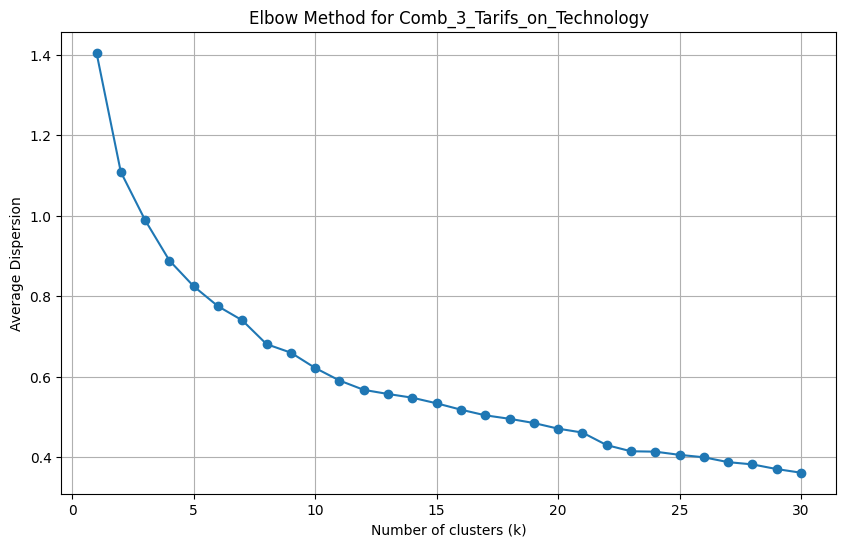


--- Analizando la combinación: Comb_4_General_Trade_Composition ---
Columnas: ['log Transport services (% of commercial service exports)', 'log Insurance and financial services (% of service exports; BoP)']


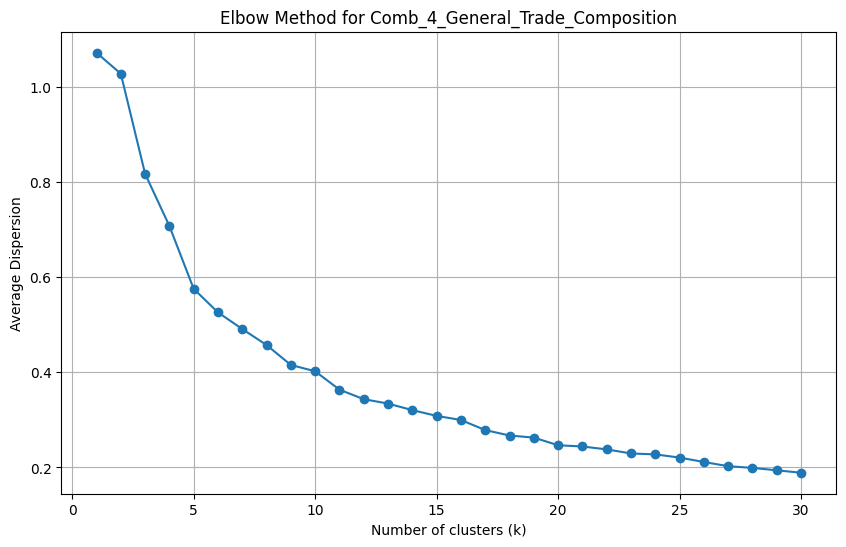


--- Analizando la combinación: Comb_5_Country_Vulnerability ---
Columnas: ['log Exports of goods and services (% of GDP)', 'log GDP growth (annual %)']


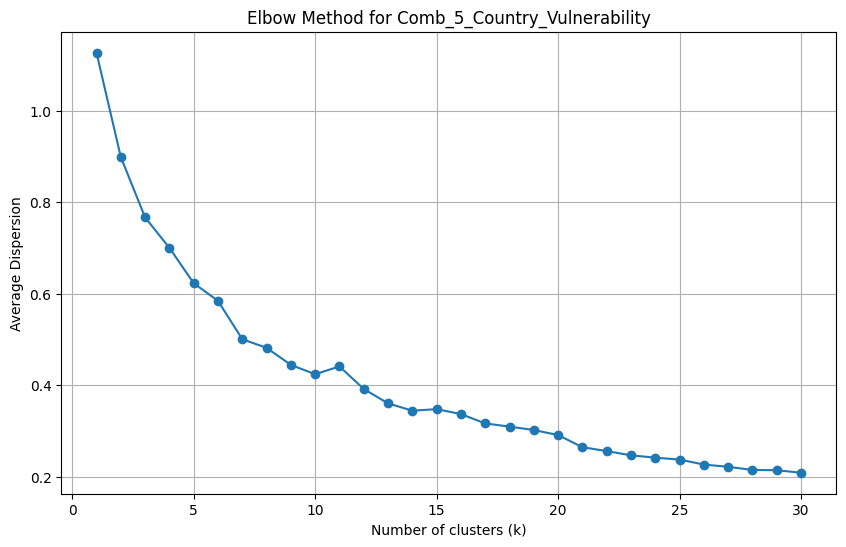

In [1287]:
results_elbow = {}

for name, cols in combinations.items():
    print(f"\n--- Analizando la combinación: {name} ---")
    print(f"Columnas: {cols}")
    current_df_subset = df_scaled[cols].copy()

    dispersion = []
    K_range = range(1, 31)

    for k in K_range:
        model = KMeans(n_clusters=k, random_state=123)
        model.fit(current_df_subset)
        dist_ecl = cdist(current_df_subset, model.cluster_centers_, 'euclidean')
        min_dist = np.min(dist_ecl, axis=1)
        average_dis = sum(min_dist) / len(df_scaled)
        dispersion.append(average_dis)

    results_elbow[name] = dispersion

    plt.figure(figsize=(10, 6))
    plt.plot(K_range, dispersion, marker='o')
    plt.title(f'Elbow Method for {name}')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Average Dispersion')
    plt.grid(True)
    plt.show()
    plt.show()


---


1. Comb_1_Trade_Dependency: k=5
2. Comb_2_Tariffs_on_Commodities: k=7
3. Comb_3_Tariffs_on_Technology: k=5
4. Comb_4_General_Trade_Composition: k=5
5. Comb_5_Country_Vulnerability: k=5


---

### Pregunta 2.9

Escoja la combinación de columnas que considera adecuada emplear, refiriéndose tanto al comportamiento observado de la curva, como al nivel de la métrica empleada al que se alcanza la convergencia.

Estime el modelo con $k$ óptimo y las columnas escogidas. Visualice los grupos graficando _scatterplots_. Considere gráficos en 3 dimensiones si su modelo posee 3 o más variables.

Describa en qué se diferencian los grupos encontrados y de qué manera le podría afectar la guerra comercial a cada uno. Liste una pequeña muestra representativa de los países que contiene cada grupo.


In [1288]:
chosen_combination_name = "Comb_5_Country_Vulnerability"
chosen_columns = [
    "log Exports of goods and services (% of GDP)",
    "log GDP growth (annual %)"
]
optimal_k = 5

df_kmeans = df_scaled[chosen_columns]

kmeans_model = KMeans(n_clusters=optimal_k, random_state=123)
cluster_labels = kmeans_model.fit_predict(df_kmeans)

df_results = df.loc[df_kmeans.index].copy()
df_results['Cluster'] = cluster_labels

df_results.head(50)

Series Name              Country Name  \
0                         Afghanistan   
1                             Albania   
2                             Algeria   
3                      American Samoa   
4                             Andorra   
5                              Angola   
6                 Antigua and Barbuda   
7                           Argentina   
8                             Armenia   
9                               Aruba   
10                          Australia   
11                            Austria   
12                         Azerbaijan   
13                            Bahamas   
14                            Bahrain   
15                         Bangladesh   
16                           Barbados   
17                            Belarus   
18                            Belgium   
19                             Belize   
20                              Benin   
21                            Bermuda   
22                             Bhutan   
23                            Bolivia   
24             Bosnia and Herzegovina   
25                           Botswana   
26                             Brazil   
27             British Virgin Islands   
28                  Brunei Darussalam   
29                           Bulgaria   
30                       Burkina Faso   
31                            Burundi   
32                         Cabo Verde   
33                           Cambodia   
34                           Cameroon   
35                             Canada   
36                     Cayman Islands   
37           Central African Republic   
38                               Chad   
39                    Channel Islands   
40                              Chile   
41                              China   
42                           Colombia   
43                            Comoros   
44                    Congo Dem. Rep.   
45                         Congo Rep.   
46                         Costa Rica   
47                      Cote d'Ivoire   
48                            Croatia   
49                               Cuba   

Series Name  log Agricultural raw materials exports (% of merchandise exports)  \
0                                                    -0.229459                   
1                                                    -0.901323                   
2                                                    -0.229459                   
3                                                    -0.229459                   
4                                                    -0.878554                   
5                                                    -5.896854                   
6                                                     0.000000                   
7                                                    -0.377266                   
8                                                    -1.033683                   
9                                                    -2.138383                   
10                                                    0.580677                   
11                                                    0.266680                   
12                                                   -0.922239                   
13                                                   -0.077436                   
14                                                   -2.072579                   
15                                                   -0.229459                   
16                                                   -3.032907                   
17                                                   -0.229459                   
18                                                    0.128130                   
19                                                   -0.051893                   
20                                                    4.062862                   
21                                                   -6.070077                   
22                    

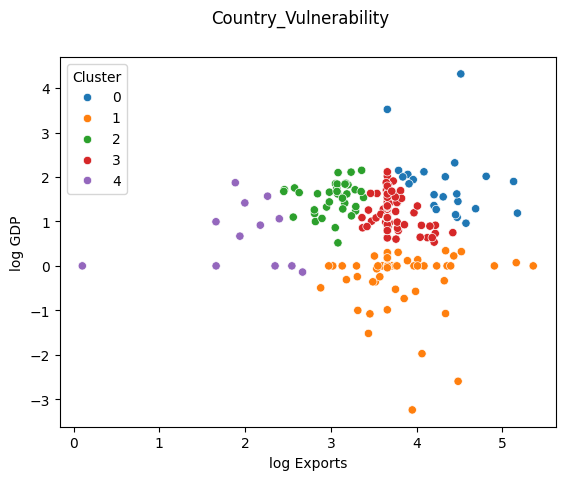

<Figure size 10000x1000 with 0 Axes>

In [1289]:
df_results = df_results.rename(columns = {
    'log Exports of goods and services (% of GDP)': 'log Exports',
    'log GDP growth (annual %)': 'log GDP'})

chosen_combination_name = "Country_Vulnerability"
chosen_columns = ['log Exports', 'log GDP']

graphic = sns.scatterplot(data=df_results, 
                          x='log Exports', 
                          y='log GDP', 
                          hue='Cluster', 
                          palette='tab10')

graphic.figure.suptitle(f'{chosen_combination_name}')

plt.figure(figsize=(100, 10))
plt.show()


- Grupo 0 (Azul Oscuro): Alta Dependencia Comercial, Crecimiento Alto
- Grupo 1 (Naranja): Dependencia Media-Alta Comercial, Crecimiento Bajo
- Grupo 2 (Verde): Baja Dependencia Comercial, Crecimiento Medio-Alto
- Grupo 3 (Rojo): Dependencia Media-Alta Comercial, Crecimiento Medio-Alto
- Grupo 4 (Morado): Baja Dependencia Comercial, Crecimiento Medio-Alto

In [1290]:
df_cluster0 = df_results[df_results['Cluster'] == 0]
df_cluster0.head(10)

Series Name     Country Name  \
8                    Armenia   
9                      Aruba   
14                   Bahrain   
17                   Belarus   
33                  Cambodia   
44           Congo Dem. Rep.   
51                    Cyprus   
54                  Djibouti   
72                   Georgia   
83                    Guyana   

Series Name  log Agricultural raw materials exports (% of merchandise exports)  \
8                                                    -1.033683                   
9                                                    -2.138383                   
14                                                   -2.072579                   
17                                                   -0.229459                   
33                                                    1.011658                   
44                                                   -1.369645                   
51                                                   -0.590433                   
54                                                   -1.669910                   
72                                                   -0.182537                   
83                                                   -1.754903                   

Series Name  log Computer; communications and other services (% of commercial service exports)  \
8                                                     3.243898                                   
9                                                     2.022649                                   
14                                                    3.197447                                   
17                                                    3.474242                                   
33                                                    2.541839                                   
44                                                    2.297456                                   
51                                                    3.773048                                   
54                                                    2.588482                                   
72                                                    2.781614                                   
83                                                    3.143668                                   

Series Name  log Exports  log Food exports (% of merchandise exports)  \
8               4.085171                                     2.576988   
9               4.481236                                     4.209418   
14              4.472372                                     2.120837   
17              4.201988                                     2.711811   
33              4.203089                                     2.784565   
44              3.789765                                    -0.460049   
51              4.574905                                     3.056749   
54              5.130524                                     3.724977   
72              3.897256                                     3.667731   
83              3.658172                                     1.589163   

Series Name  log Fuel exports (% of merchandise exports)   log GDP  \
8                                              -0.096989  2.116256   
9                                              -2.809185  1.450142   
14                                             -1.374640  1.092189   
17                                              1.410457  1.357443   
33                                              1.410457  1.601419   
44                                             -7.628608  2.147201   
51                                              3.891853  0.960078   
54                                             -0.004773  1.898616   
72                                              1.435708  2.058244   
83                                              4.455788  3.520538   

Series Name  log High-technology exports (% of manufactured exports)  \
8                 

In [1291]:
df_cluster1 = df_results[df_results['Cluster'] == 1]
df_cluster1.head(10)

Series Name       Country Name  \
5                       Angola   
11                     Austria   
12                  Azerbaijan   
18                     Belgium   
19                      Belize   
21                     Bermuda   
28           Brunei Darussalam   
35                      Canada   
40                       Chile   
42                    Colombia   

Series Name  log Agricultural raw materials exports (% of merchandise exports)  \
5                                                    -5.896854                   
11                                                    0.266680                   
12                                                   -0.922239                   
18                                                    0.128130                   
19                                                   -0.051893                   
21                                                   -6.070077                   
28                                                   -4.662552                   
35                                                    1.052313                   
40                                                    1.576127                   
42                                                    1.507268                   

Series Name  log Computer; communications and other services (% of commercial service exports)  \
5                                                     4.084953                                   
11                                                    3.809073                                   
12                                                    3.364460                                   
18                                                    4.140893                                   
19                                                    3.033733                                   
21                                                    3.474242                                   
28                                                    3.022315                                   
35                                                    3.900133                                   
40                                                    3.374766                                   
42                                                    3.467379                                   

Series Name  log Exports  log Food exports (% of merchandise exports)  \
5               3.710073                                    -0.794806   
11              4.085381                                     2.083780   
12              3.892746                                     1.042272   
18              4.432767                                     2.477334   
19              4.012630                                     4.555656   
21              3.968970                                     2.951447   
28              4.337746                                    -1.765234   
35              3.507636                                     2.607000   
40              3.438388                                     3.099486   
42              2.881292                                     2.755039   

Series Name  log Fuel exports (% of merchandise exports)   log GDP  \
5                                               4.545113  0.001289   
11                                              1.270705  0.000000   
12                                              4.516338  0.116871   
18                                              2.577880  0.224503   
19                                             -1.763118  0.138907   
21                                             -5.221670  0.000000   
28                                              4.349243  0.341508   
35                                              3.305921  0.222285   
40                                              0.590799 -1.519686   
42                                              3.926378 -0.493625   

Series Name  log High-technology exports (% of manufactured exports)

In [1292]:
df_cluster2 = df_results[df_results['Cluster'] == 2]
df_cluster2.head(10)

Series Name Country Name  \
0            Afghanistan   
2                Algeria   
10             Australia   
15            Bangladesh   
20                 Benin   
23               Bolivia   
26                Brazil   
34              Cameroon   
41                 China   
43               Comoros   

Series Name  log Agricultural raw materials exports (% of merchandise exports)  \
0                                                    -0.229459                   
2                                                    -0.229459                   
10                                                    0.580677                   
15                                                   -0.229459                   
20                                                    4.062862                   
23                                                   -0.234329                   
26                                                    1.427436                   
34                                                   -0.229459                   
41                                                   -1.017447                   
43                                                   -0.229459                   

Series Name  log Computer; communications and other services (% of commercial service exports)  \
0                                                     3.474242                                   
2                                                     4.080290                                   
10                                                    3.295794                                   
15                                                    4.210527                                   
20                                                    3.474242                                   
23                                                    2.217560                                   
26                                                    4.163094                                   
34                                                    3.729288                                   
41                                                    4.139132                                   
43                                                    2.699980                                   

Series Name  log Exports  log Food exports (% of merchandise exports)  \
0               2.819898                                     2.711811   
2               3.162074                                     2.711811   
10              3.288374                                     2.453892   
15              2.576966                                     2.711811   
20              3.053692                                     3.621202   
23              3.239942                                     3.171733   
26              2.896480                                     3.739726   
34              2.810254                                     2.711811   
41              2.982803                                     0.898648   
43              2.561548                                     2.711811   

Series Name  log Fuel exports (% of merchandise exports)   log GDP  \
0                                               1.410457  0.997276   
2                                               1.410457  1.410987   
10                                              3.554875  1.236050   
15                                              1.410457  1.753558   
20                                             -6.445796  1.848899   
23                                              2.982598  1.125567   
26                                              2.787455  1.067631   
34                                              1.410457  1.178146   
41                                              0.591980  1.658144   
43                                              1.410457  1.097169   

Series Name  log High-technology exports (% of manufactured exports)  \
0                                                     1.796901

In [1293]:
df_cluster3 = df_results[df_results['Cluster'] == 3]
df_cluster3.head(10)

Series Name            Country Name  \
1                           Albania   
3                    American Samoa   
4                           Andorra   
6               Antigua and Barbuda   
13                          Bahamas   
16                         Barbados   
22                           Bhutan   
24           Bosnia and Herzegovina   
25                         Botswana   
27           British Virgin Islands   

Series Name  log Agricultural raw materials exports (% of merchandise exports)  \
1                                                    -0.901323                   
3                                                    -0.229459                   
4                                                    -0.878554                   
6                                                     0.000000                   
13                                                   -0.077436                   
16                                                   -3.032907                   
22                                                   -0.229459                   
24                                                    1.418483                   
25                                                   -3.245451                   
27                                                   -0.229459                   

Series Name  log Computer; communications and other services (% of commercial service exports)  \
1                                                     3.195816                                   
3                                                     3.474242                                   
4                                                     2.555768                                   
6                                                     1.771782                                   
13                                                    1.558506                                   
16                                                    3.474242                                   
22                                                   -0.066454                                   
24                                                    3.362666                                   
25                                                    3.471864                                   
27                                                    3.474242                                   

Series Name  log Exports  log Food exports (% of merchandise exports)  \
1               3.654937                                     2.481909   
3               3.658172                                     2.711811   
4               3.658172                                     0.086053   
6               3.658172                                     4.376256   
13              3.682513                                     3.738256   
16              3.658172                                     3.830145   
22              3.658172                                     2.711811   
24              3.785453                                     1.829625   
25              3.474296                                     0.616216   
27              3.658172                                     2.711811   

Series Name  log Fuel exports (% of merchandise exports)   log GDP  \
1                                               1.847728  1.370324   
3                                               1.410457  1.085251   
4                                              -4.590518  0.949166   
6                                               0.000000  1.351188   
13                                              0.000000  0.970421   
16                                              2.153021  1.409479   
22                                              1.410457  1.085251   
24                                              2.252764  0.793501   
25                                             -0.403708  1.005692   
27                                              1.410457  1.085251   

Series Name  

In [1294]:
df_cluster4 = df_results[df_results['Cluster'] == 4]
df_cluster4.head(10)

Series Name              Country Name  \
7                           Argentina   
31                            Burundi   
37           Central African Republic   
64                           Ethiopia   
71                             Gambia   
84                              Haiti   
102                          Kiribati   
138                             Nepal   
143                             Niger   
149                          Pakistan   

Series Name  log Agricultural raw materials exports (% of merchandise exports)  \
7                                                    -0.377266                   
31                                                   -0.229459                   
37                                                    2.457440                   
64                                                    2.269295                   
71                                                    0.576562                   
84                                                   -0.229459                   
102                                                  -0.229459                   
138                                                  -0.229459                   
143                                                  -1.401813                   
149                                                   0.700723                   

Series Name  log Computer; communications and other services (% of commercial service exports)  \
7                                                     3.945059                                   
31                                                    4.182364                                   
37                                                    3.474242                                   
64                                                    1.783003                                   
71                                                    0.116992                                   
84                                                    0.588747                                   
102                                                   2.740756                                   
138                                                   0.399981                                   
143                                                   3.929456                                   
149                                                   4.223205                                   

Series Name  log Exports  log Food exports (% of merchandise exports)  \
7               2.545472                                     3.965123   
31              1.660774                                     2.711811   
37              2.670059                                     0.301882   
64              1.886009                                     4.386837   
71              2.262231                                     4.321400   
84              1.662161                                     2.711811   
102             1.997160                                     2.711811   
138             1.939467                                     2.711811   
143             2.177670                                     2.008369   
149             2.349463                                     3.088017   

Series Name  log Fuel exports (% of merchandise exports)   log GDP  \
7                                               2.176301  0.000000   
31                                              1.410457  0.993252   
37                                             -5.060772 -0.138973   
64                                             -3.448363  1.871515   
71                                              0.000000  1.568097   
84                                              1.410457  0.000000   
102                                             1.410457  1.416967   
138                                             1.410457  0.669133   
143                                             2.912519  0.916291   
149                                            -0.539021  0.00

## PCA

_PCA_ es una técnica de reducción de dimensionalidad que nos permite trabajar sobre un set de componentes principales ortogonales (mayor facilidad para los modelos a la hora de detectar patrones), además de permitirnos visualizar espacios multidimensionales, quedándonos sobre el espacio de PCA.



### Pregunta 2.10

Utilizando todas las variables originales y $k$ óptimo escogido en la pregunta anterior, estime un PCA con 2 componentes principales. Luego, estime un modelo _K-Means_ sobre los componentes principales obtenidos. Grafique las observaciones en un _scatterplot_ de 2 dimensiones. Coloree los puntos usando los label de los clusters obtenidos.

¿Cuáles son las principales diferencias entre los grupos? Encuentre las variables más definitivas a la hora de agrupar países con los 2 primeros componentes principales.


In [1295]:
#se usará PCA para no tener columnas dependientes en el clustering

pca = PCA()
pca.fit(df_scaled)

PCA()

In [1296]:
n_components_chosen=2
optimal_k = 5
pca_final = PCA(n_components_chosen, random_state=123)
principal_components = pca_final.fit_transform(df_scaled)

df_pca = pd.DataFrame(data=principal_components,
                      columns=['PC1', 'PC2'],
                      index=df_scaled.index)

df_pca.head()

PC1       PC2
0  0.191481  1.380638
1 -0.554752  0.199262
2  0.532326  0.416538
3  0.366016 -0.031081
4 -0.016106 -1.802145

In [1297]:
kmeans_pca_model = KMeans(n_clusters=optimal_k, random_state=123)
cluster_labels_pca = kmeans_pca_model.fit_predict(df_pca)

df_pca['Cluster'] = cluster_labels_pca
df_results_pca = df_scaled.loc[df_pca.index].copy()
df_results_pca['Cluster'] = cluster_labels_pca

df_results_pca.head(30)


Series Name  log Agricultural raw materials exports (% of merchandise exports)  \
0                                                     0.018532                   
1                                                    -0.450524                   
2                                                     0.018532                   
3                                                     0.018532                   
4                                                    -0.434628                   
5                                                    -3.938109                   
6                                                     0.178727                   
7                                                    -0.084658                   
8                                                    -0.542929                   
9                                                    -1.314166                   
10                                                    0.584121                   
11                                                    0.364907                   
12                                                   -0.465126                   
13                                                    0.124665                   
14                                                   -1.268226                   
15                                                    0.018532                   
16                                                   -1.938670                   
17                                                    0.018532                   
18                                                    0.268180                   
19                                                    0.142498                   
20                                                    3.015177                   
21                                                   -4.059043                   
22                                                    0.018532                   
23                                                    0.015132                   
24                                                    1.169028                   
25                                                   -2.087056                   
26                                                    1.175278                   
27                                                    0.018532                   
28                                                   -3.076392                   
29                                                   -0.046600                   

Series Name  log Computer; communications and other services (% of commercial service exports)  \
0                                                     0.238645                                   
1                                                    -0.068356                                   
2                                                     0.906894                                   
3                                                     0.238645                                   
4                                                    -0.774094                                   
5                                                     0.912036                                   
6                                                    -1.638541                                   
7                                                     0.757784                                   
8                                                    -0.015339                                   
9                                                    -1.361928                                   
10                                                    0.041883                                   
11                                                    0.607841                                   
12                                                    0.117596                                   
13                                                   -1.873707                       

/var/folders/5s/03hymdfn4zd7n8t6c0myx93w0000gn/T/ipykernel_45280/64687790.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


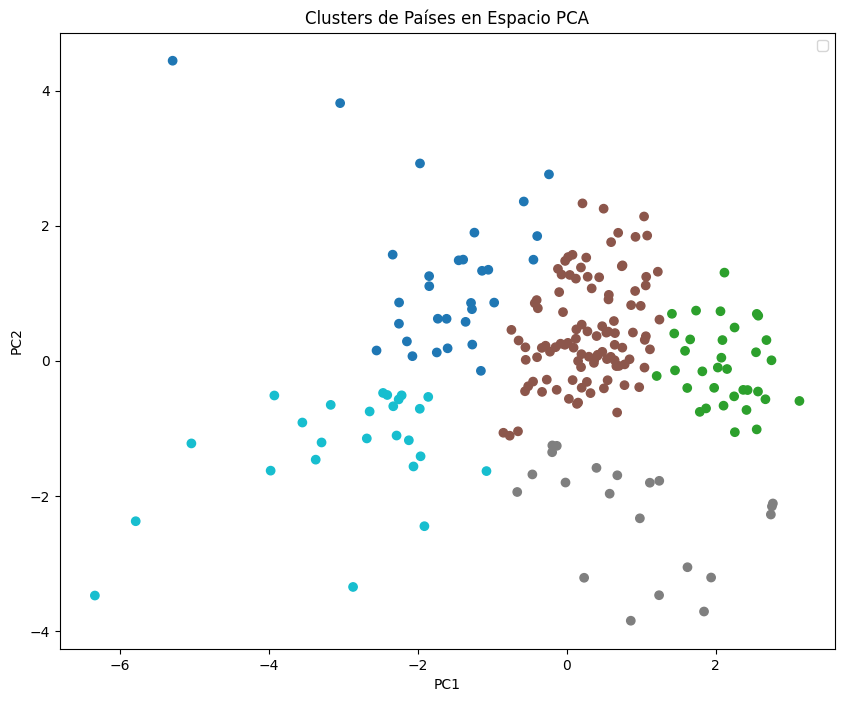

In [1298]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'],
                      c=df_pca['Cluster'],
                      cmap='tab10')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters de Países en Espacio PCA')
plt.legend()
plt.show()


In [1299]:
pca_loadings = pd.DataFrame(pca_final.components_, columns=df_scaled.columns, index=['PC1', 'PC2'])
pca_loadings.head()

Series Name  log Agricultural raw materials exports (% of merchandise exports)  \
PC1                                                   0.020031                   
PC2                                                   0.587475                   

Series Name  log Computer; communications and other services (% of commercial service exports)  \
PC1                                                   0.405198                                   
PC2                                                   0.077980                                   

Series Name  log Exports of goods and services (% of GDP)  \
PC1                                               0.11585   
PC2                                              -0.42217   

Series Name  log Food exports (% of merchandise exports)  \
PC1                                            -0.262128   
PC2                                             0.363634   

Series Name  log Fuel exports (% of merchandise exports)  \
PC1                                             0.216194   
PC2                                            -0.063154   

Series Name  log GDP growth (annual %)  \
PC1                          -0.295269   
PC2                           0.110979   

Series Name  log High-technology exports (% of manufactured exports)  \
PC1                                                   0.386006         
PC2                                                  -0.016923         

Series Name  log ICT service exports (% of service exports; BoP)  \
PC1                                                   0.446682     
PC2                                                   0.156714     

Series Name  log Insurance and financial services (% of service exports; BoP)  \
PC1                                                   0.164547                  
PC2                                                  -0.203269                  

Series Name  log Manufactures exports (% of merchandise exports)  \
PC1                                                   0.273946     
PC2                                                   0.058726     

Series Name  log Merchandise exports to high-income economies (% of total merchandise exports)  \
PC1                                                   0.178228                                   
PC2                                                  -0.246788                                   

Series Name  log Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)  \
PC1                                                   0.310439                                                                       
PC2                                                   0.326899                                                                       

Series Name  log Ores and metals exports (% of merchandise exports)  \
PC1                                                  -0.012380        
PC2                                                   0.180292        

Series Name  log Transport services (% of commercial service exports)  
PC1                                                   0.201045         
PC2                                                   0.228353

---


PC1 mide exportaciones tecnológicas principalmente
PC2 mide exportaciones agrícolas/comida principalmente
- Grupo 0 (Verde): Alta exportaciones de tecnología, Media exportacion agricola
- Grupo 1 (Café): Media exportaciones de tecnología, Media exportacion agricola
- Grupo 2 (Azul Oscuro): Bajas exportaciones de Tecnologia, Alta exportacion agricola
- Grupo 3 (Celestre): Bajas exportaciones de Tecnologia, Baja exportacion agricola
- Grupo 4 (Morado): Altas exportaciones de Tecnologia, Baja exportacion agricola



---

### Pregunta 2.11


Repita lo anterior  (descripción incluida), pero con 3 componentes principales y un _scatterplot_ en 3 dimensiones.

In [1300]:
n_components_chosen=3
optimal_k = 5
pca_final = PCA(n_components_chosen, random_state=123)
principal_components = pca_final.fit_transform(df_scaled)

df_pca = pd.DataFrame(data=principal_components,
                      columns=['PC1', 'PC2', 'PC3'],
                      index=df_scaled.index)

df_pca.head()

PC1       PC2       PC3
0  0.191481  1.380638  0.718099
1 -0.554752  0.199262  0.264867
2  0.532326  0.416538  0.301151
3  0.366016 -0.031081 -0.163298
4 -0.016106 -1.802145 -1.525837

In [1301]:
kmeans_pca_model = KMeans(n_clusters=optimal_k, random_state=123)
cluster_labels_pca = kmeans_pca_model.fit_predict(df_pca)

df_pca['Cluster'] = cluster_labels_pca
df_results_pca = df_scaled.loc[df_pca.index].copy()
df_results_pca['Cluster'] = cluster_labels_pca

df_results_pca.head(30)

Series Name  log Agricultural raw materials exports (% of merchandise exports)  \
0                                                     0.018532                   
1                                                    -0.450524                   
2                                                     0.018532                   
3                                                     0.018532                   
4                                                    -0.434628                   
5                                                    -3.938109                   
6                                                     0.178727                   
7                                                    -0.084658                   
8                                                    -0.542929                   
9                                                    -1.314166                   
10                                                    0.584121                   
11                                                    0.364907                   
12                                                   -0.465126                   
13                                                    0.124665                   
14                                                   -1.268226                   
15                                                    0.018532                   
16                                                   -1.938670                   
17                                                    0.018532                   
18                                                    0.268180                   
19                                                    0.142498                   
20                                                    3.015177                   
21                                                   -4.059043                   
22                                                    0.018532                   
23                                                    0.015132                   
24                                                    1.169028                   
25                                                   -2.087056                   
26                                                    1.175278                   
27                                                    0.018532                   
28                                                   -3.076392                   
29                                                   -0.046600                   

Series Name  log Computer; communications and other services (% of commercial service exports)  \
0                                                     0.238645                                   
1                                                    -0.068356                                   
2                                                     0.906894                                   
3                                                     0.238645                                   
4                                                    -0.774094                                   
5                                                     0.912036                                   
6                                                    -1.638541                                   
7                                                     0.757784                                   
8                                                    -0.015339                                   
9                                                    -1.361928                                   
10                                                    0.041883                                   
11                                                    0.607841                                   
12                                                    0.117596                                   
13                                                   -1.873707                       

Text(0.5, 0.92, 'Clusters de Países en 3D')

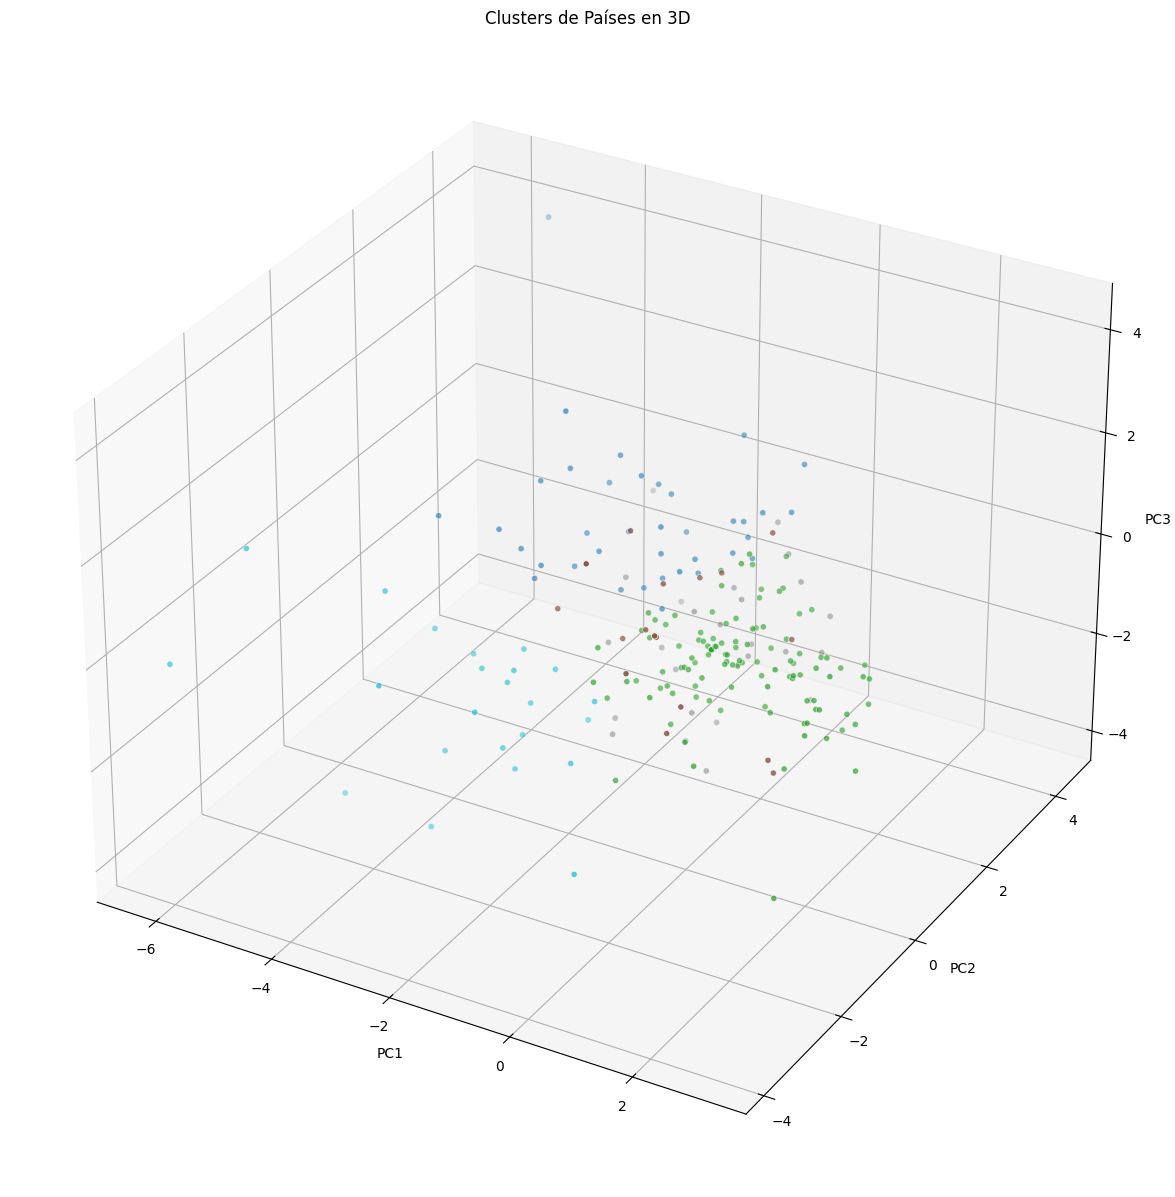

In [1302]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_pca['PC1'],
                     df_pca['PC2'],
                     df_pca['PC3'],
                     c=df_pca['Cluster'],
                     cmap='tab10',
                     edgecolors='w', linewidth=0.5)

ax.set_xlabel('PC1', fontsize=10)
ax.set_ylabel('PC2', fontsize=10)
ax.set_zlabel('PC3', fontsize=10)
ax.set_title('Clusters de Países en 3D')

In [1303]:
pca_loadings = pd.DataFrame(pca_final.components_, columns=df_scaled.columns, index=['PC1', 'PC2', 'PC3'])
pca_loadings.head()

Series Name  log Agricultural raw materials exports (% of merchandise exports)  \
PC1                                                   0.020031                   
PC2                                                   0.587475                   
PC3                                                  -0.215203                   

Series Name  log Computer; communications and other services (% of commercial service exports)  \
PC1                                                   0.405198                                   
PC2                                                   0.077980                                   
PC3                                                  -0.334576                                   

Series Name  log Exports of goods and services (% of GDP)  \
PC1                                              0.115850   
PC2                                             -0.422170   
PC3                                             -0.070979   

Series Name  log Food exports (% of merchandise exports)  \
PC1                                            -0.262128   
PC2                                             0.363634   
PC3                                            -0.315531   

Series Name  log Fuel exports (% of merchandise exports)  \
PC1                                             0.216194   
PC2                                            -0.063154   
PC3                                             0.425145   

Series Name  log GDP growth (annual %)  \
PC1                          -0.295269   
PC2                           0.110979   
PC3                           0.105531   

Series Name  log High-technology exports (% of manufactured exports)  \
PC1                                                   0.386006         
PC2                                                  -0.016923         
PC3                                                   0.000545         

Series Name  log ICT service exports (% of service exports; BoP)  \
PC1                                                   0.446682     
PC2                                                   0.156714     
PC3                                                  -0.081425     

Series Name  log Insurance and financial services (% of service exports; BoP)  \
PC1                                                   0.164547                  
PC2                                                  -0.203269                  
PC3                                                   0.113359                  

Series Name  log Manufactures exports (% of merchandise exports)  \
PC1                                                   0.273946     
PC2                                                   0.058726     
PC3                                                  -0.271615     

Series Name  log Merchandise exports to high-income economies (% of total merchandise exports)  \
PC1                                                   0.178228                                   
PC2                                                  -0.246788                                   
PC3                                                  -0.269775                                   

Series Name  log Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)  \
PC1                                                   0.310439                                                                       
PC2                                                   0.326899                                                                       
PC3                                                   0.217375                                                                       

Series Name  log Ores and metals exports (% of merchandise exports)  \
PC1                                                  -0.012380        
PC2                                                   0.180292        
PC3                                                   0.406056        

Series 

---


PC1 mide exportaciones tecnológicas principalmente
PC2 mide exportaciones agrícolas/comida principalmente
PC3 mide exportaciones combustibles y minerales
- Grupo 0 (Verde): Alta exportaciones de tecnología, Alta exportacion agricola, Media exportacion combustibles
- Grupo 1 (Café): Media exportaciones de tecnología, Alta exportacion agricola, Alta exportacion combustibles
- Grupo 2 (Azul Oscuro): Bajas exportaciones de Tecnologia, Alta exportacion agricola, Alta exportacion combustibles
- Grupo 3 (Celestre): Bajas exportaciones de Tecnologia, Media exportacion agricola, Media exportacion combustibles
- Grupo 4 (Gris): Media exportaciones de Tecnologia, Alta exportacion agricola, Alta exportacion combustibles


---

### Pregunta 2.12

Otro de los usos de los más comúnes de _PCA_, además de _feature engineering_, es la visualización. En esta sección utilizaremos _PCA_ para confirmar visualmente que estamos clusterizando países similares.

Usando el diccionario en la celda de abajo agrega una columna de continente al _dataframe_ de trabajo.

In [1304]:
country_continent_mapping = {
    'Albania': 'Europe',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Aruba': 'North America', # Usually classified with the Caribbean
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahrain': 'Asia',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Cabo Verde': 'Africa',
    'Canada': 'North America',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Congo Dem. Rep.': 'Africa',
    'Costa Rica': 'North America',
    'Croatia': 'Europe',
    'Cyprus': 'Asia',
    'Czechia': 'Europe',
    'Denmark': 'Europe',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa', # Transcontinental, but usually Africa
    'El Salvador': 'North America',
    'Estonia': 'Europe',
    'Ethiopia': 'Africa',
    'Finland': 'Europe',
    'France': 'Europe',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Guatemala': 'North America',
    'Honduras': 'North America',
    'Hong Kong': 'Asia',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia', # Transcontinental, mostly Asia
    'Kenya': 'Africa',
    'Korea Rep.': 'Asia',
    'Latvia': 'Europe',
    'Lesotho': 'Africa',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Macao': 'Asia',
    'Malaysia': 'Asia',
    'Malta': 'Europe',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Moldova': 'Europe',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Namibia': 'Africa',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'North Macedonia': 'Europe',
    'Norway': 'Europe',
    'Pakistan': 'Asia',
    'Panama': 'North America',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Romania': 'Europe',
    'Samoa': 'Oceania',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Singapore': 'Asia',
    'Slovak Republic': 'Europe',
    'Slovenia': 'Europe',
    'South Africa': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Tanzania': 'Africa',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Tunisia': 'Africa',
    'Turkiye': 'Asia', # Transcontinental, mostly Asia
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Zambia': 'Africa'
}


In [1305]:
df['Continent'] = df['Country Name'].map(country_continent_mapping)


### Pregunta 2.13

Realice un PCA de 2 componentes principales, grafique un _scatterplot_ del resultado y coloree cada punto según su continente. ¿Que se obserba?


In [1306]:
df = df.dropna()
df.head()

Series Name Country Name  \
1                Albania   
7              Argentina   
8                Armenia   
9                  Aruba   
10             Australia   

Series Name  log Agricultural raw materials exports (% of merchandise exports)  \
1                                                    -0.901323                   
7                                                    -0.377266                   
8                                                    -1.033683                   
9                                                    -2.138383                   
10                                                    0.580677                   

Series Name  log Computer; communications and other services (% of commercial service exports)  \
1                                                     3.195816                                   
7                                                     3.945059                                   
8                                                     3.243898                                   
9                                                     2.022649                                   
10                                                    3.295794                                   

Series Name  log Exports of goods and services (% of GDP)  \
1                                                3.654937   
7                                                2.545472   
8                                                4.085171   
9                                                4.481236   
10                                               3.288374   

Series Name  log Food exports (% of merchandise exports)  \
1                                               2.481909   
7                                               3.965123   
8                                               2.576988   
9                                               4.209418   
10                                              2.453892   

Series Name  log Fuel exports (% of merchandise exports)  \
1                                               1.847728   
7                                               2.176301   
8                                              -0.096989   
9                                              -2.809185   
10                                              3.554875   

Series Name  log GDP growth (annual %)  \
1                             1.370324   
7                             0.000000   
8                             2.116256   
9                             1.450142   
10                            1.236050   

Series Name  log High-technology exports (% of manufactured exports)  \
1                                                    -0.382246         
7                                                     1.695541         
8                                                     3.049516         
9                                                     1.926874         
10                                                    3.229154         

Series Name  log ICT service exports (% of service exports; BoP)  \
1                                                     1.103260     
7                                                     2.721378     
8                                                     2.937741     
9                                                    -0.413196     
10                                                    1.176080     

Series Name  log Insurance and financial services (% of service exports; BoP)  \
1                                                    -0.411727                  
7                                                     0.345225                  
8                                                     1.654428                  
9                                                     0.289710                  
10                                                    1.752549                  

Series Name  log Manufactures exports (% of merchandise exports)  \
1         

In [1307]:
numeric_cols = df.select_dtypes(include=np.number).columns
X = df[numeric_cols]

In [1308]:
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled.head()

Series Name Country Name  \
1                Albania   
7              Argentina   
8                Armenia   
9                  Aruba   
10             Australia   

Series Name  log Agricultural raw materials exports (% of merchandise exports)  \
1                                                    -0.901323                   
7                                                    -0.377266                   
8                                                    -1.033683                   
9                                                    -2.138383                   
10                                                    0.580677                   

Series Name  log Computer; communications and other services (% of commercial service exports)  \
1                                                     3.195816                                   
7                                                     3.945059                                   
8                                                     3.243898                                   
9                                                     2.022649                                   
10                                                    3.295794                                   

Series Name  log Exports of goods and services (% of GDP)  \
1                                                3.654937   
7                                                2.545472   
8                                                4.085171   
9                                                4.481236   
10                                               3.288374   

Series Name  log Food exports (% of merchandise exports)  \
1                                               2.481909   
7                                               3.965123   
8                                               2.576988   
9                                               4.209418   
10                                              2.453892   

Series Name  log Fuel exports (% of merchandise exports)  \
1                                               1.847728   
7                                               2.176301   
8                                              -0.096989   
9                                              -2.809185   
10                                              3.554875   

Series Name  log GDP growth (annual %)  \
1                             1.370324   
7                             0.000000   
8                             2.116256   
9                             1.450142   
10                            1.236050   

Series Name  log High-technology exports (% of manufactured exports)  \
1                                                    -0.382246         
7                                                     1.695541         
8                                                     3.049516         
9                                                     1.926874         
10                                                    3.229154         

Series Name  log ICT service exports (% of service exports; BoP)  \
1                                                     1.103260     
7                                                     2.721378     
8                                                     2.937741     
9                                                    -0.413196     
10                                                    1.176080     

Series Name  log Insurance and financial services (% of service exports; BoP)  \
1                                                    -0.411727                  
7                                                     0.345225                  
8                                                     1.654428                  
9                                                     0.289710                  
10                                                    1.752549                  

Series Name  log Manufactures exports (% of merchandise exports)  \
1         

In [1309]:
df_scaled[numeric_cols] = scaler.fit_transform(X)
df_scaled = df_scaled.select_dtypes(include=np.number)

df_scaled.head()

Series Name  log Agricultural raw materials exports (% of merchandise exports)  \
1                                                    -0.638648                   
7                                                    -0.235331                   
8                                                    -0.740513                   
9                                                    -1.590697                   
10                                                    0.501908                   

Series Name  log Computer; communications and other services (% of commercial service exports)  \
1                                                    -0.159268                                   
7                                                     0.664787                                   
8                                                    -0.106385                                   
9                                                    -1.449576                                   
10                                                   -0.049308                                   

Series Name  log Exports of goods and services (% of GDP)  \
1                                               -0.024392   
7                                               -1.748748   
8                                                0.644288   
9                                                1.259862   
10                                              -0.594113   

Series Name  log Food exports (% of merchandise exports)  \
1                                              -0.128797   
7                                               1.229416   
8                                              -0.041731   
9                                               1.453123   
10                                             -0.154453   

Series Name  log Fuel exports (% of merchandise exports)  \
1                                               0.336634   
7                                               0.488175   
8                                              -0.560285   
9                                              -1.811170   
10                                              1.123984   

Series Name  log GDP growth (annual %)  \
1                             0.563526   
7                            -0.725547   
8                             1.265229   
9                             0.638611   
10                            0.437214   

Series Name  log High-technology exports (% of manufactured exports)  \
1                                                    -1.648256         
7                                                    -0.128590         
8                                                     0.861689         
9                                                     0.040604         
10                                                    0.993074         

Series Name  log ICT service exports (% of service exports; BoP)  \
1                                                    -0.597083     
7                                                     0.723196     
8                                                     0.899734     
9                                                    -1.834412     
10                                                   -0.537667     

Series Name  log Insurance and financial services (% of service exports; BoP)  \
1                                                    -0.993404                  
7                                                    -0.463511                  
8                                                     0.452976                  
9                                                    -0.502374                  
10                                                    0.521664                  

Series Name  log Manufactures exports (% of merchandise exports)  \
1                                                     0.529983     
7                                                    -0.635243     
8                                          

In [1310]:
n_components_chosen=2
optimal_k = 5
pca_final = PCA(n_components_chosen, random_state=123)
principal_components = pca_final.fit_transform(df_scaled)

df_pca = pd.DataFrame(data=principal_components,
                      columns=['PC1', 'PC2'],
                      index=df_scaled.index)

df_pca.head()

PC1       PC2
1  -0.646504 -0.319389
7  -0.290872  1.071287
8   0.813032 -0.334384
9  -2.424783 -2.033121
10 -0.662772  0.733152

In [1311]:
kmeans_pca_model = KMeans(n_clusters=optimal_k, random_state=123)
cluster_labels_pca = kmeans_pca_model.fit_predict(df_pca)

df_pca['Cluster'] = cluster_labels_pca
df_results_pca = df.loc[df_pca.index].copy()


In [1312]:
df_results_pca['Cluster'] = cluster_labels_pca
df_results_pca['PC1'] = principal_components[:, 0]
df_results_pca['PC2'] = principal_components[:, 1]

df_results_pca.head(30)

Series Name            Country Name  \
1                           Albania   
7                         Argentina   
8                           Armenia   
9                             Aruba   
10                        Australia   
11                          Austria   
12                       Azerbaijan   
14                          Bahrain   
18                          Belgium   
19                           Belize   
23                          Bolivia   
24           Bosnia and Herzegovina   
25                         Botswana   
26                           Brazil   
28                Brunei Darussalam   
29                         Bulgaria   
30                     Burkina Faso   
32                       Cabo Verde   
35                           Canada   
40                            Chile   
41                            China   
42                         Colombia   
44                  Congo Dem. Rep.   
46                       Costa Rica   
48                          Croatia   
51                           Cyprus   
52                          Czechia   
53                          Denmark   
56               Dominican Republic   
57                          Ecuador   

Series Name  log Agricultural raw materials exports (% of merchandise exports)  \
1                                                    -0.901323                   
7                                                    -0.377266                   
8                                                    -1.033683                   
9                                                    -2.138383                   
10                                                    0.580677                   
11                                                    0.266680                   
12                                                   -0.922239                   
14                                                   -2.072579                   
18                                                    0.128130                   
19                                                   -0.051893                   
23                                                   -0.234329                   
24                                                    1.418483                   
25                                                   -3.245451                   
26                                                    1.427436                   
28                                                   -4.662552                   
29                                                   -0.322752                   
30                                                    1.744769                   
32                                                    0.000000                   
35                                                    1.052313                   
40                                                    1.576127                   
41                                                   -1.017447                   
42                                                    1.507268                   
44                                                   -1.369645                   
46                                                    0.212658                   
48                                                    1.287903                   
51                                                   -0.590433                   
52                                                   -0.028432                   
53                                                    0.487722                   
56                                                   -0.742883                   
57                                                    1.369194                   

Series Name  log Computer; communications and other services (% of commercial service exports)  \
1                                                     3.195816                                   
7                                                  

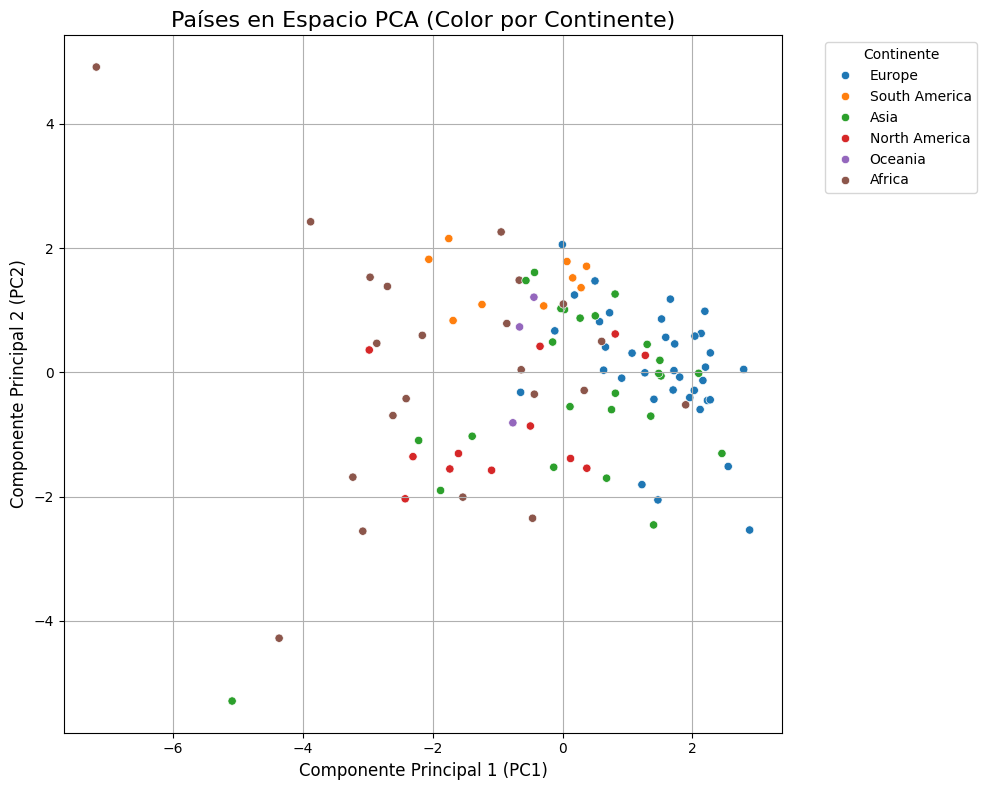

In [1313]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x='PC1', y='PC2',
                hue='Continent',
                data=df_results_pca,
                palette='tab10')

plt.xlabel('Componente Principal 1 (PC1)', fontsize=12)
plt.ylabel('Componente Principal 2 (PC2)', fontsize=12)
plt.title('Países en Espacio PCA (Color por Continente)', fontsize=16)
plt.grid(True) # Añadir cuadrícula

# Ajustar la leyenda para que no se superponga con el gráfico
plt.legend(title='Continente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() # Asegura que todos los elementos se ajusten bien dentro de la figura
plt.show()

---


Los continentes parecen ser del mismo Cluster, con excepcion de Africa y Norte America


---

### Pregunta 2.14

Genera el mismo gráfico anterior, pero ahora coloree los puntos del scatterplot usando los clusters de un KMeans de 3 clústers y `random_state=42`. Describa los clusters según el gráfico.



In [1314]:
optimal_k = 3
pca_final = PCA(n_components_chosen, random_state=42)
principal_components = pca_final.fit_transform(df_scaled)

df_pca = pd.DataFrame(data=principal_components,
                      columns=['PC1', 'PC2'],
                      index=df_scaled.index)

df_pca.head()

PC1       PC2
1  -0.646504 -0.319389
7  -0.290872  1.071287
8   0.813032 -0.334384
9  -2.424783 -2.033121
10 -0.662772  0.733152

In [1315]:
kmeans_pca_model = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels_pca = kmeans_pca_model.fit_predict(df_pca)

df_pca['Cluster'] = cluster_labels_pca
df_results_pca = df.loc[df_pca.index].copy()

In [1316]:
df_results_pca['Cluster'] = cluster_labels_pca
df_results_pca['PC1'] = principal_components[:, 0]
df_results_pca['PC2'] = principal_components[:, 1]

df_results_pca.head(30)

Series Name            Country Name  \
1                           Albania   
7                         Argentina   
8                           Armenia   
9                             Aruba   
10                        Australia   
11                          Austria   
12                       Azerbaijan   
14                          Bahrain   
18                          Belgium   
19                           Belize   
23                          Bolivia   
24           Bosnia and Herzegovina   
25                         Botswana   
26                           Brazil   
28                Brunei Darussalam   
29                         Bulgaria   
30                     Burkina Faso   
32                       Cabo Verde   
35                           Canada   
40                            Chile   
41                            China   
42                         Colombia   
44                  Congo Dem. Rep.   
46                       Costa Rica   
48                          Croatia   
51                           Cyprus   
52                          Czechia   
53                          Denmark   
56               Dominican Republic   
57                          Ecuador   

Series Name  log Agricultural raw materials exports (% of merchandise exports)  \
1                                                    -0.901323                   
7                                                    -0.377266                   
8                                                    -1.033683                   
9                                                    -2.138383                   
10                                                    0.580677                   
11                                                    0.266680                   
12                                                   -0.922239                   
14                                                   -2.072579                   
18                                                    0.128130                   
19                                                   -0.051893                   
23                                                   -0.234329                   
24                                                    1.418483                   
25                                                   -3.245451                   
26                                                    1.427436                   
28                                                   -4.662552                   
29                                                   -0.322752                   
30                                                    1.744769                   
32                                                    0.000000                   
35                                                    1.052313                   
40                                                    1.576127                   
41                                                   -1.017447                   
42                                                    1.507268                   
44                                                   -1.369645                   
46                                                    0.212658                   
48                                                    1.287903                   
51                                                   -0.590433                   
52                                                   -0.028432                   
53                                                    0.487722                   
56                                                   -0.742883                   
57                                                    1.369194                   

Series Name  log Computer; communications and other services (% of commercial service exports)  \
1                                                     3.195816                                   
7                                                  

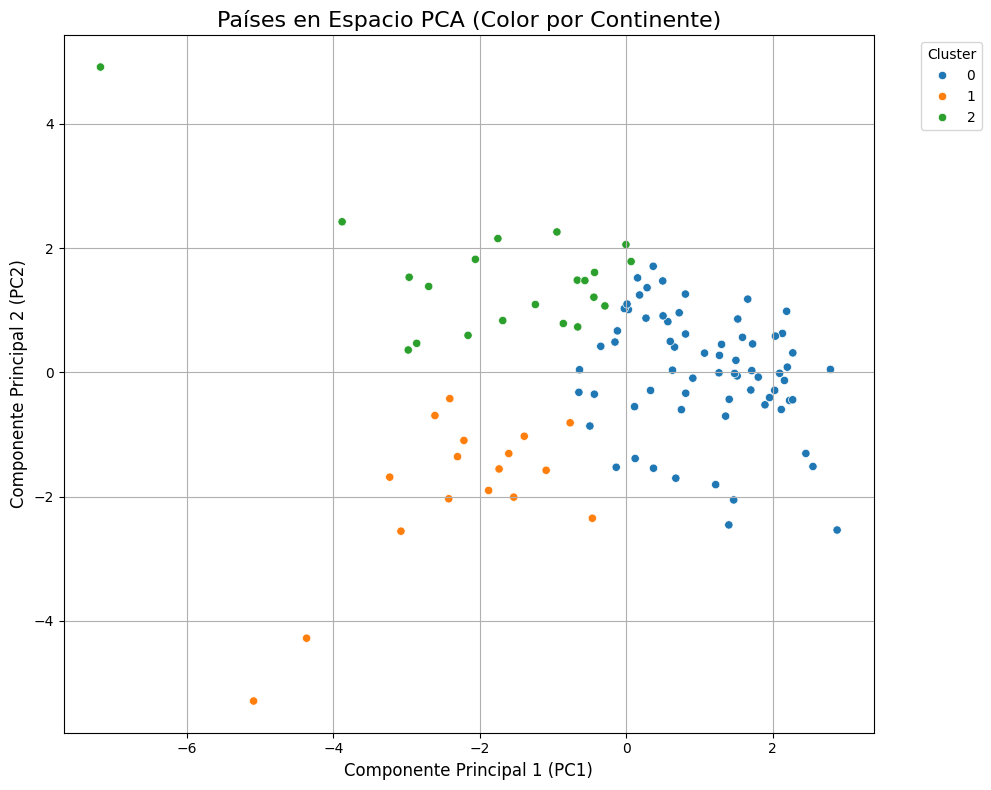

In [1317]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x='PC1', y='PC2',
                hue='Cluster',
                data=df_results_pca,
                palette='tab10')

plt.xlabel('Componente Principal 1 (PC1)', fontsize=12)
plt.ylabel('Componente Principal 2 (PC2)', fontsize=12)
plt.title('Países en Espacio PCA (Color por Continente)', fontsize=16)
plt.grid(True) # Añadir cuadrícula

# Ajustar la leyenda para que no se superponga con el gráfico
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() # Asegura que todos los elementos se ajusten bien dentro de la figura
plt.show()

In [1318]:
pca_loadings = pd.DataFrame(pca_final.components_, columns=df_scaled.columns, index=['PC1', 'PC2'])
pca_loadings.head()

Series Name  log Agricultural raw materials exports (% of merchandise exports)  \
PC1                                                  -0.014037                   
PC2                                                   0.373520                   

Series Name  log Computer; communications and other services (% of commercial service exports)  \
PC1                                                   0.405226                                   
PC2                                                  -0.020277                                   

Series Name  log Exports of goods and services (% of GDP)  \
PC1                                              0.216965   
PC2                                             -0.369018   

Series Name  log Food exports (% of merchandise exports)  \
PC1                                            -0.224158   
PC2                                             0.209690   

Series Name  log Fuel exports (% of merchandise exports)  \
PC1                                             0.188842   
PC2                                             0.292375   

Series Name  log GDP growth (annual %)  \
PC1                          -0.292937   
PC2                          -0.068407   

Series Name  log High-technology exports (% of manufactured exports)  \
PC1                                                   0.361462         
PC2                                                   0.134656         

Series Name  log ICT service exports (% of service exports; BoP)  \
PC1                                                   0.391527     
PC2                                                   0.200035     

Series Name  log Insurance and financial services (% of service exports; BoP)  \
PC1                                                   0.247273                  
PC2                                                  -0.096433                  

Series Name  log Manufactures exports (% of merchandise exports)  \
PC1                                                   0.328122     
PC2                                                  -0.256163     

Series Name  log Merchandise exports to high-income economies (% of total merchandise exports)  \
PC1                                                   0.294513                                   
PC2                                                  -0.277408                                   

Series Name  log Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)  \
PC1                                                   0.265640                                                                       
PC2                                                   0.426545                                                                       

Series Name  log Ores and metals exports (% of merchandise exports)  \
PC1                                                  -0.049166        
PC2                                                   0.220360        

Series Name  log Transport services (% of commercial service exports)  
PC1                                                   0.065769         
PC2                                                   0.386322

---


Efectivamente pareciera que se formaron los clusters a partir de los continentes. PC1 se compone de exportaciones tecnológicas y PC2 de exportaciones agricolas
- Grupo 0 (Azul Oscuro): Alta exportaciones de tecnología, Media exportacion agricola (países europeos)
- Grupo 1 (Naranja): Bajas exportaciones de tecnología, Baja exportacion agricola (Africa, America)
- Grupo 2 (Verde): Bajas exportaciones de Tecnologia, Alta exportacion agricola (America del Sur, Oceania)


---

### Pregunta 2.15

¿Cual es la proporcion de cada cluster por continente?


In [1334]:
proporciones = df_results_pca.groupby('Continent')['Cluster'].value_counts(normalize=True).unstack().fillna(0)
proporciones


Cluster               0         1         2
Continent                                  
Africa         0.272727  0.318182  0.409091
Asia           0.760000  0.160000  0.080000
Europe         0.972222  0.000000  0.027778
North America  0.500000  0.416667  0.083333
Oceania        0.000000  0.333333  0.666667
South America  0.333333  0.000000  0.666667

### Pregunta 2.16

¿Cuál es la característica numérica más alta en magnitud por cluster (usando sus centroides)? ¿Cuál es su signo? ¿Como nos ayuda a interpretar los clusters? ¿Que podemos concluir de cada uno de estos clusters en contexto de la guerra comercial?


In [1320]:
df_results_pca.head()

Series Name Country Name  \
1                Albania   
7              Argentina   
8                Armenia   
9                  Aruba   
10             Australia   

Series Name  log Agricultural raw materials exports (% of merchandise exports)  \
1                                                    -0.901323                   
7                                                    -0.377266                   
8                                                    -1.033683                   
9                                                    -2.138383                   
10                                                    0.580677                   

Series Name  log Computer; communications and other services (% of commercial service exports)  \
1                                                     3.195816                                   
7                                                     3.945059                                   
8                                                     3.243898                                   
9                                                     2.022649                                   
10                                                    3.295794                                   

Series Name  log Exports of goods and services (% of GDP)  \
1                                                3.654937   
7                                                2.545472   
8                                                4.085171   
9                                                4.481236   
10                                               3.288374   

Series Name  log Food exports (% of merchandise exports)  \
1                                               2.481909   
7                                               3.965123   
8                                               2.576988   
9                                               4.209418   
10                                              2.453892   

Series Name  log Fuel exports (% of merchandise exports)  \
1                                               1.847728   
7                                               2.176301   
8                                              -0.096989   
9                                              -2.809185   
10                                              3.554875   

Series Name  log GDP growth (annual %)  \
1                             1.370324   
7                             0.000000   
8                             2.116256   
9                             1.450142   
10                            1.236050   

Series Name  log High-technology exports (% of manufactured exports)  \
1                                                    -0.382246         
7                                                     1.695541         
8                                                     3.049516         
9                                                     1.926874         
10                                                    3.229154         

Series Name  log ICT service exports (% of service exports; BoP)  \
1                                                     1.103260     
7                                                     2.721378     
8                                                     2.937741     
9                                                    -0.413196     
10                                                    1.176080     

Series Name  log Insurance and financial services (% of service exports; BoP)  \
1                                                    -0.411727                  
7                                                     0.345225                  
8                                                     1.654428                  
9                                                     0.289710                  
10                                                    1.752549                  

Series Name  log Manufactures exports (% of merchandise exports)  \
1         

In [1328]:
numeric_cols = df_results_pca.select_dtypes(include=np.number).columns
global_means_all_features = df_results_pca[numeric_cols].mean()
print(global_means_all_features)

Series Name
log Agricultural raw materials exports (% of merchandise exports)                                                       -0.071485
log Computer; communications and other services (% of commercial service exports)                                        3.340625
log Exports of goods and services (% of GDP)                                                                             3.670631
log Food exports (% of merchandise exports)                                                                              2.622560
log Fuel exports (% of merchandise exports)                                                                              1.117831
log GDP growth (annual %)                                                                                                0.771279
log High-technology exports (% of manufactured exports)                                                                  1.871358
log ICT service exports (% of service exports; BoP)                           

In [1330]:
cluster_profiles_pca = df_results_pca.groupby('Cluster')[numeric_cols].mean()
cluster_profiles_pca


Series Name  log Agricultural raw materials exports (% of merchandise exports)  \
Cluster                                                                          
0                                                    -0.074905                   
1                                                    -0.904896                   
2                                                     0.614418                   

Series Name  log Computer; communications and other services (% of commercial service exports)  \
Cluster                                                                                          
0                                                     3.749716                                   
1                                                     2.528111                                   
2                                                     2.654219                                   

Series Name  log Exports of goods and services (% of GDP)  \
Cluster                                                     
0                                                3.818986   
1                                                3.730544   
2                                                3.134677   

Series Name  log Food exports (% of merchandise exports)  \
Cluster                                                    
0                                               2.323061   
1                                               2.876357   
2                                               3.401172   

Series Name  log Fuel exports (% of merchandise exports)  \
Cluster                                                    
0                                               1.500817   
1                                              -1.043567   
2                                               1.609152   

Series Name  log GDP growth (annual %)  \
Cluster                                  
0                             0.452055   
1                             1.364607   
2                             1.339844   

Series Name  log High-technology exports (% of manufactured exports)  \
Cluster                                                                
0                                                     2.436432         
1                                                     0.069806         
2                                                     1.473084         

Series Name  log ICT service exports (% of service exports; BoP)  \
Cluster                                                            
0                                                     2.335616     
1                                                     0.502328     
2                                                     1.269144     

Series Name  log Insurance and financial services (% of service exports; BoP)  \
Cluster                                                                         
0                                                     1.365891                  
1                                                     0.360378                  
2                                                     0.353032                  

Series Name  log Manufactures exports (% of merchandise exports)  \
Cluster                                                            
0                                                     3.898184     
1                                                     3.322345     
2                                                     2.531468     

Series Name  log Merchandise exports to high-income economies (% of total merchandise exports)  \
Cluster                                                                                          
0                                                     4.278403                                   
1                                                     4.063347                                   
2                                                     3.503331                                   

Series Name  log Merchandise exports to

In [1331]:
pca_loadings = pd.DataFrame(pca_final.components_, columns=df_scaled.columns, index=['PC1', 'PC2'])
pca_loadings.head()

Series Name  log Agricultural raw materials exports (% of merchandise exports)  \
PC1                                                  -0.014037                   
PC2                                                   0.373520                   

Series Name  log Computer; communications and other services (% of commercial service exports)  \
PC1                                                   0.405226                                   
PC2                                                  -0.020277                                   

Series Name  log Exports of goods and services (% of GDP)  \
PC1                                              0.216965   
PC2                                             -0.369018   

Series Name  log Food exports (% of merchandise exports)  \
PC1                                            -0.224158   
PC2                                             0.209690   

Series Name  log Fuel exports (% of merchandise exports)  \
PC1                                             0.188842   
PC2                                             0.292375   

Series Name  log GDP growth (annual %)  \
PC1                          -0.292937   
PC2                          -0.068407   

Series Name  log High-technology exports (% of manufactured exports)  \
PC1                                                   0.361462         
PC2                                                   0.134656         

Series Name  log ICT service exports (% of service exports; BoP)  \
PC1                                                   0.391527     
PC2                                                   0.200035     

Series Name  log Insurance and financial services (% of service exports; BoP)  \
PC1                                                   0.247273                  
PC2                                                  -0.096433                  

Series Name  log Manufactures exports (% of merchandise exports)  \
PC1                                                   0.328122     
PC2                                                  -0.256163     

Series Name  log Merchandise exports to high-income economies (% of total merchandise exports)  \
PC1                                                   0.294513                                   
PC2                                                  -0.277408                                   

Series Name  log Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)  \
PC1                                                   0.265640                                                                       
PC2                                                   0.426545                                                                       

Series Name  log Ores and metals exports (% of merchandise exports)  \
PC1                                                  -0.049166        
PC2                                                   0.220360        

Series Name  log Transport services (% of commercial service exports)  
PC1                                                   0.065769         
PC2                                                   0.386322


--- Cluster 0 ---


NameError: name 'all_numeric_features' is not defined

---


*Escriba* su respuesta en esta celda...


---